In [66]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame
import seaborn as sns
from datetime import datetime
from datetime import date
import glob
import os
import matplotlib.pyplot as plt
import warnings
# import stats
import scipy.stats
from scipy.optimize import curve_fit
import matplotlib.dates as mdates

In [2]:
# Read in the metric snotel data that has been cleaned
snotel_df = pd.read_csv('/Users/f67f911/Desktop/Bridger_snotels/Data/Site_Data/Cleaned_Data/snotel_metric_df.csv',header=0, index_col=0)
# View the head of the snotel_df data
snotel_df.head()

datetime   station  Year  Month  Daily Precipitation (cm)   
0  1994-09-29  Brackett  1994      9                       NaN  \
1  1994-09-30  Brackett  1994      9                       NaN   
2  1994-10-01  Brackett  1994     10                     1.270   
3  1994-10-02  Brackett  1994     10                     0.000   
4  1994-10-03  Brackett  1994     10                     0.254   

   Daily Snow Depth (cm)  Daily Water Equivalent (cm)  Daily Average Temp (C)   
0                    NaN                          NaN                     8.5  \
1                    NaN                          NaN                     7.8   
2                    NaN                          NaN                     9.0   
3                    NaN                          NaN                    -2.3   
4                    NaN                          NaN                    -6.0   

   Density (%)  Density (kg/m3)  
0          NaN              NaN  
1          NaN              NaN  
2          NaN              NaN  
3          NaN              NaN  
4          NaN              NaN

In [3]:
# Read in the pre-filtered field season data from the SNOTEL sites
field_season_df = pd.read_csv('/Users/f67f911/Desktop/Bridger_snotels/Data/Site_Data/Cleaned_Data/field_season_df.csv',header=0, index_col=0)
# View the head of the df
field_season_df.head()

datetime  Daily Precipitation (in)  Daily Snow Depth (in)   
9865  2021-10-02                       0.0                    NaN  \
8038  2021-10-02                       0.0                    NaN   
8039  2021-10-03                       0.0                    NaN   
9866  2021-10-03                       0.0                    NaN   
8040  2021-10-04                       0.0                    NaN   

      Daily Average Temperature (F)  Daily Maximum Temperature (F)   
9865                          51.08                          60.98  \
8038                          49.46                          62.42   
8039                          55.76                          66.20   
9866                          55.58                          64.40   
8040                          56.66                          71.60   

      Daily Minimum Temperature (F)  Daily Water Equivalent (in)    station   
9865                          40.10                          NaN   Brackett  \
8038                          35.78                          NaN  Sacajawea   
8039                          44.06                          NaN  Sacajawea   
9866                          47.66                          NaN   Brackett   
8040                          41.36                          NaN  Sacajawea   

      Year  Month  Density (%)  Density (kg/m3)  Daily Precipitation (cm)   
9865  2021     10          NaN              NaN                       0.0  \
8038  2021     10          NaN              NaN                       0.0   
8039  2021     10          NaN              NaN                       0.0   
9866  2021     10          NaN              NaN                       0.0   
8040  2021     10          NaN              NaN                       0.0   

      Daily Snow Depth (cm)  Daily Water Equivalent (cm)   
9865                    NaN                          NaN  \
8038                    NaN                          NaN   
8039                    NaN                          NaN   
9866                    NaN                          NaN   
8040                    NaN                          NaN   

      Daily Average Temp (C)  
9865                    10.6  
8038                     9.7  
8039                    13.2  
9866                    13.1  
8040                    13.7

In [4]:
maximum = field_season_df.loc[field_season_df['Daily Water Equivalent (cm)'].idxmax()]
maximum

datetime                         2022-05-04
Daily Precipitation (in)                0.0
Daily Snow Depth (in)                  46.0
Daily Average Temperature (F)          44.6
Daily Maximum Temperature (F)         57.92
Daily Minimum Temperature (F)          32.9
Daily Water Equivalent (in)            17.7
station                            Brackett
Year                                   2022
Month                                     5
Density (%)                       38.478261
Density (kg/m3)                  384.782609
Daily Precipitation (cm)                0.0
Daily Snow Depth (cm)                116.84
Daily Water Equivalent (cm)          44.958
Daily Average Temp (C)                  7.0
Name: 10079, dtype: object

In [6]:
sac = field_season_df.loc[field_season_df['station'] == 'Sacajawea']
sac.head()

datetime  Daily Precipitation (in)  Daily Snow Depth (in)   
8038  2021-10-02                       0.0                    NaN  \
8039  2021-10-03                       0.0                    NaN   
8040  2021-10-04                       0.0                    NaN   
8041  2021-10-05                       0.0                    NaN   
8042  2021-10-06                       0.1                    NaN   

      Daily Average Temperature (F)  Daily Maximum Temperature (F)   
8038                          49.46                          62.42  \
8039                          55.76                          66.20   
8040                          56.66                          71.60   
8041                          58.64                          71.96   
8042                          54.14                          63.50   

      Daily Minimum Temperature (F)  Daily Water Equivalent (in)    station   
8038                          35.78                          NaN  Sacajawea  \
8039                          44.06                          NaN  Sacajawea   
8040                          41.36                          NaN  Sacajawea   
8041                          48.56                          NaN  Sacajawea   
8042                          42.26                          NaN  Sacajawea   

      Year  Month  Density (%)  Density (kg/m3)  Daily Precipitation (cm)   
8038  2021     10          NaN              NaN                     0.000  \
8039  2021     10          NaN              NaN                     0.000   
8040  2021     10          NaN              NaN                     0.000   
8041  2021     10          NaN              NaN                     0.000   
8042  2021     10          NaN              NaN                     0.254   

      Daily Snow Depth (cm)  Daily Water Equivalent (cm)   
8038                    NaN                          NaN  \
8039                    NaN                          NaN   
8040                    NaN                          NaN   
8041                    NaN                          NaN   
8042                    NaN                          NaN   

      Daily Average Temp (C)  
8038                     9.7  
8039                    13.2  
8040                    13.7  
8041                    14.8  
8042                    12.3

In [7]:
sac_noSnow = sac.loc[(sac['datetime'] > '2022-05-01')]
sac_noSnow.head()

datetime  Daily Precipitation (in)  Daily Snow Depth (in)   
8250  2022-05-02                       0.0                   14.0  \
8251  2022-05-03                       0.9                   12.0   
8252  2022-05-04                       0.0                   11.0   
8253  2022-05-05                       0.0                    9.0   
8254  2022-05-06                       0.0                    5.0   

      Daily Average Temperature (F)  Daily Maximum Temperature (F)   
8250                          41.00                          53.24  \
8251                          37.40                          41.36   
8252                          42.62                          54.32   
8253                          51.98                          65.84   
8254                          48.74                          57.56   

      Daily Minimum Temperature (F)  Daily Water Equivalent (in)    station   
8250                          32.36                          6.1  Sacajawea  \
8251                          32.72                          5.4  Sacajawea   
8252                          30.92                          5.3  Sacajawea   
8253                          37.58                          4.3  Sacajawea   
8254                          40.64                          3.1  Sacajawea   

      Year  Month  Density (%)  Density (kg/m3)  Daily Precipitation (cm)   
8250  2022      5    43.571429       435.714286                     0.000  \
8251  2022      5    45.000000       450.000000                     2.286   
8252  2022      5    48.181818       481.818182                     0.000   
8253  2022      5    47.777778       477.777778                     0.000   
8254  2022      5          NaN              NaN                     0.000   

      Daily Snow Depth (cm)  Daily Water Equivalent (cm)   
8250                  35.56                       15.494  \
8251                  30.48                       13.716   
8252                  27.94                       13.462   
8253                  22.86                       10.922   
8254                  12.70                        7.874   

      Daily Average Temp (C)  
8250                     5.0  
8251                     3.0  
8252                     5.9  
8253                    11.1  
8254                     9.3

In [8]:
maximum_sac = sac.loc[sac['Daily Water Equivalent (cm)'].idxmax()]
maximum_sac


datetime                         2022-03-21
Daily Precipitation (in)                0.1
Daily Snow Depth (in)                  28.0
Daily Average Temperature (F)          28.4
Daily Maximum Temperature (F)         35.78
Daily Minimum Temperature (F)         20.48
Daily Water Equivalent (in)             7.7
station                           Sacajawea
Year                                   2022
Month                                     3
Density (%)                            27.5
Density (kg/m3)                       275.0
Daily Precipitation (cm)              0.254
Daily Snow Depth (cm)                 71.12
Daily Water Equivalent (cm)          19.558
Daily Average Temp (C)                 -2.0
Name: 8208, dtype: object

In [9]:
brac = field_season_df.loc[field_season_df['station'] == 'Brackett']
brac.head()

datetime  Daily Precipitation (in)  Daily Snow Depth (in)   
9865  2021-10-02                       0.0                    NaN  \
9866  2021-10-03                       0.0                    NaN   
9867  2021-10-04                       0.0                    NaN   
9868  2021-10-05                       0.0                    NaN   
9869  2021-10-06                       0.0                    NaN   

      Daily Average Temperature (F)  Daily Maximum Temperature (F)   
9865                          51.08                          60.98  \
9866                          55.58                          64.40   
9867                          57.92                          71.78   
9868                          58.46                          70.88   
9869                          52.16                          62.24   

      Daily Minimum Temperature (F)  Daily Water Equivalent (in)   station   
9865                          40.10                          NaN  Brackett  \
9866                          47.66                          NaN  Brackett   
9867                          49.64                          NaN  Brackett   
9868                          49.64                          NaN  Brackett   
9869                          43.34                          NaN  Brackett   

      Year  Month  Density (%)  Density (kg/m3)  Daily Precipitation (cm)   
9865  2021     10          NaN              NaN                       0.0  \
9866  2021     10          NaN              NaN                       0.0   
9867  2021     10          NaN              NaN                       0.0   
9868  2021     10          NaN              NaN                       0.0   
9869  2021     10          NaN              NaN                       0.0   

      Daily Snow Depth (cm)  Daily Water Equivalent (cm)   
9865                    NaN                          NaN  \
9866                    NaN                          NaN   
9867                    NaN                          NaN   
9868                    NaN                          NaN   
9869                    NaN                          NaN   

      Daily Average Temp (C)  
9865                    10.6  
9866                    13.1  
9867                    14.4  
9868                    14.7  
9869                    11.2

In [10]:
brac_noSnow = brac.loc[(brac['datetime'] > '2022-05-01')]
brac_noSnow.head()

datetime  Daily Precipitation (in)  Daily Snow Depth (in)   
10077  2022-05-02                       0.1                   46.0  \
10078  2022-05-03                       0.9                   43.0   
10079  2022-05-04                       0.0                   46.0   
10080  2022-05-05                       0.0                   44.0   
10081  2022-05-06                       0.0                   40.0   

       Daily Average Temperature (F)  Daily Maximum Temperature (F)   
10077                          39.02                          52.34  \
10078                          36.50                          39.02   
10079                          44.60                          57.92   
10080                          50.72                          67.64   
10081                          44.96                          55.40   

       Daily Minimum Temperature (F)  Daily Water Equivalent (in)   station   
10077                          30.38                         17.1  Brackett  \
10078                          34.16                         16.8  Brackett   
10079                          32.90                         17.7  Brackett   
10080                          40.64                         17.1  Brackett   
10081                          37.22                         16.1  Brackett   

       Year  Month  Density (%)  Density (kg/m3)  Daily Precipitation (cm)   
10077  2022      5    37.173913       371.739130                     0.254  \
10078  2022      5    39.069767       390.697674                     2.286   
10079  2022      5    38.478261       384.782609                     0.000   
10080  2022      5    38.863636       388.636364                     0.000   
10081  2022      5    40.250000       402.500000                     0.000   

       Daily Snow Depth (cm)  Daily Water Equivalent (cm)   
10077                 116.84                       43.434  \
10078                 109.22                       42.672   
10079                 116.84                       44.958   
10080                 111.76                       43.434   
10081                 101.60                       40.894   

       Daily Average Temp (C)  
10077                     3.9  
10078                     2.5  
10079                     7.0  
10080                    10.4  
10081                     7.2

In [11]:
# Create a dataframe highlighting the snowiest part of the field season
highlight = field_season_df.loc[(field_season_df['datetime'] > '2021-11-20') & (field_season_df['datetime'] < '2022-05-20')]
# View the head of the new dataframe
highlight.head()

datetime  Daily Precipitation (in)  Daily Snow Depth (in)   
9915  2021-11-21                       0.0                   11.0  \
8088  2021-11-21                       0.1                    1.0   
9916  2021-11-22                       0.0                   10.0   
8089  2021-11-22                       0.0                    1.0   
9917  2021-11-23                       0.2                   10.0   

      Daily Average Temperature (F)  Daily Maximum Temperature (F)   
9915                          32.18                          38.30  \
8088                          35.78                          41.36   
9916                          42.98                          50.72   
8089                          45.50                          53.06   
9917                          31.82                          42.98   

      Daily Minimum Temperature (F)  Daily Water Equivalent (in)    station   
9915                          25.16                          2.8   Brackett  \
8088                          28.76                          0.7  Sacajawea   
9916                          37.76                          2.8   Brackett   
8089                          33.08                          0.7  Sacajawea   
9917                          24.08                          2.8   Brackett   

      Year  Month  Density (%)  Density (kg/m3)  Daily Precipitation (cm)   
9915  2021     11    25.454545       254.545455                     0.000  \
8088  2021     11          NaN              NaN                     0.254   
9916  2021     11    28.000000       280.000000                     0.000   
8089  2021     11          NaN              NaN                     0.000   
9917  2021     11    28.000000       280.000000                     0.508   

      Daily Snow Depth (cm)  Daily Water Equivalent (cm)   
9915                  27.94                        7.112  \
8088                   2.54                        1.778   
9916                  25.40                        7.112   
8089                   2.54                        1.778   
9917                  25.40                        7.112   

      Daily Average Temp (C)  
9915                     0.1  
8088                     2.1  
9916                     6.1  
8089                     7.5  
9917                    -0.1

<Axes: xlabel='datetime', ylabel='Density (%)'>

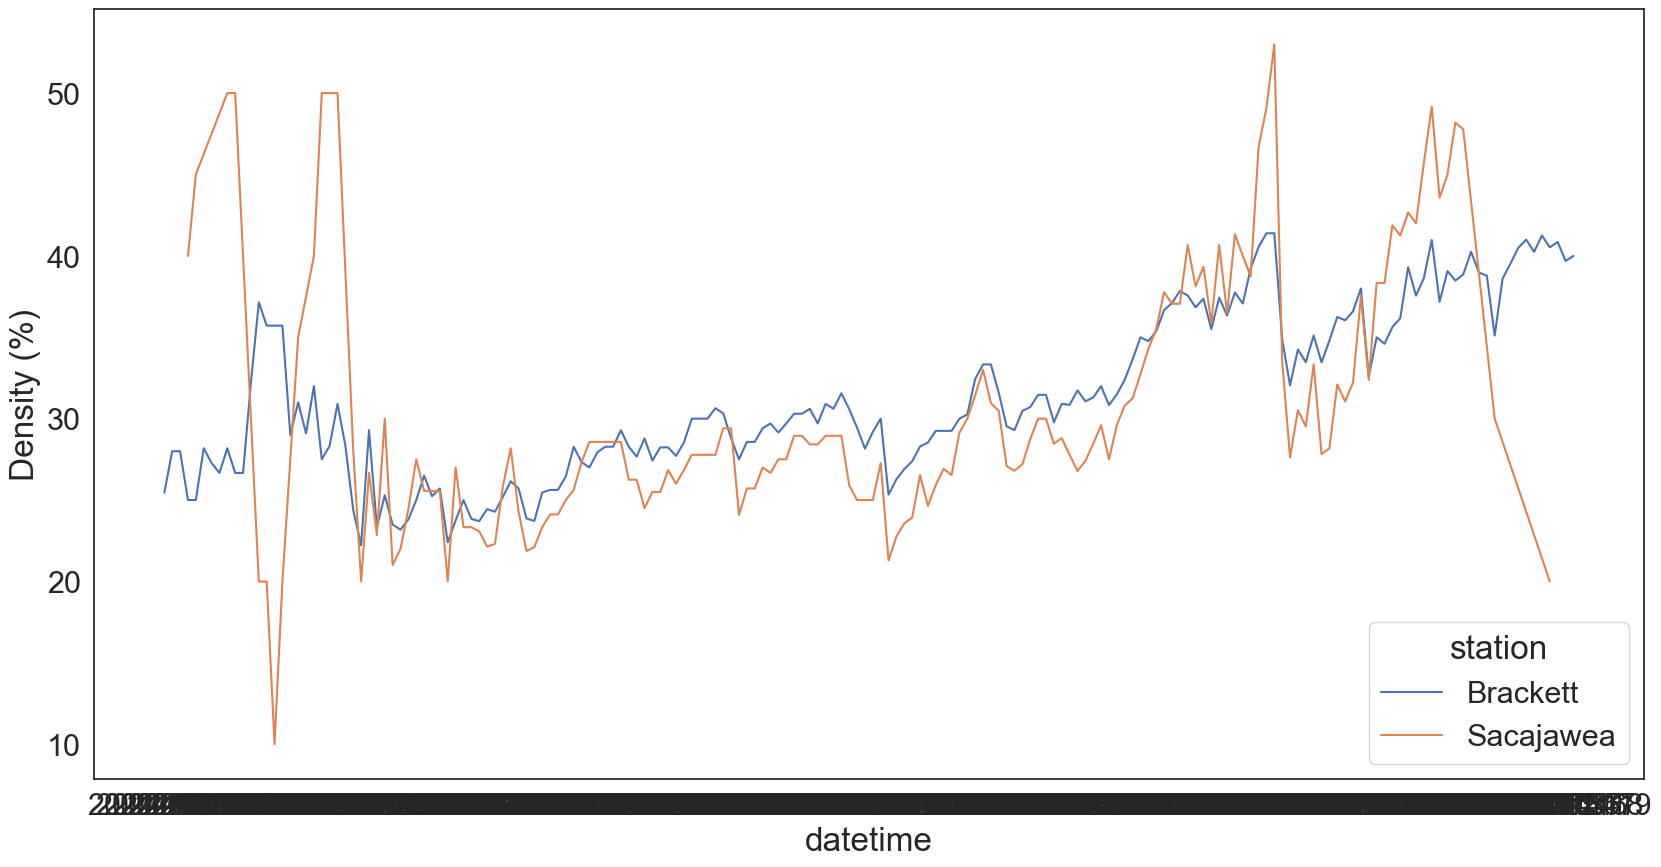

In [12]:
# This plot shows the recorded relationship between snow density at the two SNOTEL stations
# I need to update this figure to better display this data
# Draw attention to the large spikes early and late observed at the Sac station caused by snow accumulating and melting
plt.figure(figsize = (20,10))
sns.set(font_scale=2)
sns.set_style("white")

sns.lineplot(data = highlight, x = 'datetime', y = 'Density (%)', hue = 'station')

## Step 1: Create Visualizations for the Data

### Start with some time series visualizations 

In [13]:
# Create a column that shows the day of the year for the entire period of record
snotel_df['DOY'] = pd.to_datetime(snotel_df['datetime']).dt.strftime('%m-%d')
snotel_df.head()

datetime   station  Year  Month  Daily Precipitation (cm)   
0  1994-09-29  Brackett  1994      9                       NaN  \
1  1994-09-30  Brackett  1994      9                       NaN   
2  1994-10-01  Brackett  1994     10                     1.270   
3  1994-10-02  Brackett  1994     10                     0.000   
4  1994-10-03  Brackett  1994     10                     0.254   

   Daily Snow Depth (cm)  Daily Water Equivalent (cm)  Daily Average Temp (C)   
0                    NaN                          NaN                     8.5  \
1                    NaN                          NaN                     7.8   
2                    NaN                          NaN                     9.0   
3                    NaN                          NaN                    -2.3   
4                    NaN                          NaN                    -6.0   

   Density (%)  Density (kg/m3)    DOY  
0          NaN              NaN  09-29  
1          NaN              NaN  09-30  
2          NaN              NaN  10-01  
3          NaN              NaN  10-02  
4          NaN              NaN  10-03

In [13]:
# 1. Let's look at annual average air temperature for the 22 years of record
avg_air_temp = pd.pivot_table(snotel_df,
                              values = 'Daily Average Temp (C)',
                              index = 'station',
                              aggfunc=np.mean,
                              columns='Year')
# Set the index by the station name
avg_air_temp = avg_air_temp.reindex(index = ['Brackett','Sacajawea'])
# # Create a new column for the mean values across all years!
avg_air_temp['Mean'] = avg_air_temp.mean(axis = 1)
# There is no data values for the first 5 years, throwing off the axis. Let's drop those since we don't really need that data
avg_air_temp = avg_air_temp.drop([1994,1995,1996,1997,1998,1999], axis = 1)
# # Check to make sure it is correct!
avg_air_temp

Year           2000      2001      2002      2003      2004      2005   
station                                                                 
Brackett   4.084153  4.772603  3.080548  4.476438  3.912842  4.148219  \
Sacajawea  4.073497  4.623562  3.412329  4.855616  4.371038  4.589589   

Year           2006      2007      2008      2009  ...      2014      2015   
station                                            ...                       
Brackett   4.536986  4.621644  3.304372  3.333151  ...  3.801096  5.218356  \
Sacajawea  5.029863  5.204384  3.762568  3.700274  ...  4.374795  5.561096   

Year           2016      2017      2018      2019      2020      2021   
station                                                                 
Brackett   4.853005  4.555616  3.691922  2.816164  4.250820  4.634795  \
Sacajawea  5.400273  5.078630  4.362192  3.347253  4.875137  5.132055   

Year           2022      Mean  
station                        
Brackett   5.652239  3.739867  
Sacajawea  6.195522  4.555077  

[2 rows x 24 columns]

Text(0.5, 162.24999999999997, 'Year')

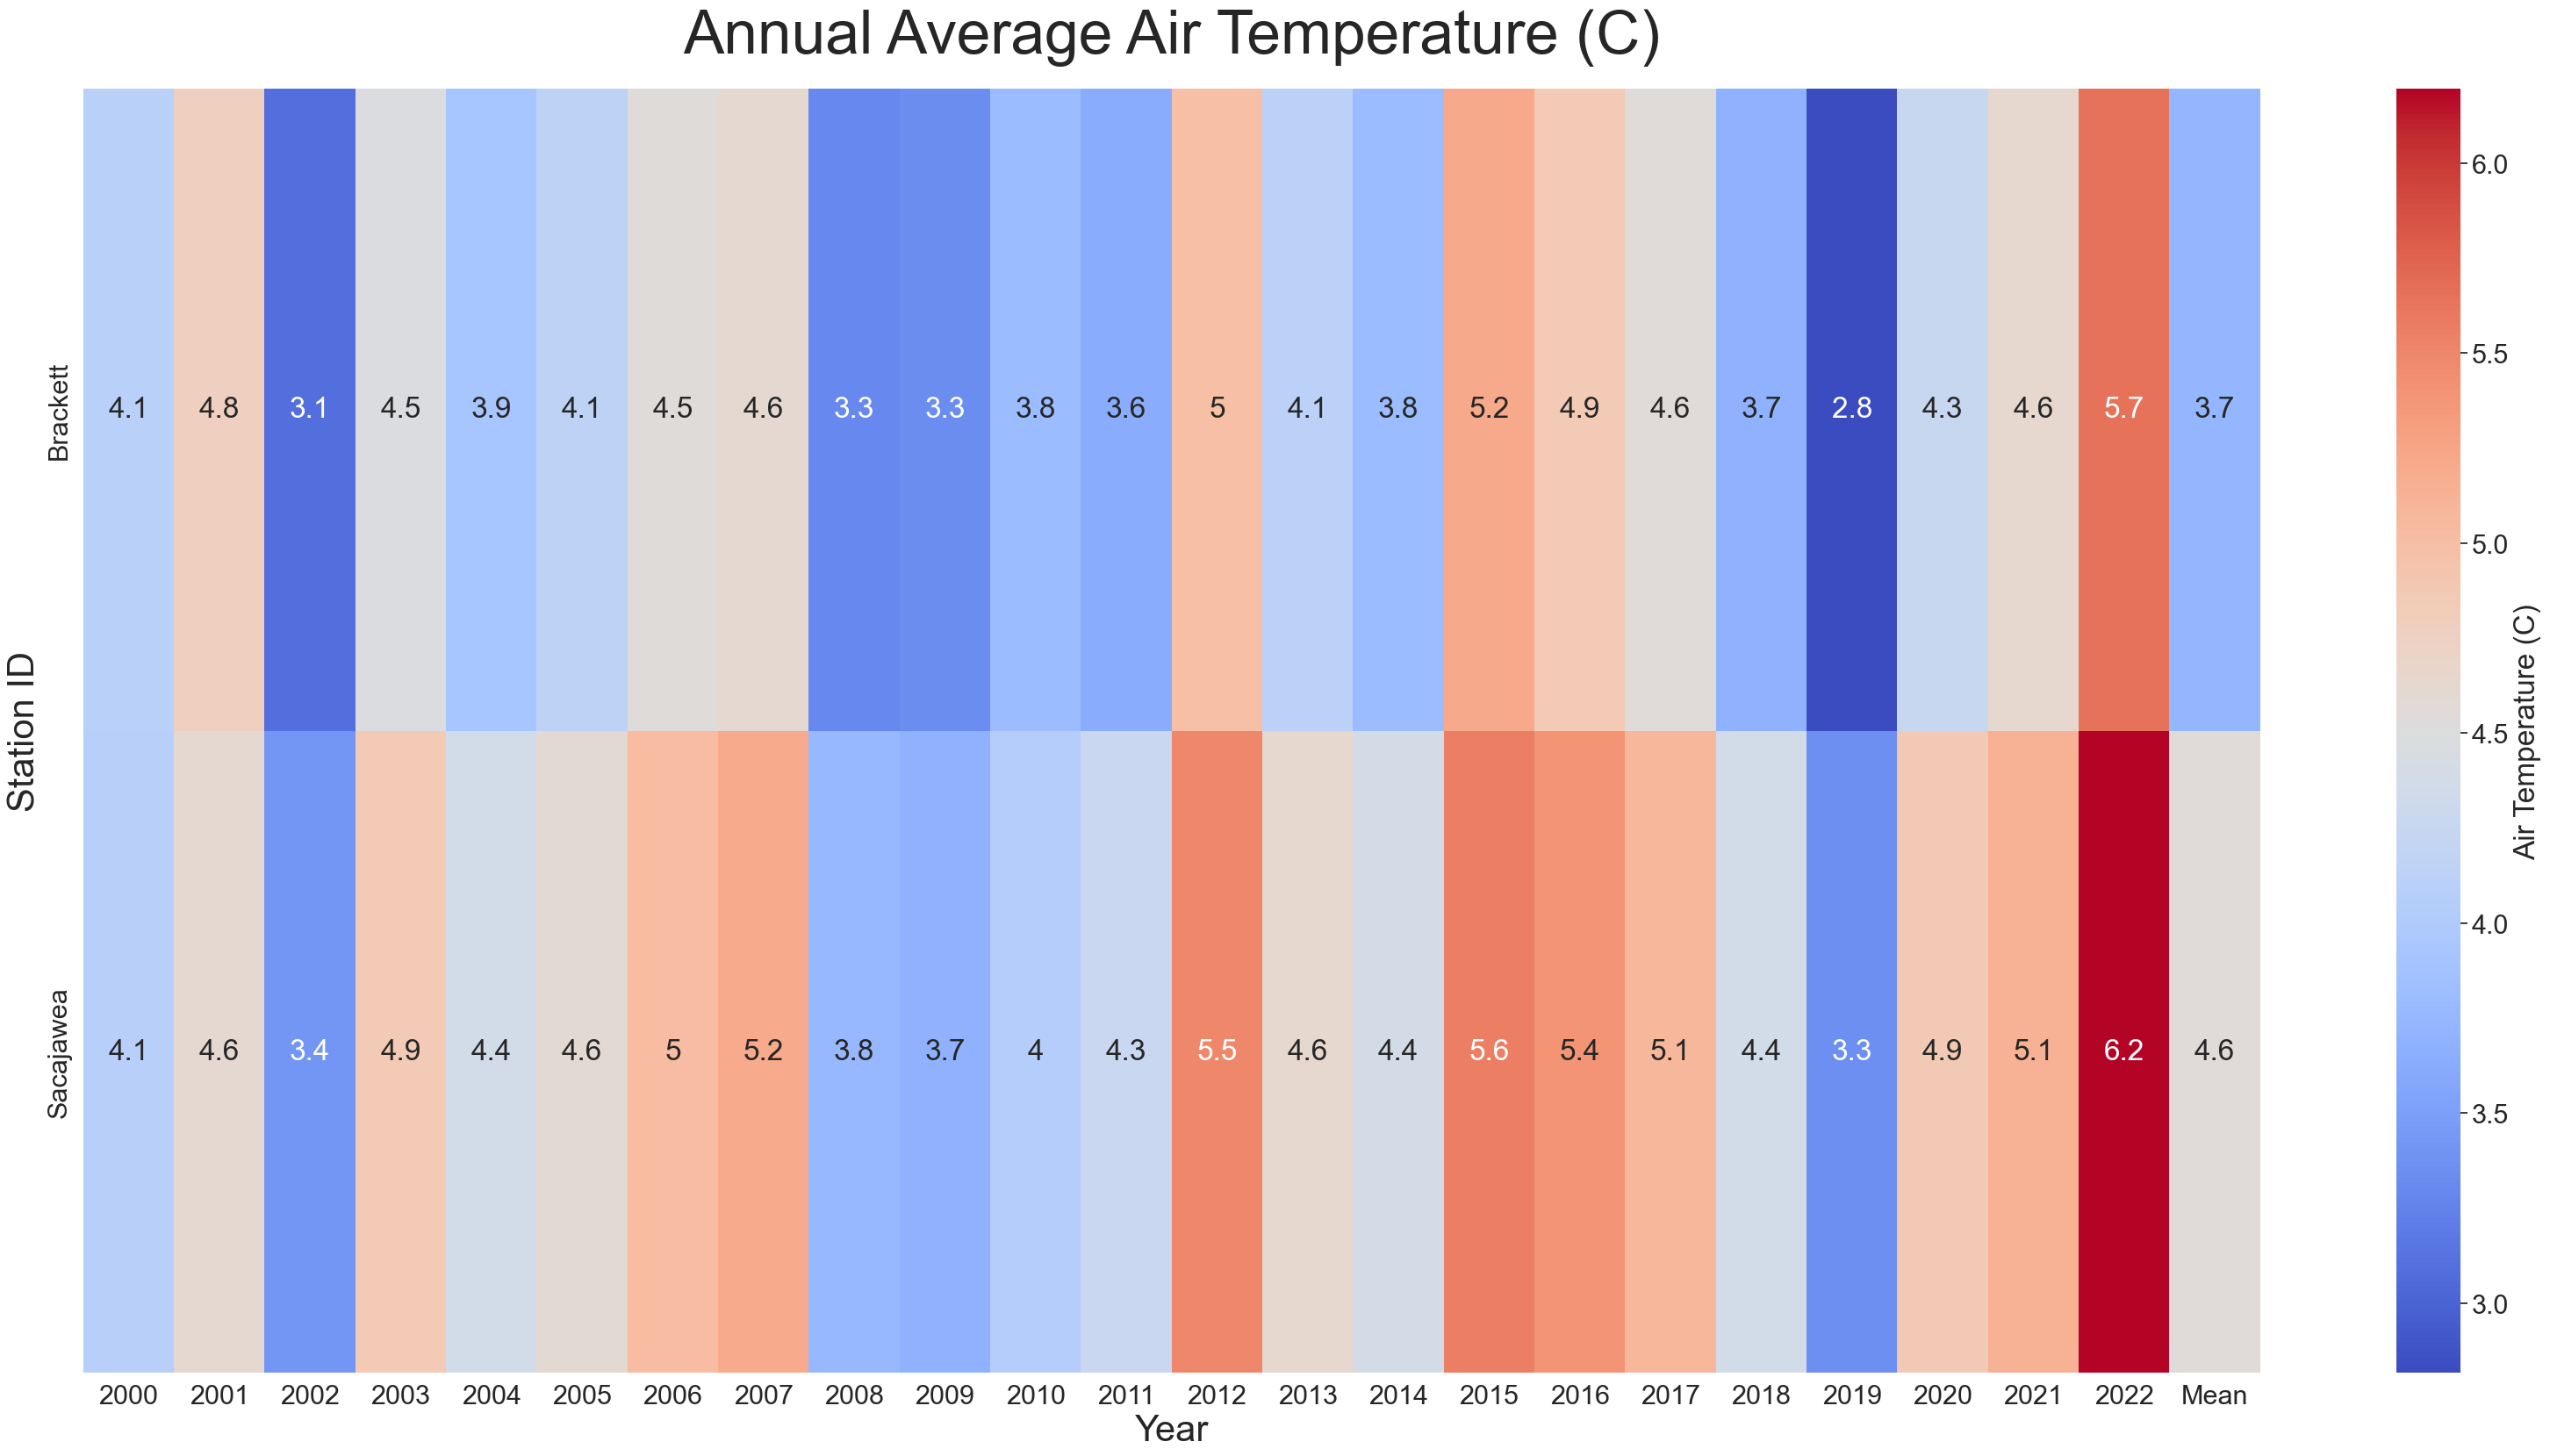

In [14]:
# Now plot the average air temperature data
# Set image parameters
plt.figure(figsize = (40,19))
sns.set(font_scale=2)
# Set the plot title
plt.title('Annual Average Air Temperature (C)', fontsize = 50, pad = 30)

plot = sns.heatmap(avg_air_temp, annot=True, cmap='coolwarm', fmt= '.2g', cbar_kws = {'label':'Air Temperature (C)'})

plt.ylabel('Station ID', fontsize = 30)
plt.xlabel('Year', fontsize = 30)
# plt.savefig('/Users/f67f911/Desktop/Bridger_snotels/Figures/Avg_Annual_AirTemp.png', bbox_inches='tight')

In [15]:
# 2. Now I want to look at monthly air temperature averages!
monthly_avg_air_temp = pd.pivot_table(snotel_df,
                              values = 'Daily Average Temp (C)',
                              index = 'station',
                              aggfunc=np.mean,
                              columns='Month')
# Set the index by the station name
monthly_avg_air_temp = monthly_avg_air_temp.reindex(index = ['Brackett','Sacajawea'])
# # Check to make sure it is correct!
monthly_avg_air_temp = monthly_avg_air_temp.rename(columns = {1:'Janury',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',
                                                             10:'October',11:'November',12:'December'})
monthly_avg_air_temp

Month        Janury  February     March     April       May       June   
station                                                                  
Brackett  -3.865668 -4.853603 -1.372811  1.295119  5.664747  10.371292  \
Sacajawea -2.614867 -4.139846 -0.107854  2.335217  6.362412  11.125217   

Month           July     August  September   October  November  December  
station                                                                   
Brackett   15.857390  14.997811  10.274313  3.565899 -1.021454 -4.682143  
Sacajawea  15.769285  14.460870  10.345693  4.500140  0.191304 -3.717251

Text(0.5, 63.249999999999986, 'Month')

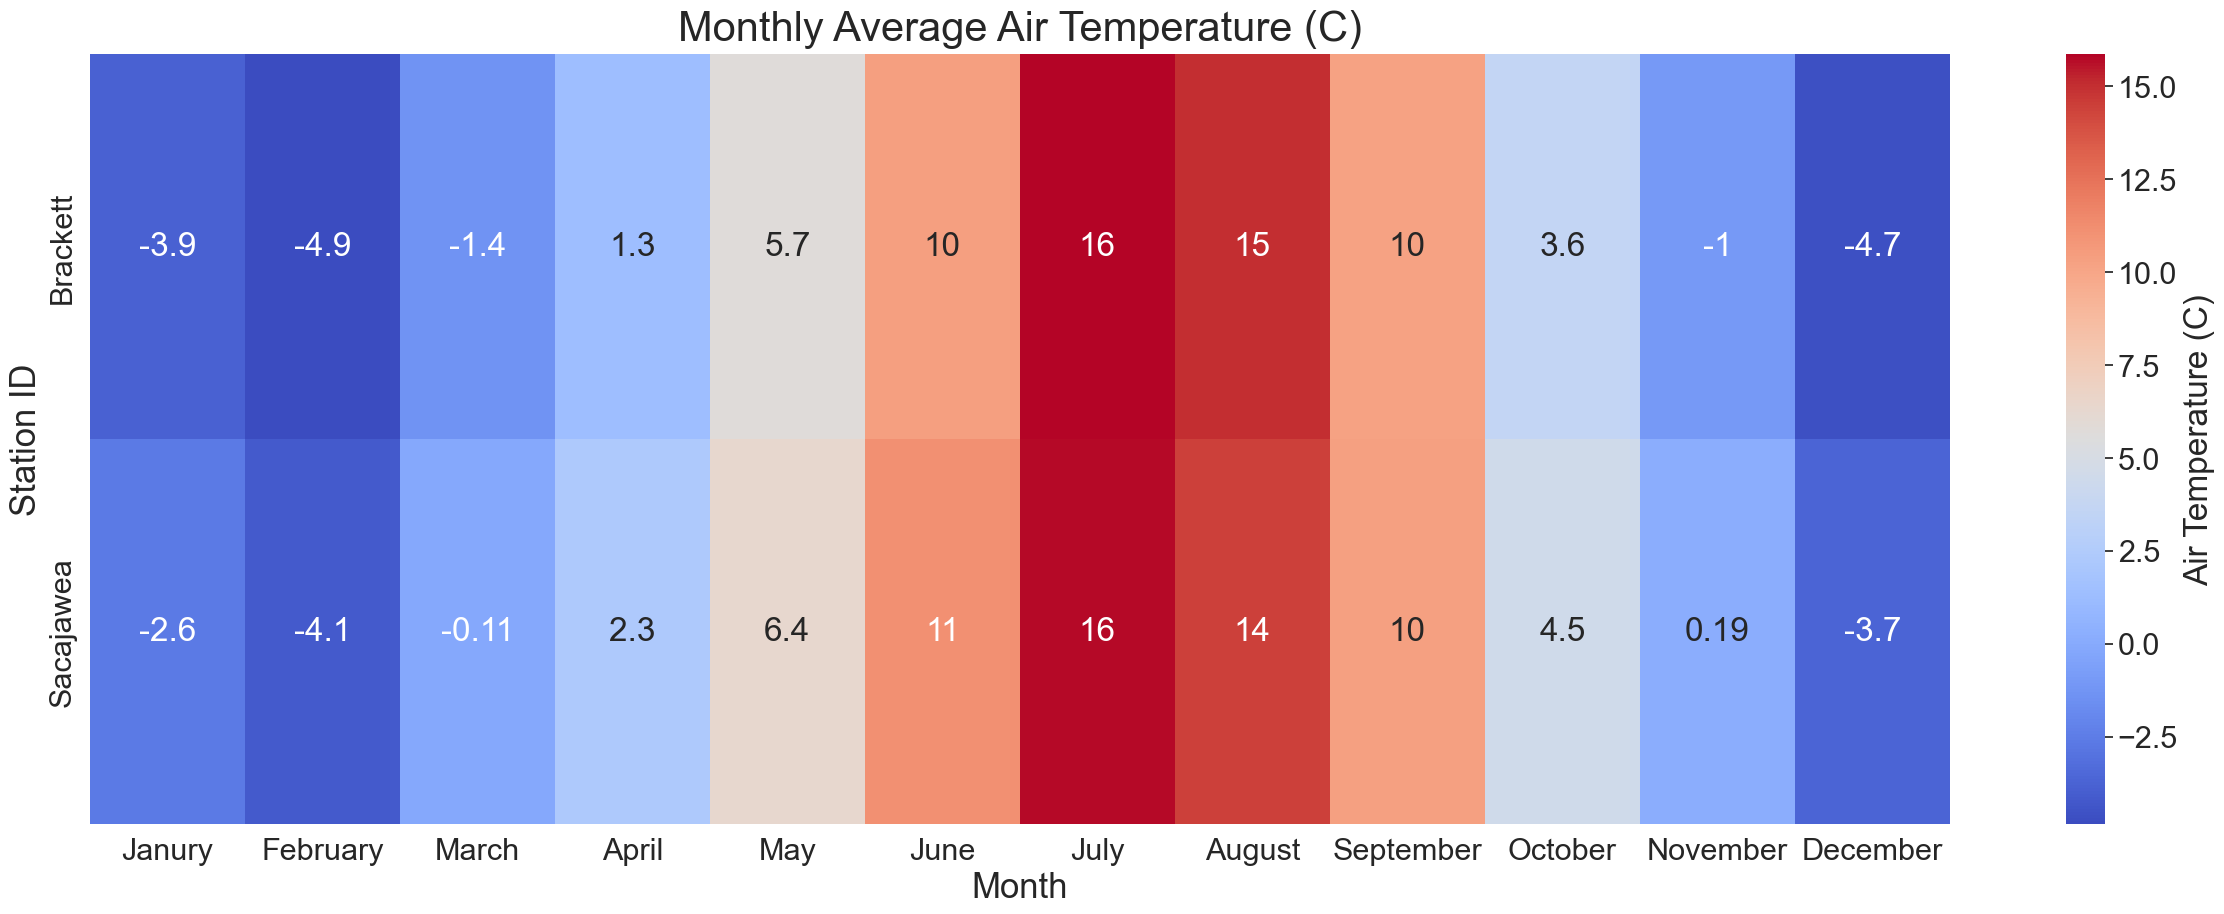

In [26]:
# Now plot the average monthly air temperature data
# Set image parameters
plt.figure(figsize = (30,10))
sns.set(font_scale=2)
# Set the plot title
#  
plt.title('Monthly Average Air Temperature (C)', fontsize = 30, pad = 10)

plot = sns.heatmap(monthly_avg_air_temp, annot=True, cmap='coolwarm', fmt= '.2g', cbar_kws = {'label':'Air Temperature (C)'})

plt.ylabel('Station ID', fontsize = 25)
plt.xlabel('Month', fontsize = 25)
# plt.savefig('/Users/f67f911/Desktop/Bridger_snotels/Figures/Avg_Monthly_AirTemp.png', bbox_inches='tight')

In [19]:
snotel_df.head()

datetime   station  Year  Month  Daily Precipitation (cm)   
0  1994-09-29  Brackett  1994      9                       NaN  \
1  1994-09-30  Brackett  1994      9                       NaN   
2  1994-10-01  Brackett  1994     10                     1.270   
3  1994-10-02  Brackett  1994     10                     0.000   
4  1994-10-03  Brackett  1994     10                     0.254   

   Daily Snow Depth (cm)  Daily Water Equivalent (cm)  Daily Average Temp (C)   
0                    NaN                          NaN                     8.5  \
1                    NaN                          NaN                     7.8   
2                    NaN                          NaN                     9.0   
3                    NaN                          NaN                    -2.3   
4                    NaN                          NaN                    -6.0   

   Density (%)  Density (kg/m3)    DOY  
0          NaN              NaN  09-29  
1          NaN              NaN  09-30  
2          NaN              NaN  10-01  
3          NaN              NaN  10-02  
4          NaN              NaN  10-03

In [17]:
# 2.5 Now I want to look at monthly snow depth
monthly_avg_snowdepth = pd.pivot_table(snotel_df,
                              values = 'Daily Snow Depth (cm)',
                              index = 'station',
                              aggfunc=np.mean,
                              columns='Month')
# Set the index by the station name
monthly_avg_snowdepth = monthly_avg_snowdepth.reindex(index = ['Brackett','Sacajawea'])

# # Check to make sure it is correct!
monthly_avg_snowdepth = monthly_avg_snowdepth.rename(columns = {1:'Janury',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',
                                                             10:'October',11:'November',12:'December'})
monthly_avg_snowdepth

Month         Janury    February       March       April        May   
station                                                               
Brackett   97.826871  130.654903  146.579341  144.311501  97.685829  \
Sacajawea  68.793032   96.929097  104.766806   89.975267  50.429146   

Month           June  July  August  September    October   November   December  
station                                                                         
Brackett   38.003788  2.54    3.81   5.750943  15.029632  32.427633  63.663871  
Sacajawea  16.086667   NaN    5.08   5.080000  10.465741  18.710687  40.820258

Text(0.5, 162.24999999999997, 'Month')

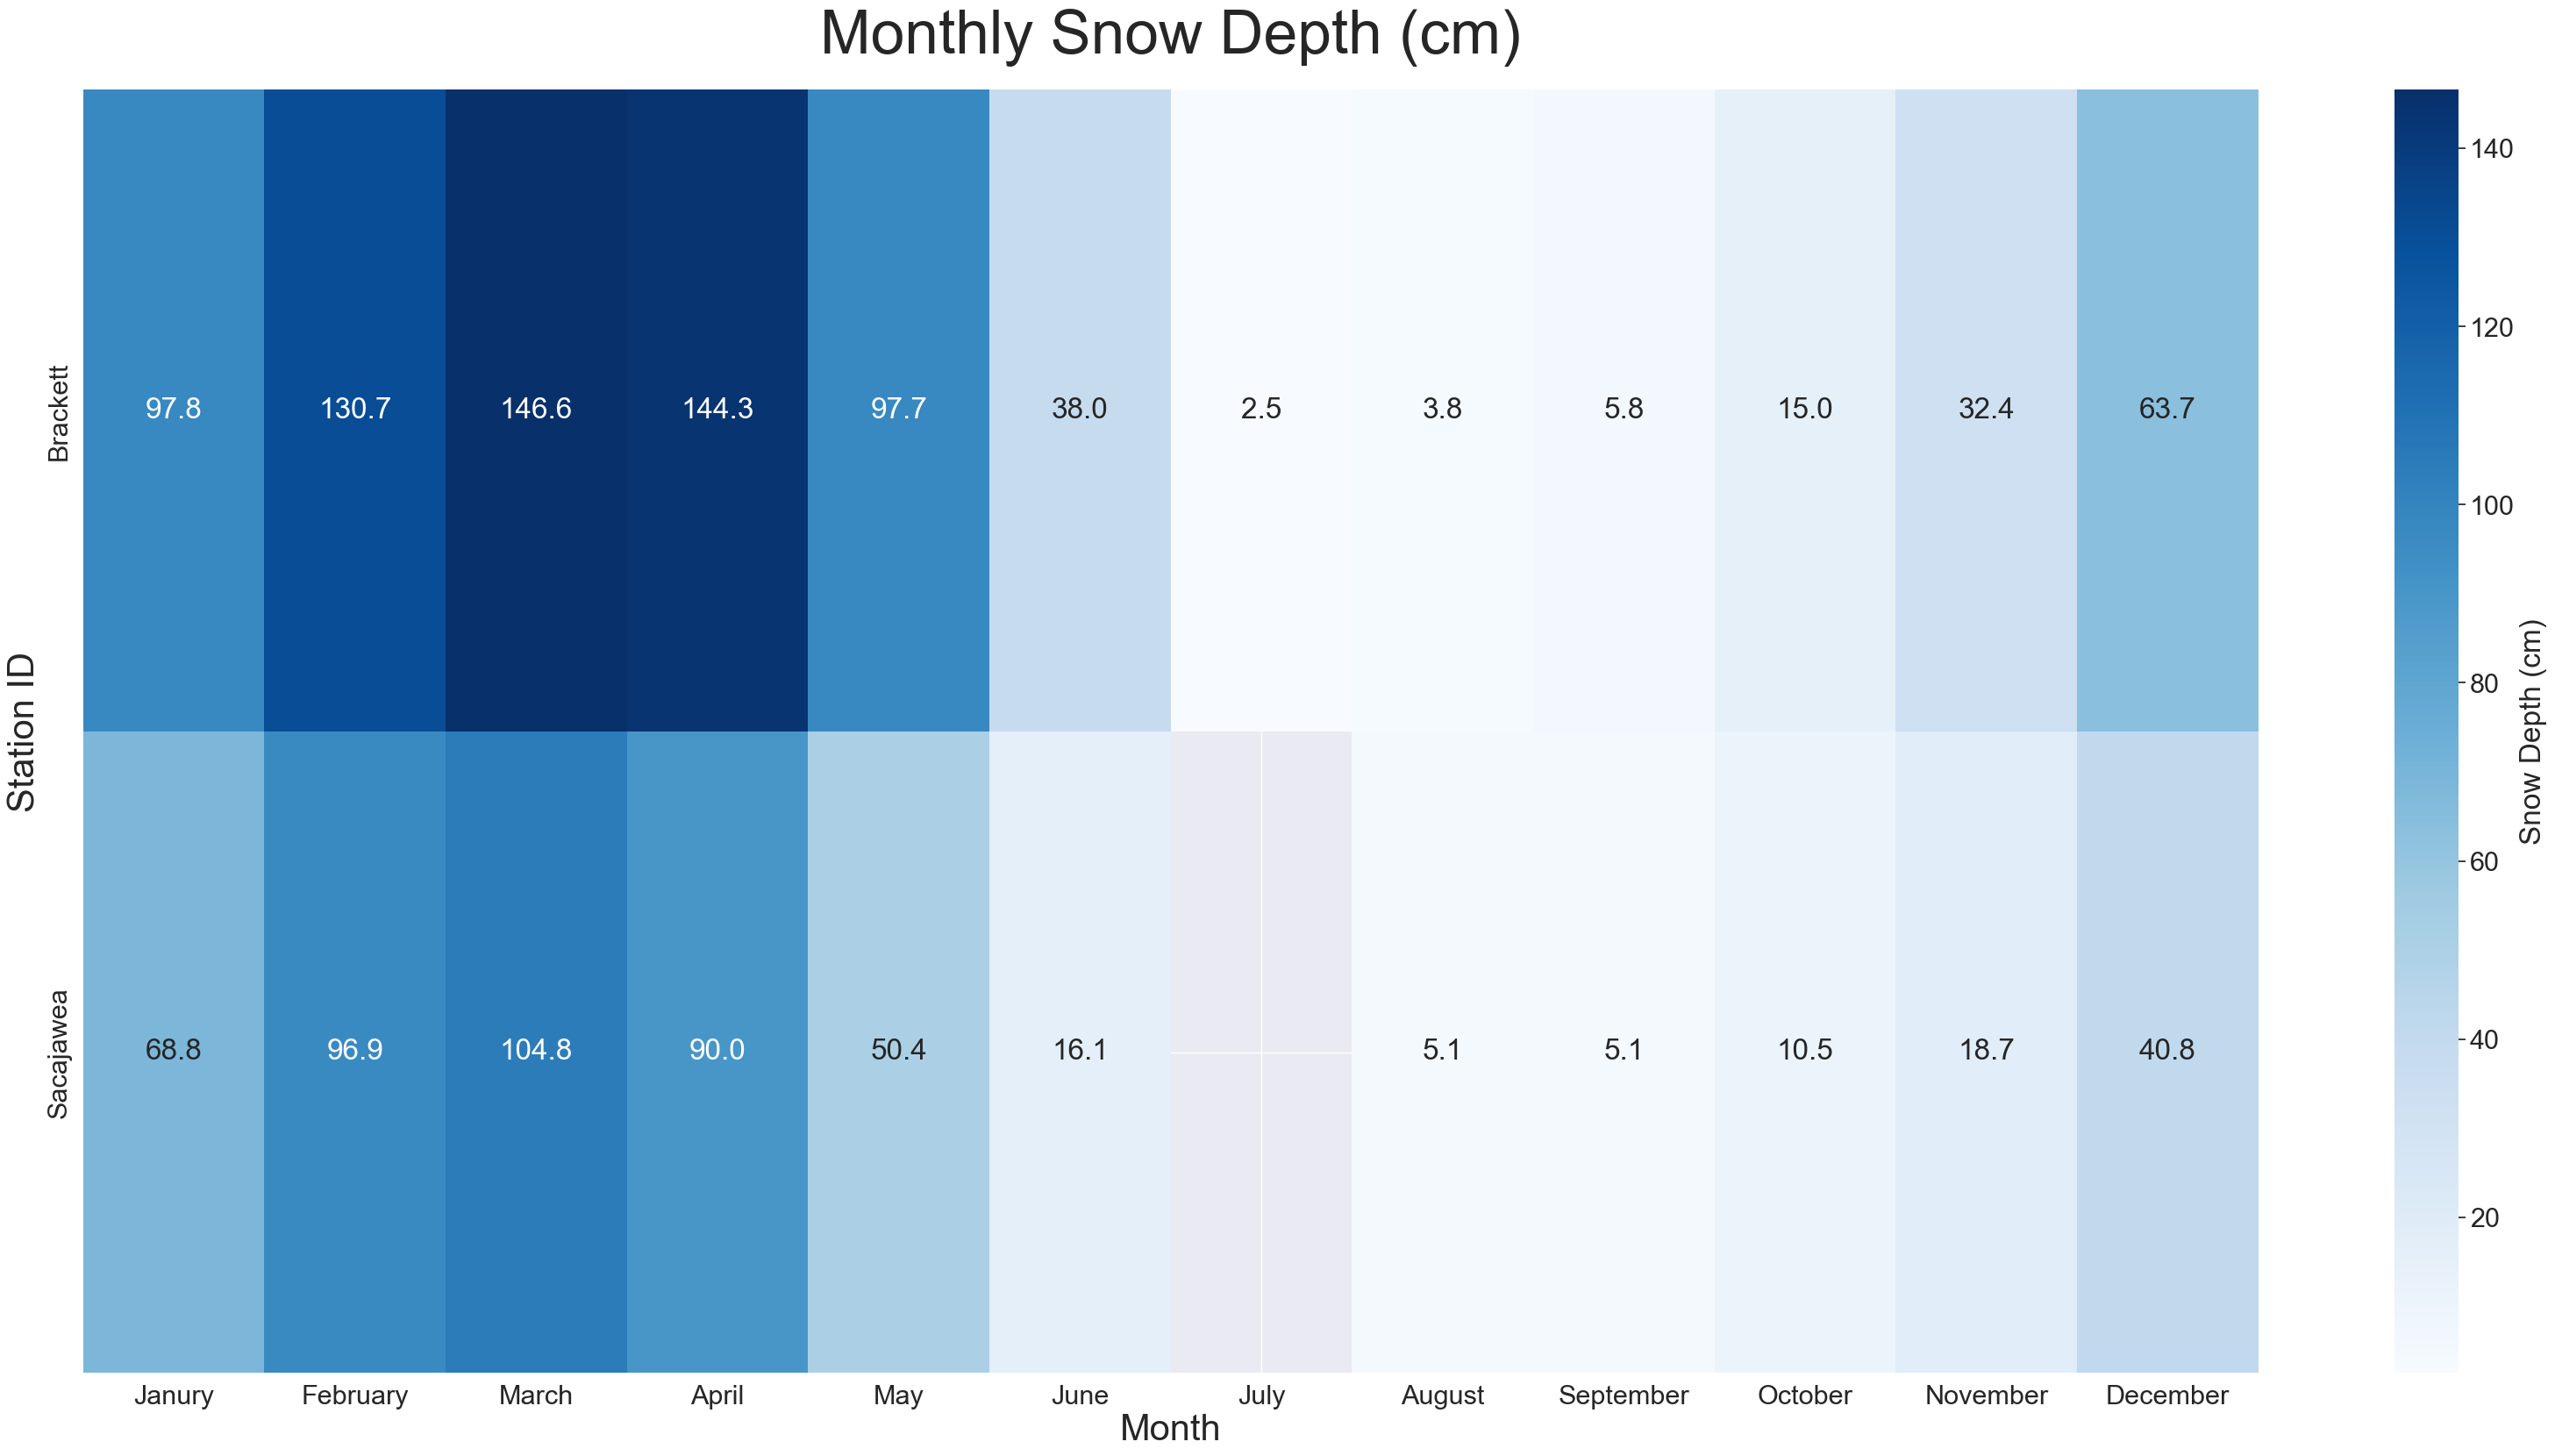

In [18]:
# Now plot the average monthly snow depth data
# Set image parameters
plt.figure(figsize = (40,19))
sns.set(font_scale=2)
# Set the plot title
#  
plt.title('Monthly Snow Depth (cm)', fontsize = 50, pad = 30)

plot = sns.heatmap(monthly_avg_snowdepth, annot=True, cmap='Blues', fmt= '.1f', cbar_kws = {'label':'Snow Depth (cm)'})

plt.ylabel('Station ID', fontsize = 30)
plt.xlabel('Month', fontsize = 30)
# plt.savefig('/Users/f67f911/Desktop/Bridger_snotels/Figures/Avg_Monthly_SnowDepth.png', bbox_inches='tight')

In [19]:
# 2.5 Now I want to look at monthly density
monthly_avg_density = pd.pivot_table(snotel_df,
                              values = 'Density (%)',
                              index = 'station',
                              aggfunc=np.mean,
                              columns='Month')
# Set the index by the station name
monthly_avg_density = monthly_avg_density.reindex(index = ['Brackett','Sacajawea'])

# # Check to make sure it is correct!
monthly_avg_density = monthly_avg_density.rename(columns = {1:'Janury',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',
                                                             10:'October',11:'November',12:'December'})
monthly_avg_density

Month         Janury   February      March      April        May       June   
station                                                                       
Brackett   26.280233  28.056474  32.128865  38.024542  42.786037  40.896321  \
Sacajawea  25.618638  26.615321  31.500169  38.156741  42.591656  33.215050   

Month      July  August  September    October   November   December  
station                                                              
Brackett   10.0    15.0  19.491830  21.186672  23.536424  23.851594  
Sacajawea   NaN    10.0  12.555556  22.705873  27.090151  24.996658

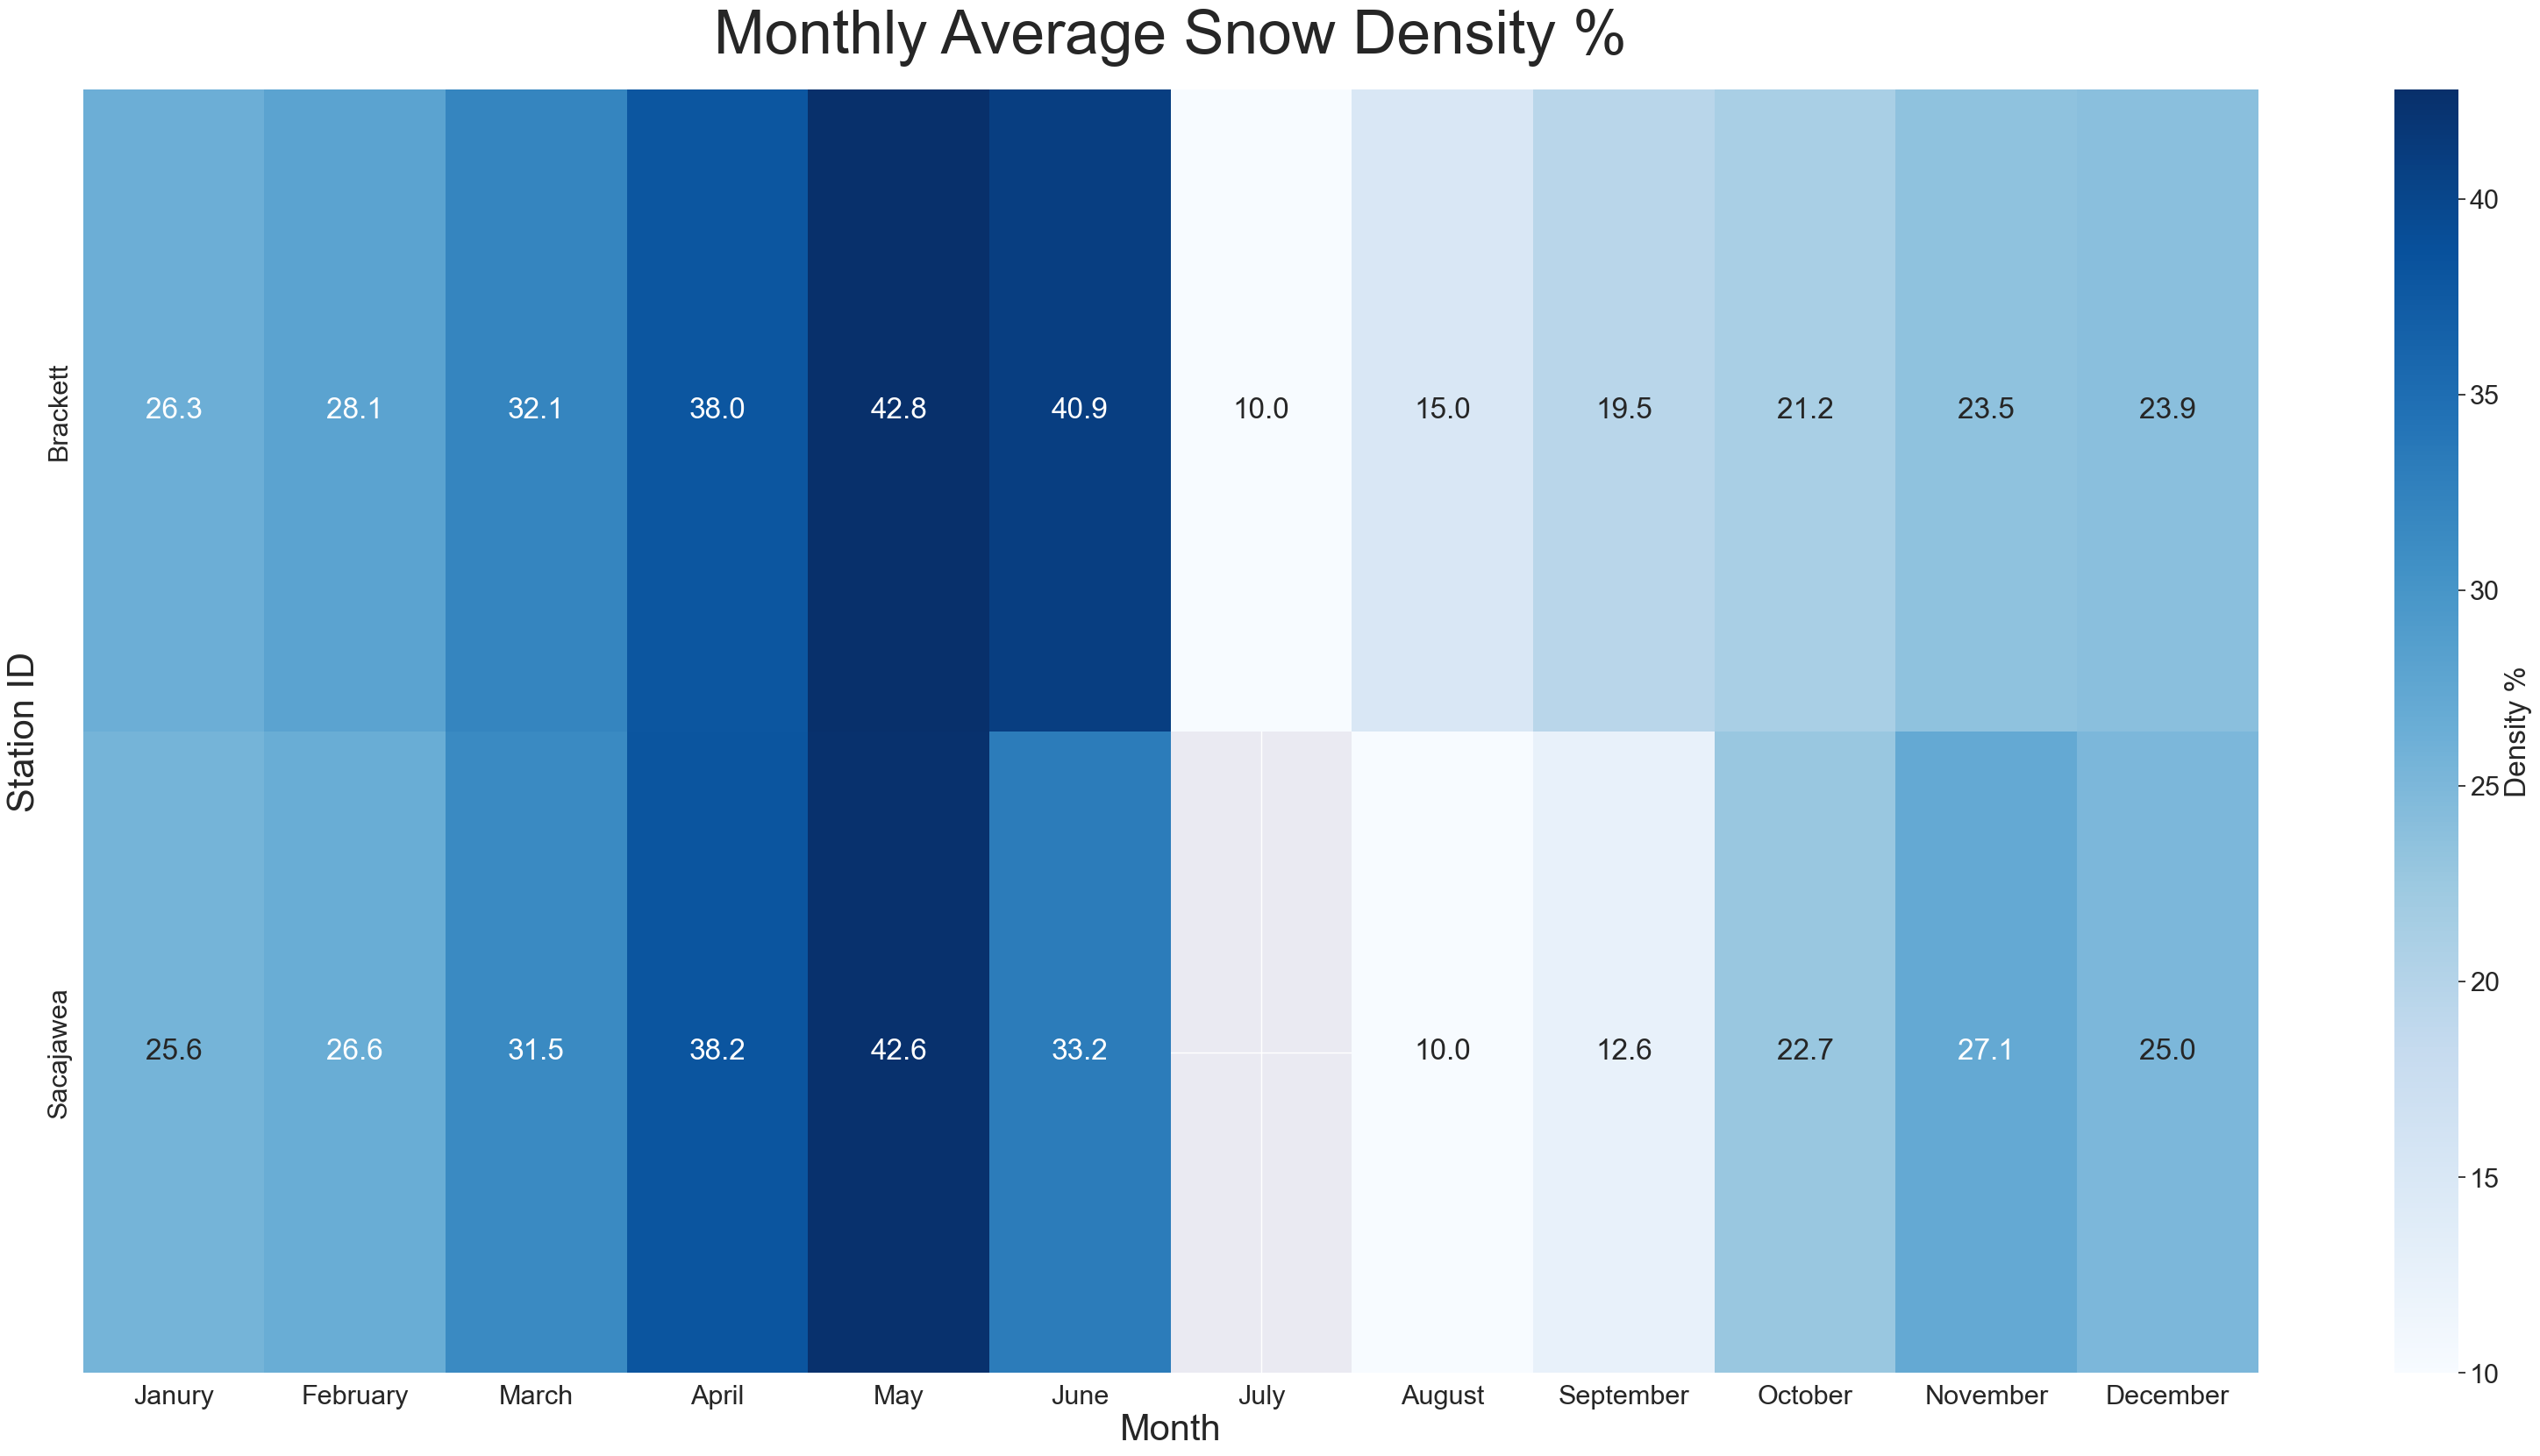

In [22]:
# Now plot the average monthly snow density
# Set image parameters
plt.figure(figsize = (40,19))
sns.set(font_scale=2)
# Set the plot title
#  
plt.title('Monthly Average Snow Density %', fontsize = 50, pad = 30)

plot = sns.heatmap(monthly_avg_density, annot=True, cmap='Blues', fmt= '.1f', cbar_kws = {'label':'Density %'})

plt.ylabel('Station ID', fontsize = 30)
plt.xlabel('Month', fontsize = 30)
plt.savefig('/Users/f67f911/Desktop/Bridger_snotels/Figures/Avg_Monthly_Density.png', bbox_inches='tight')

In [23]:
# 3. Let's look at annual precipitation now for each site
yearly_total_precip = pd.pivot_table(snotel_df,
                              values = 'Daily Precipitation (cm)',
                              index = 'station',
                              aggfunc=np.sum,
                              columns='Year')
# Set the index by the station name
yearly_total_precip = yearly_total_precip.reindex(index = ['Brackett','Sacajawea'])
# # Create a new column for the mean values across all years!
yearly_total_precip['Mean'] = yearly_total_precip.mean(axis = 1)
yearly_total_precip = yearly_total_precip.drop([1994,1995,1996,1997,1998,1999], axis = 1)
yearly_total_precip

Year          2000     2001     2002     2003     2004     2005     2006   
station                                                                    
Brackett   116.078  107.188  124.460  125.984  133.604  135.636  112.014  \
Sacajawea  101.600   94.488  100.584  108.458  122.936  130.302  104.394   

Year          2007     2008     2009  ...     2014     2015     2016     2017   
station                               ...                                       
Brackett   110.236  138.938  130.556  ...  157.480  127.508  120.904  144.018  \
Sacajawea  109.982  135.890  112.268  ...  146.558  116.586  118.364  125.730   

Year          2018     2019     2020     2021    2022        Mean  
station                                                            
Brackett   165.354  144.780  125.476  106.172  86.614  128.129862  
Sacajawea  145.288  129.286  116.840   92.710  76.962  114.204750  

[2 rows x 24 columns]

Text(0.5, 162.24999999999997, 'Year')

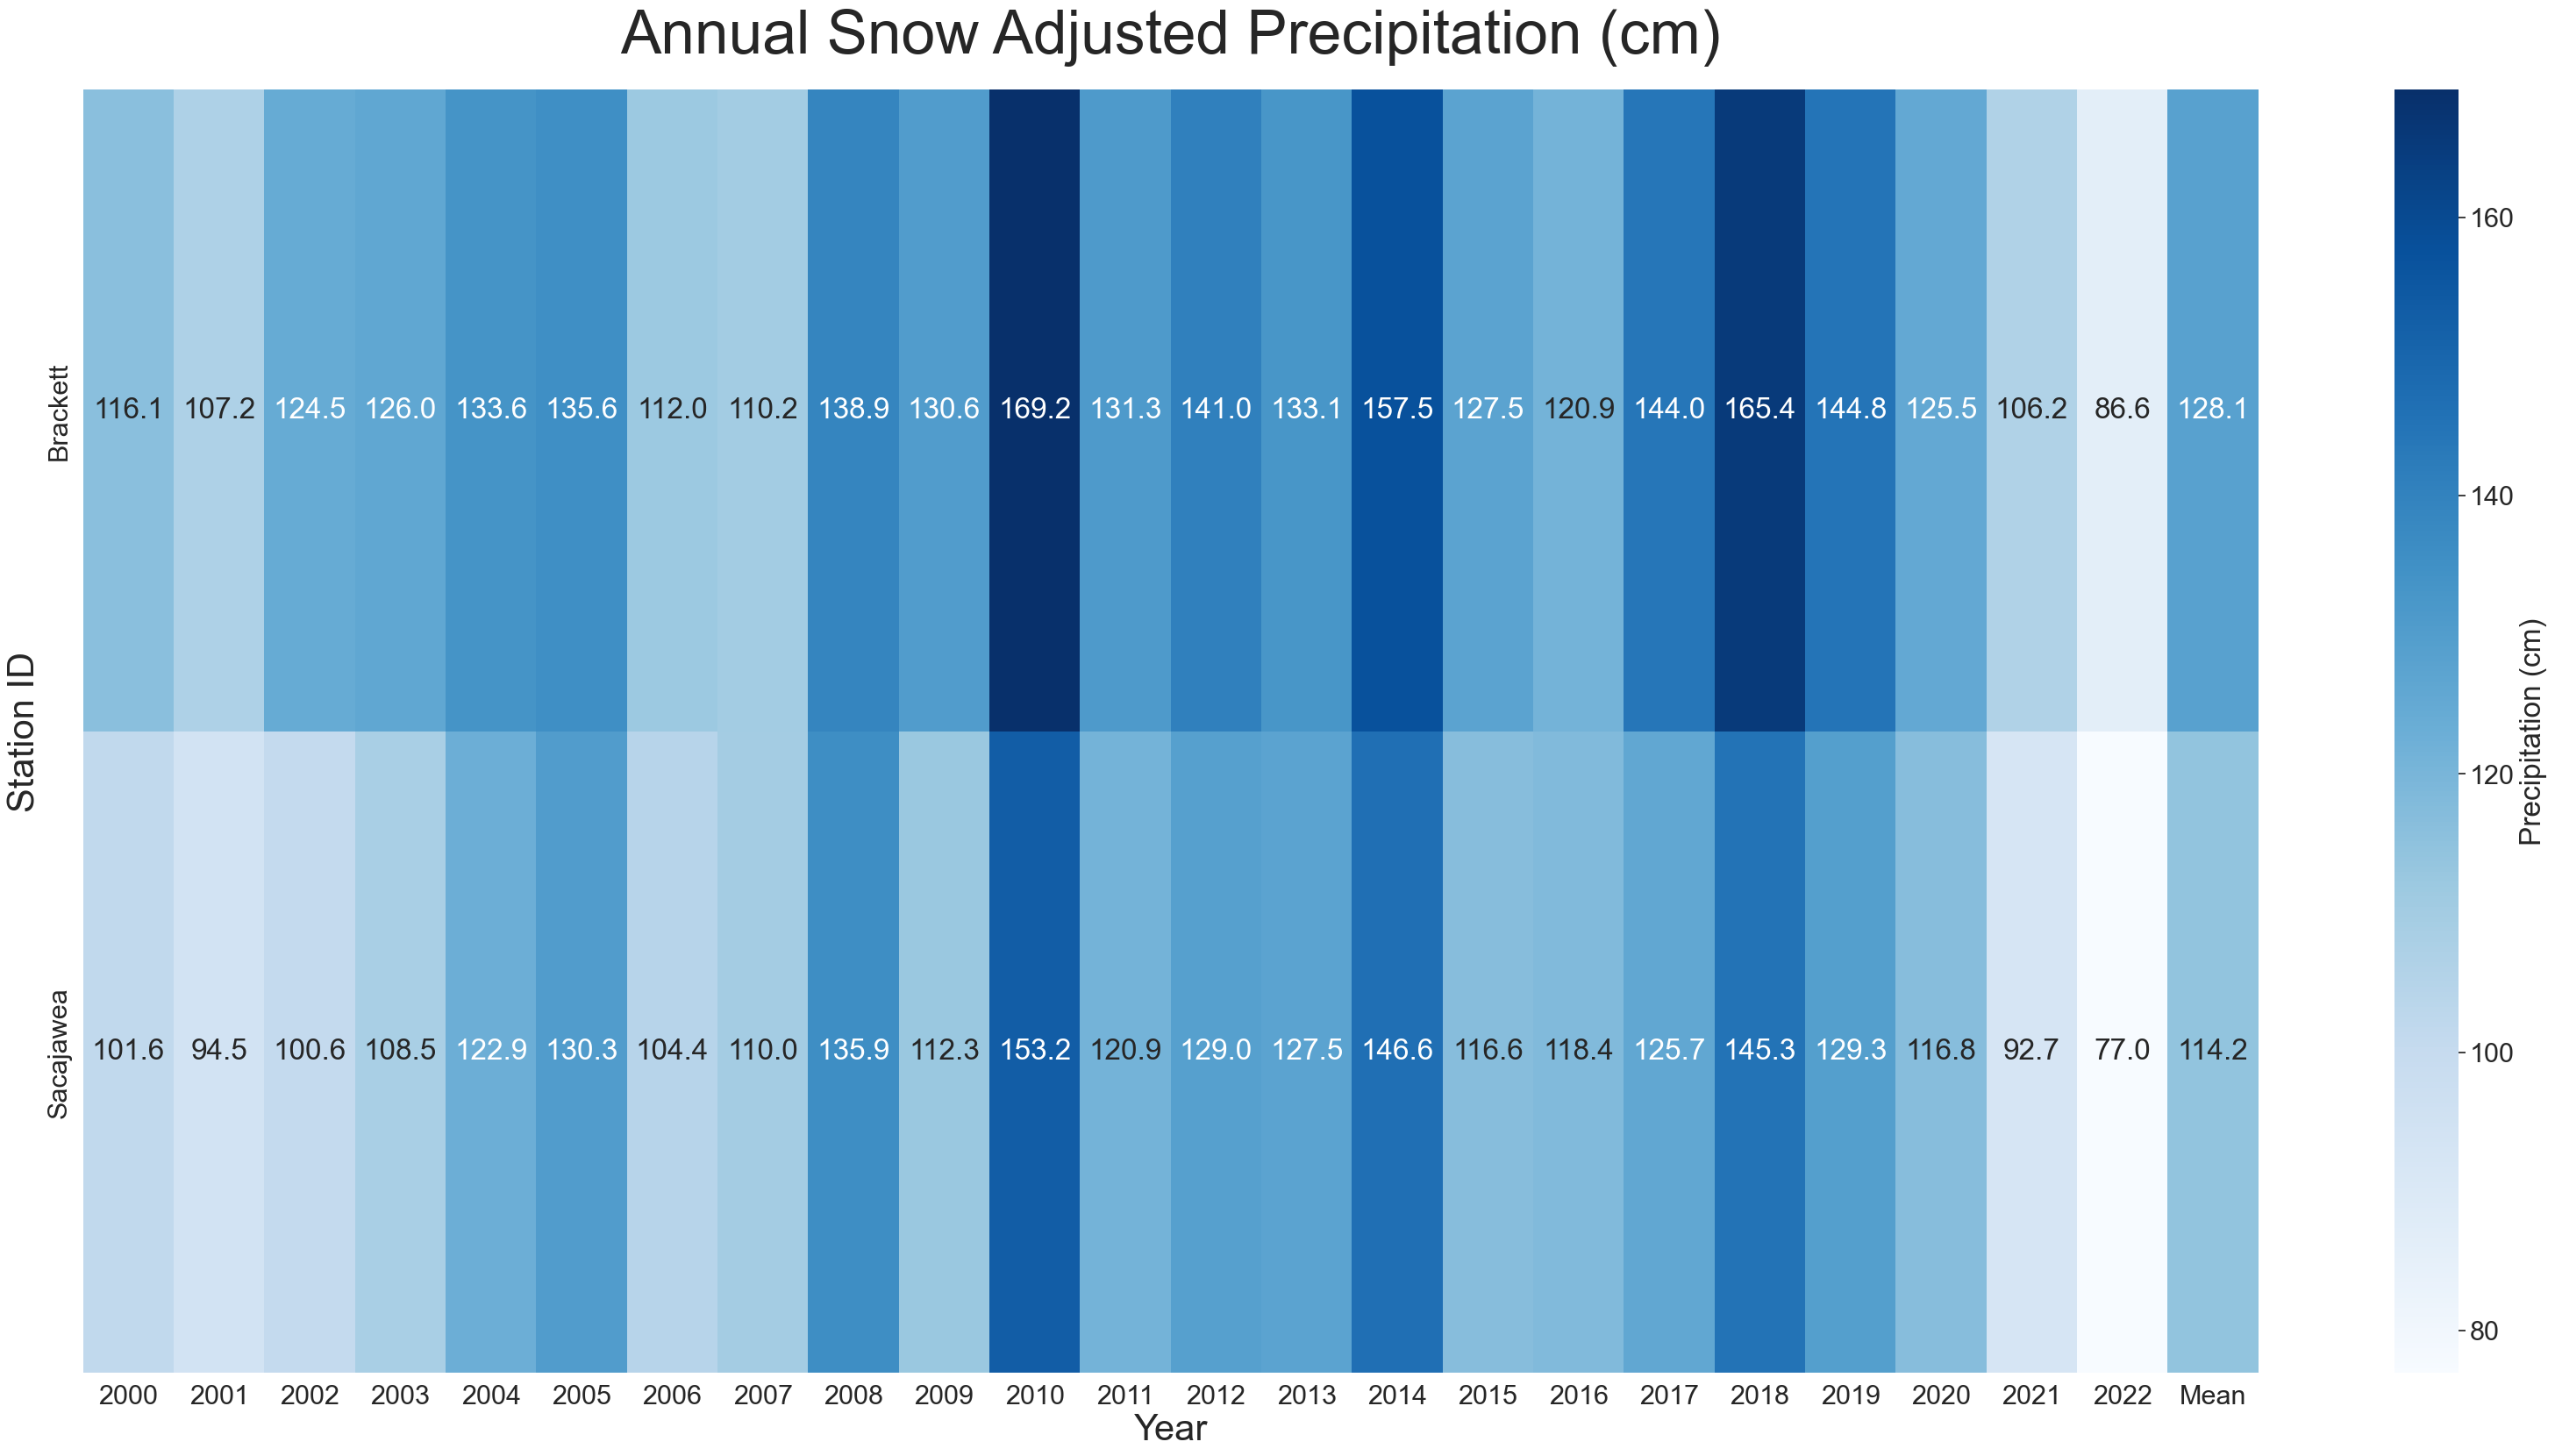

In [25]:
# Now plot the average annual precipitation 
# Set image parameters
plt.figure(figsize = (40,19))
sns.set(font_scale=2)
# Set the plot title
plt.title('Annual Snow Adjusted Precipitation (cm)', fontsize = 50, pad = 30)

plot = sns.heatmap(yearly_total_precip, annot=True, cmap='Blues', fmt= '.1f', cbar_kws = {'label':'Precipitation (cm)'})

plt.ylabel('Station ID', fontsize = 30)
plt.xlabel('Year', fontsize = 30)
# plt.savefig('/Users/f67f911/Desktop/Bridger_snotels/Figures/Annual_Adjusted_Precip.png', bbox_inches='tight')

In [26]:
# 3.5 Now I want to look at monthly precipitation
monthly_avg_precip = pd.pivot_table(snotel_df,
                              values = 'Daily Precipitation (cm)',
                              index = 'station',
                              aggfunc=np.sum,
                              columns='Month')
# Set the index by the station name
monthly_avg_precip = monthly_avg_precip.reindex(index = ['Brackett','Sacajawea'])
monthly_avg_precip['Mean'] = monthly_avg_precip.mean(axis = 1)
# # Check to make sure it is correct!
monthly_avg_precip = monthly_avg_precip.rename(columns = {1:'Janury',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',
                                                             10:'October',11:'November',12:'December'})
monthly_avg_precip

Month       Janury  February   March    April      May     June     July   
station                                                                    
Brackett   360.426   345.440  382.27  455.422  409.194  367.538  115.062  \
Sacajawea  225.044   246.888  233.68  309.372  302.260  323.088   95.758   

Month       August  September  October  November  December        Mean  
station                                                                 
Brackett   123.698    196.596  313.436   320.548   326.136  309.647167  
Sacajawea   97.028    168.656  255.016   241.808   242.316  228.409500

Text(0.5, 162.24999999999997, 'Month')

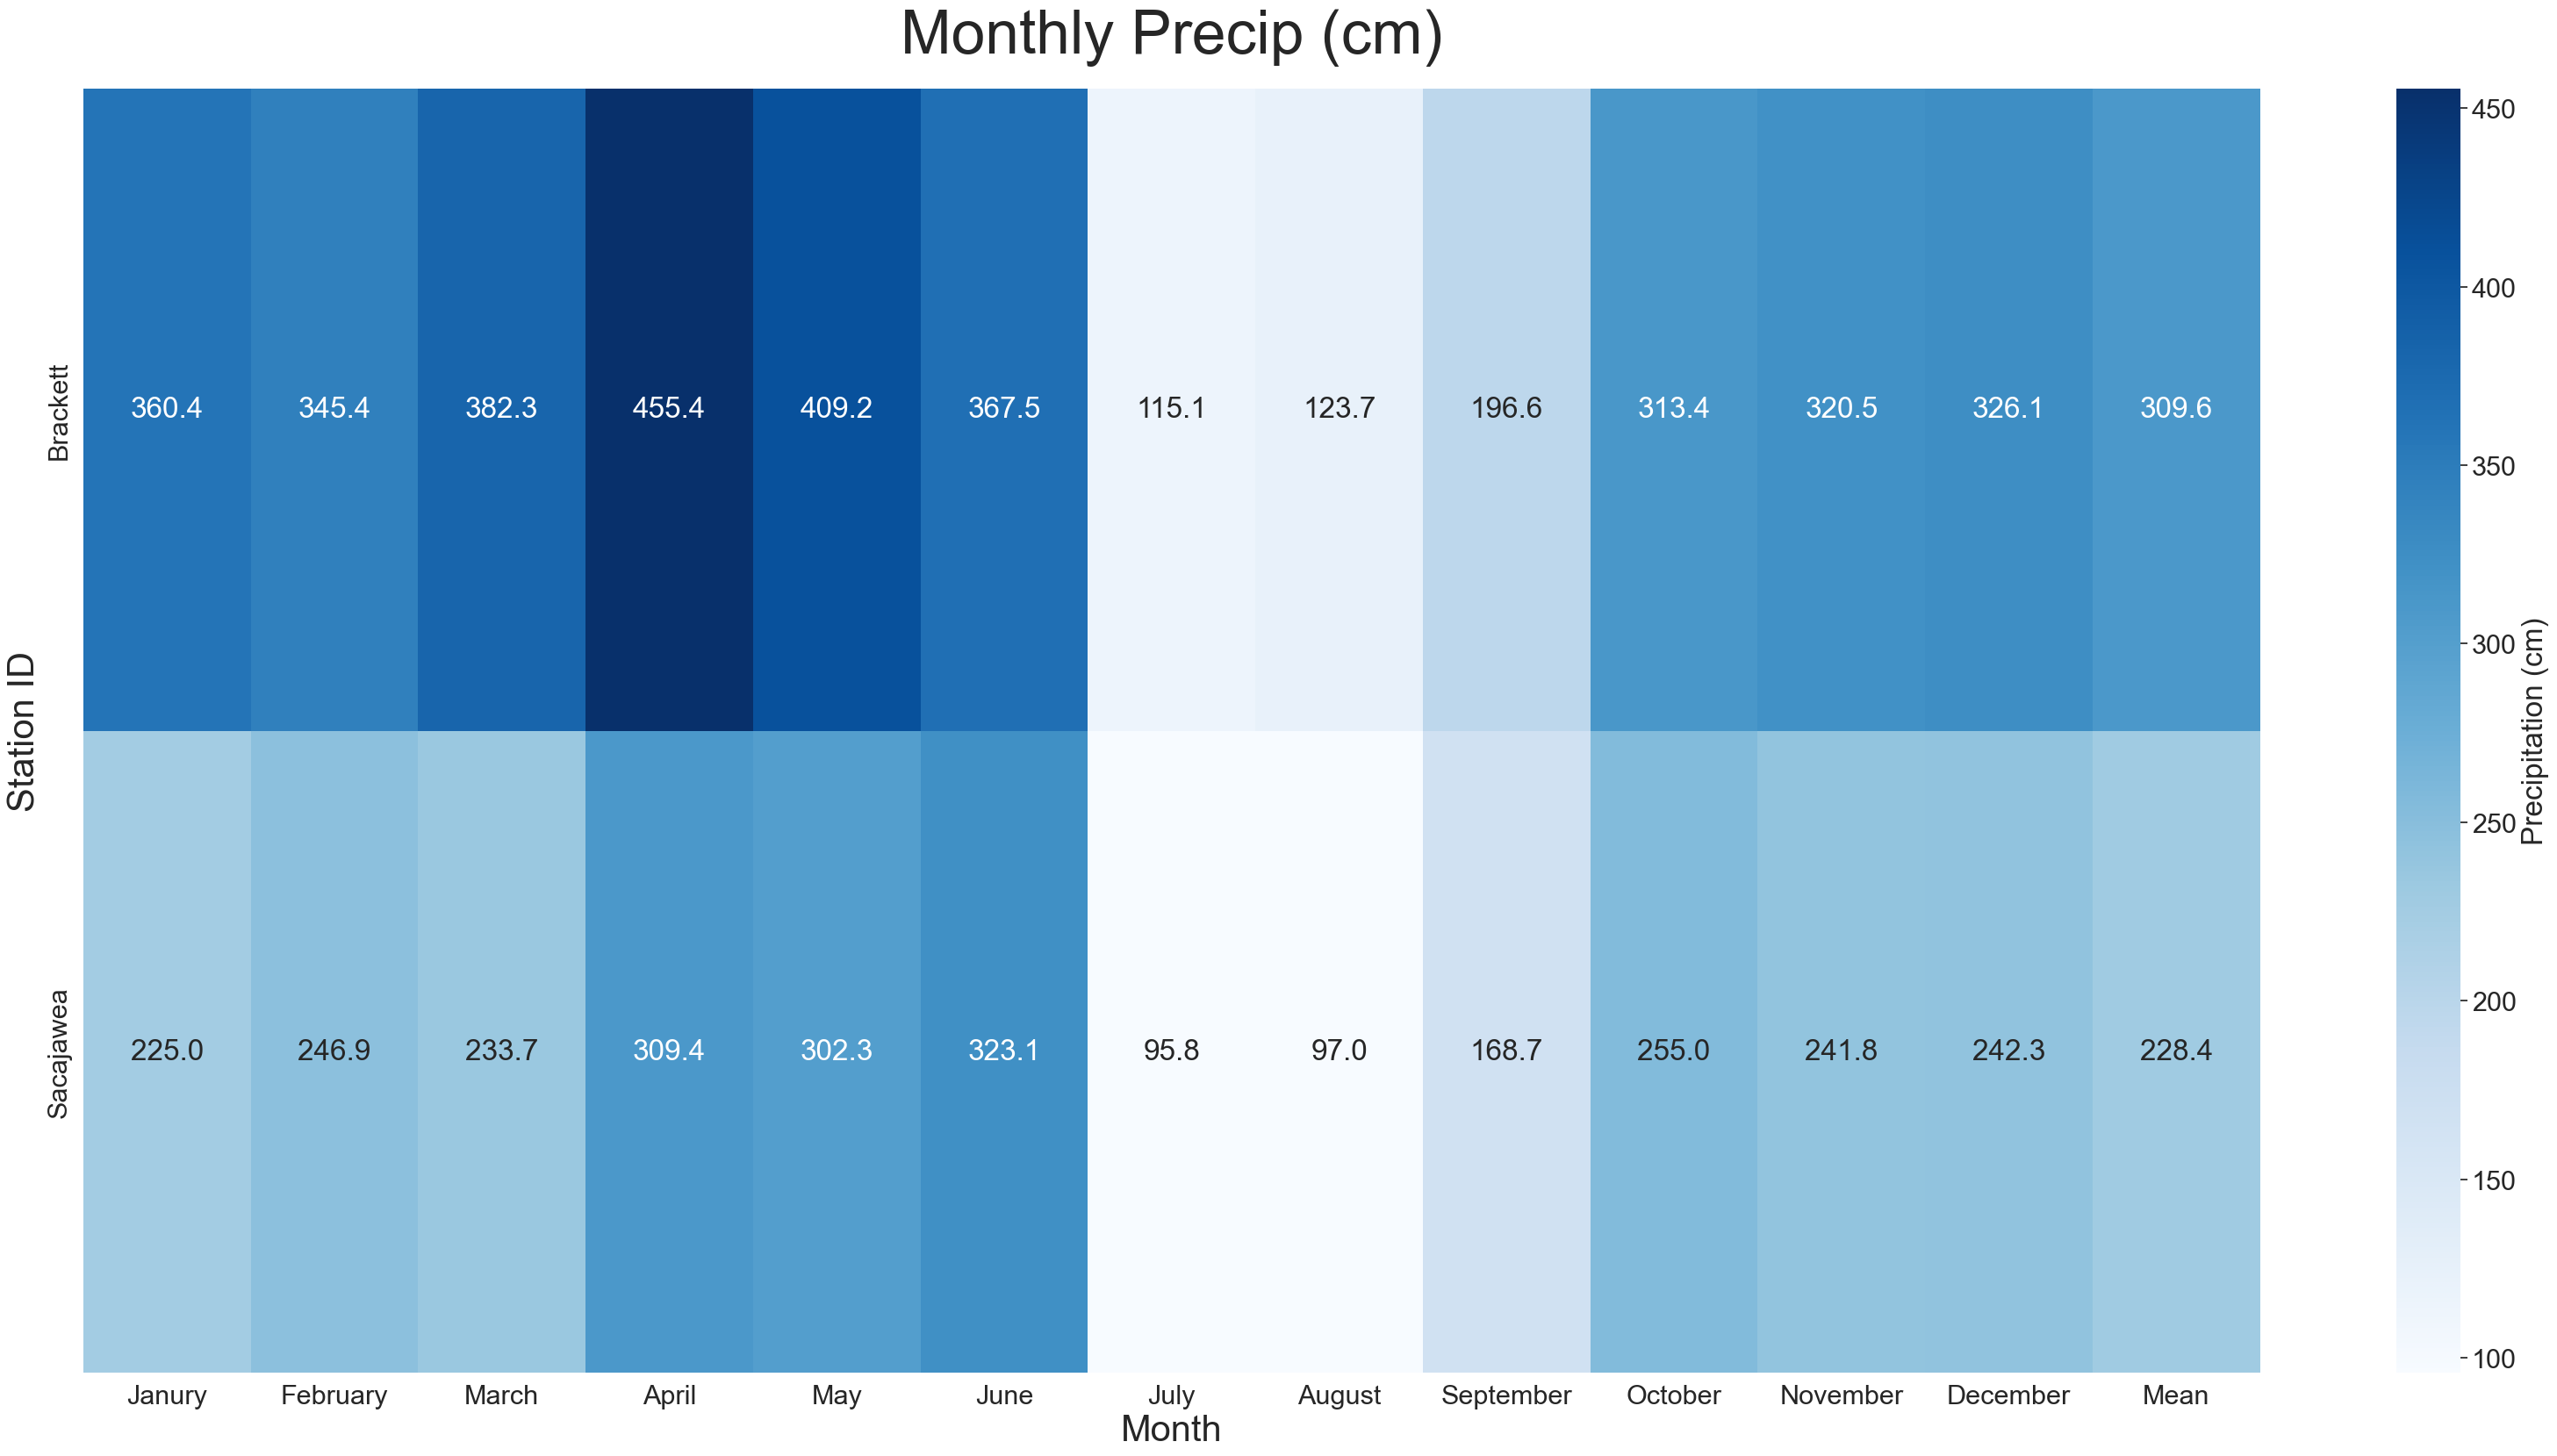

In [27]:
# Now plot the average monthly air temperature data
# Set image parameters
plt.figure(figsize = (40,19))
sns.set(font_scale=2)
# Set the plot title
# Plot for the monthly average precip
plt.title('Monthly Precip (cm)', fontsize = 50, pad = 30)

plot = sns.heatmap(monthly_avg_precip, annot=True, cmap='Blues', fmt= '.1f', cbar_kws = {'label':'Precipitation (cm)'})

plt.ylabel('Station ID', fontsize = 30)
plt.xlabel('Month', fontsize = 30)
# plt.savefig('/Users/f67f911/Desktop/Bridger_snotels/Figures/Avg_Monthly_Precip.png', bbox_inches='tight')

In [28]:
# 4. Now look at annual SWE
yearly_total_swe = pd.pivot_table(snotel_df,
                              values = 'Daily Water Equivalent (cm)',
                              index = 'station',
                              aggfunc=np.max,
                              columns='Year')
# Set the index by the station name
yearly_total_swe = yearly_total_swe.reindex(index = ['Brackett','Sacajawea'])
# # Create a new column for the mean values across all years!
yearly_total_swe['Mean'] = yearly_total_swe.mean(axis = 1)
yearly_total_swe = yearly_total_swe.drop([1994,1995,1996,1997,1998,1999], axis = 1)
yearly_total_swe

Year         2000    2001    2002    2003    2004    2005    2006    2007   
station                                                                     
Brackett   51.562  49.276  60.452  65.024  44.450  55.372  61.722  40.132  \
Sacajawea  35.306  35.052  32.258  44.704  33.782  34.798  41.148  24.130   

Year         2008    2009  ...    2014    2015    2016   2017    2018    2019   
station                    ...                                                  
Brackett   64.008  70.612  ...  75.184  60.198  52.578  62.23  75.438  71.628  \
Sacajawea  44.196  37.592  ...  58.166  34.036  35.814  29.21  61.722  45.974   

Year         2020    2021    2022       Mean  
station                                       
Brackett   62.484  55.118  44.958  59.882690  
Sacajawea  42.926  34.036  19.558  37.856583  

[2 rows x 24 columns]

Text(0.5, 162.24999999999997, 'Year')

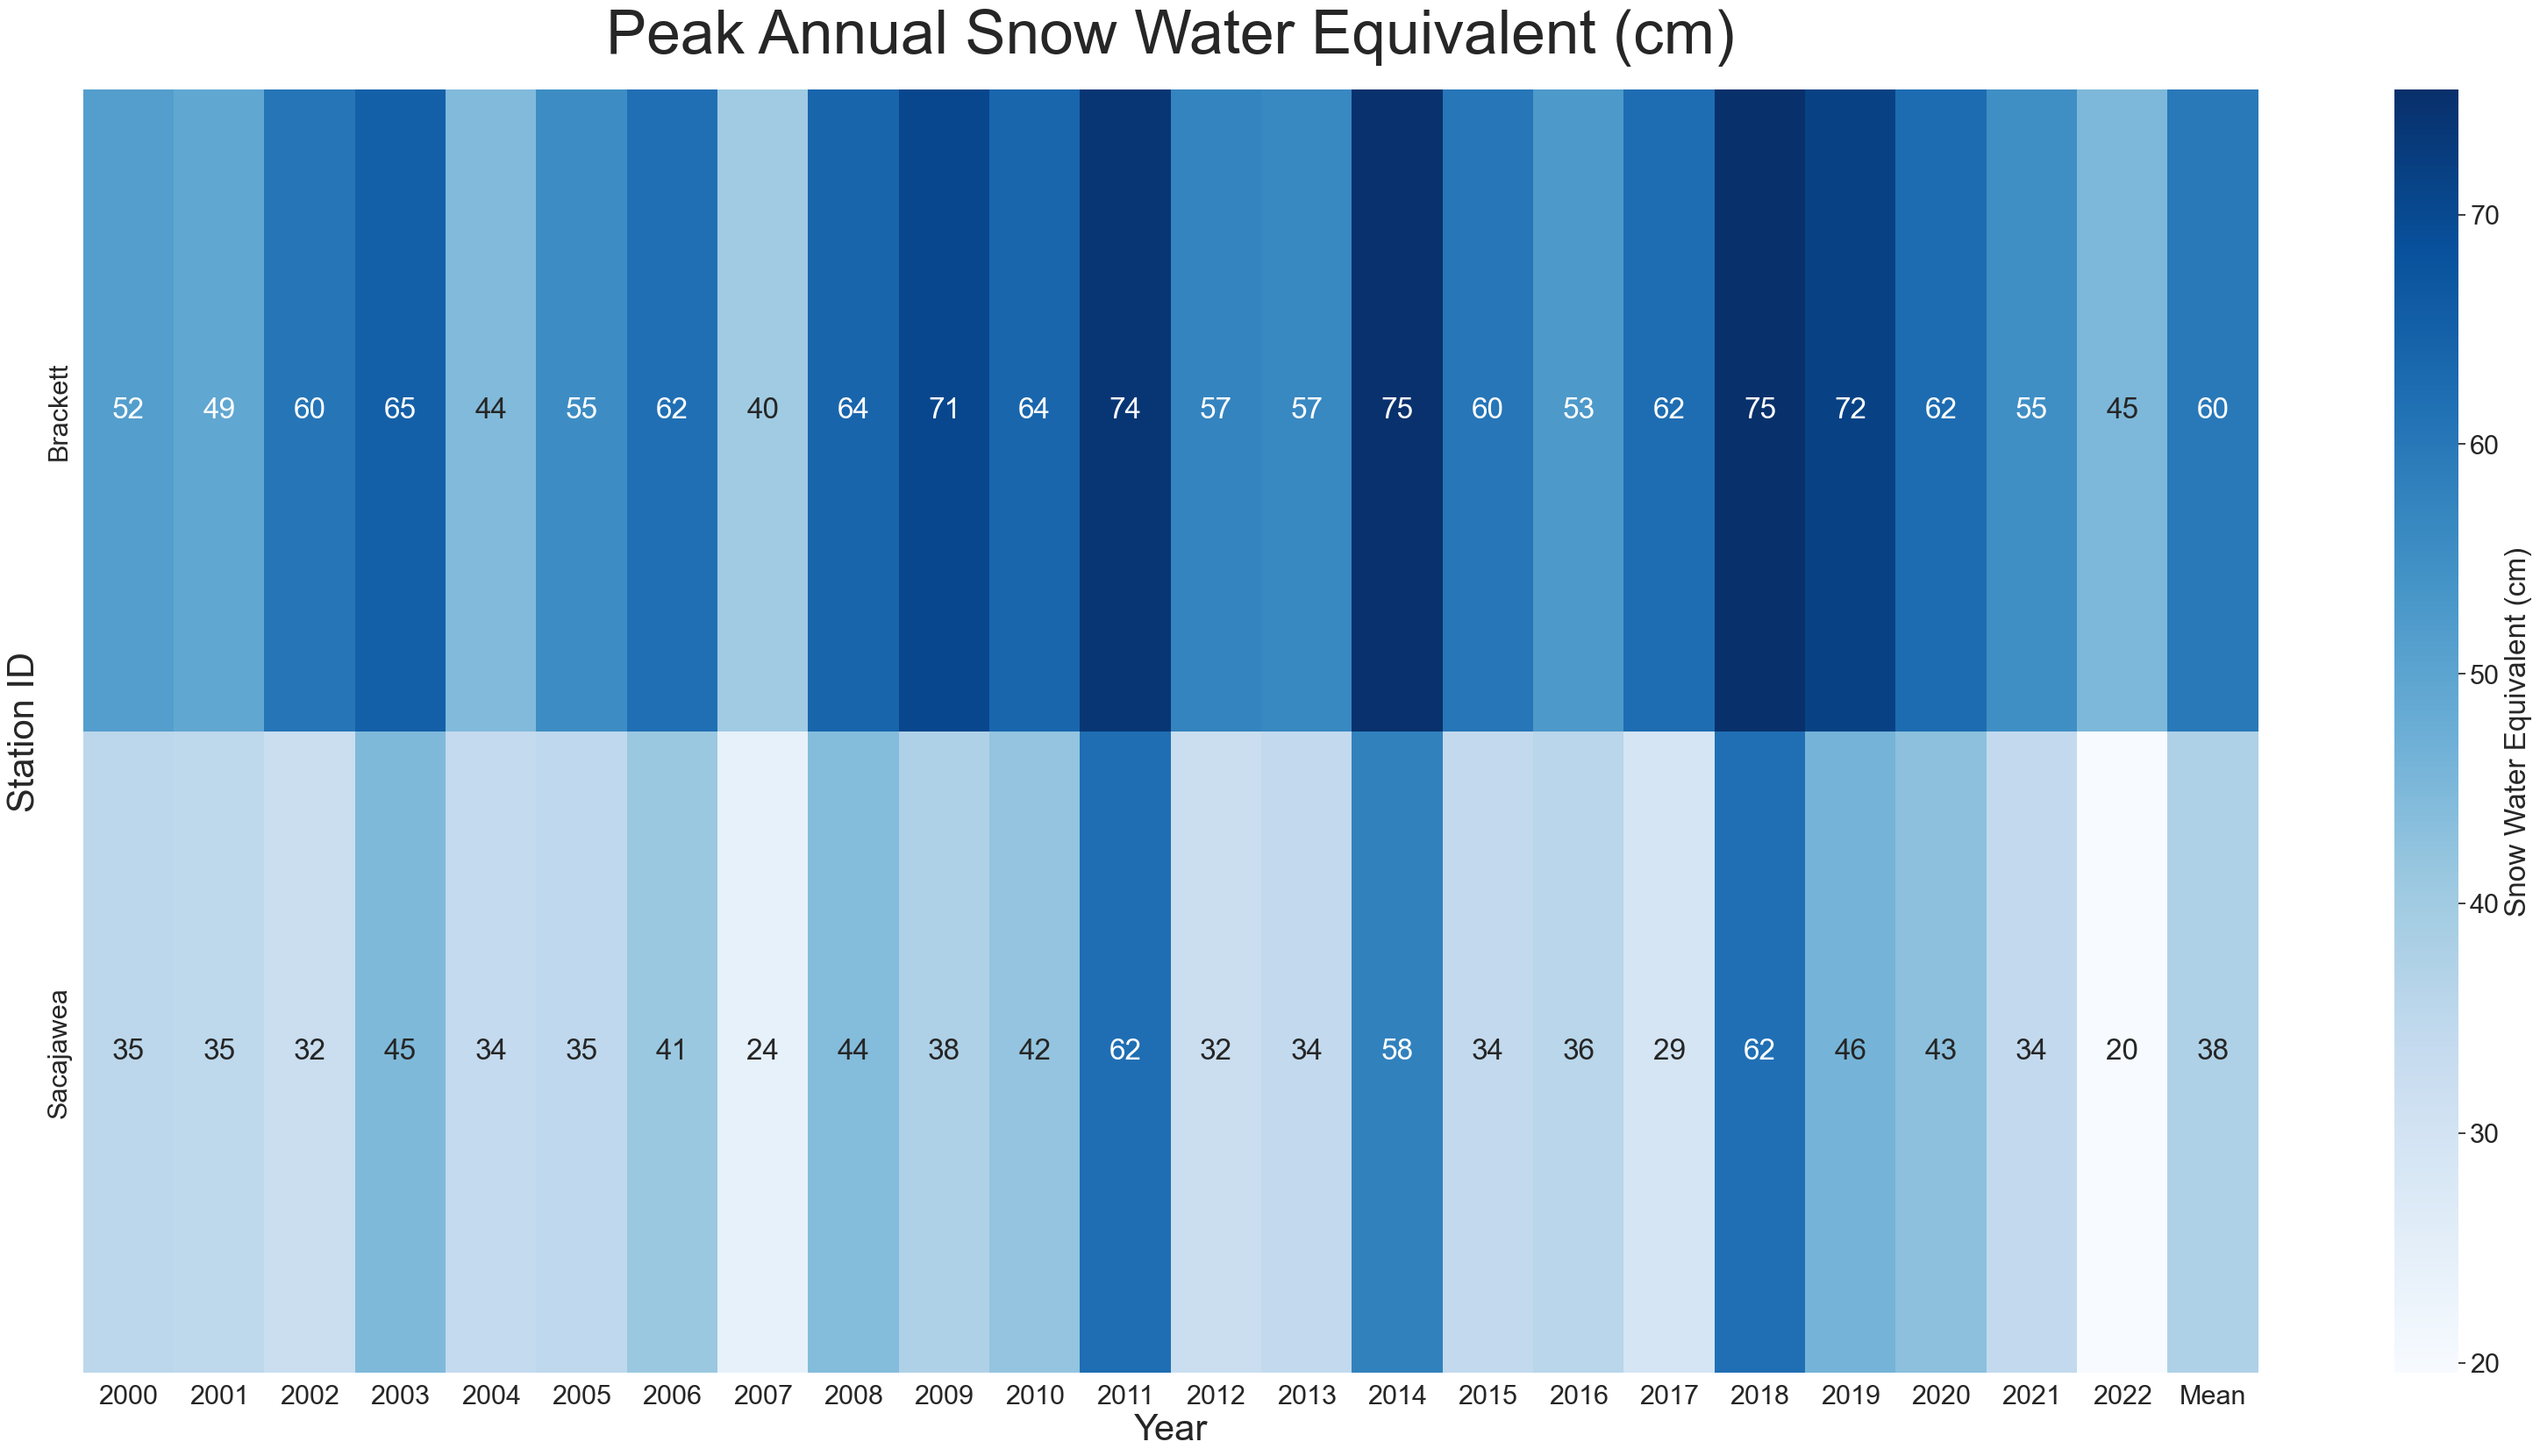

In [29]:
# Now plot the average annual precipitation 
# Set image parameters
plt.figure(figsize = (40,19))
sns.set(font_scale=2)
# Set the plot title
#  
plt.title('Peak Annual Snow Water Equivalent (cm)', fontsize = 50, pad = 30)

plot = sns.heatmap(yearly_total_swe, annot=True, cmap='Blues', fmt= '.2g', cbar_kws = {'label':'Snow Water Equivalent (cm)'})

plt.ylabel('Station ID', fontsize = 30)
plt.xlabel('Year', fontsize = 30)
# plt.savefig('/Users/f67f911/Desktop/Bridger_snotels/Figures/Annual_Adjusted_Precip.png', bbox_inches='tight')

In [30]:
# 5. Let's make a few plots just for appearances solely. Let's look at annual average DOY snow depth data
# Create a new dataframe to hold the average DOY values for each station
avg_snowdepth_snotel_daily = snotel_df.groupby(['DOY','station']).agg({'Daily Snow Depth (cm)':['mean']})
avg_snowdepth_snotel_daily.columns = ['avg_snowdepth']
# Reset the index of the new dataframe
avg_snowdepth_snotel_daily = avg_snowdepth_snotel_daily.reset_index()
# Check to make sure the dataframe has been updated 
avg_snowdepth_snotel_daily

DOY    station  avg_snowdepth
0    01-01   Brackett         86.614
1    01-01  Sacajawea         59.563
2    01-02   Brackett         86.614
3    01-02  Sacajawea         59.690
4    01-03   Brackett         86.233
..     ...        ...            ...
727  12-29  Sacajawea         53.975
728  12-30   Brackett         82.931
729  12-30  Sacajawea         57.023
730  12-31   Brackett         85.725
731  12-31  Sacajawea         59.182

[732 rows x 3 columns]

In [31]:
doy_snowDepth = pd.pivot_table(avg_snowdepth_snotel_daily,
                          values='avg_snowdepth',
                          index='station',
                          columns='DOY')
# Set the index by the station name
doy_snowDepth = doy_snowDepth.reindex(index = ['Brackett','Sacajawea'])
# Create a new column for the mean values across all years!
doy_snowDepth

DOY         01-01   01-02   01-03   01-04   01-05   01-06   01-07   01-08   
station                                                                     
Brackett   86.614  86.614  86.233  85.598  88.392  90.170  90.678  91.567  \
Sacajawea  59.563  59.690  59.690  59.436  61.341  62.103  62.865  63.246   

DOY         01-09   01-10  ...   12-22   12-23   12-24   12-25   12-26   
station                    ...                                           
Brackett   91.186  93.218  ...  69.723  72.390  72.263  73.025  74.930  \
Sacajawea  63.754  64.262  ...  45.847  48.006  46.863  47.244  49.657   

DOY         12-27   12-28   12-29   12-30   12-31  
station                                            
Brackett   76.200  77.216  79.121  82.931  85.725  
Sacajawea  51.054  52.959  53.975  57.023  59.182  

[2 rows x 296 columns]

Text(0.5, 162.24999999999997, 'Day of Year')

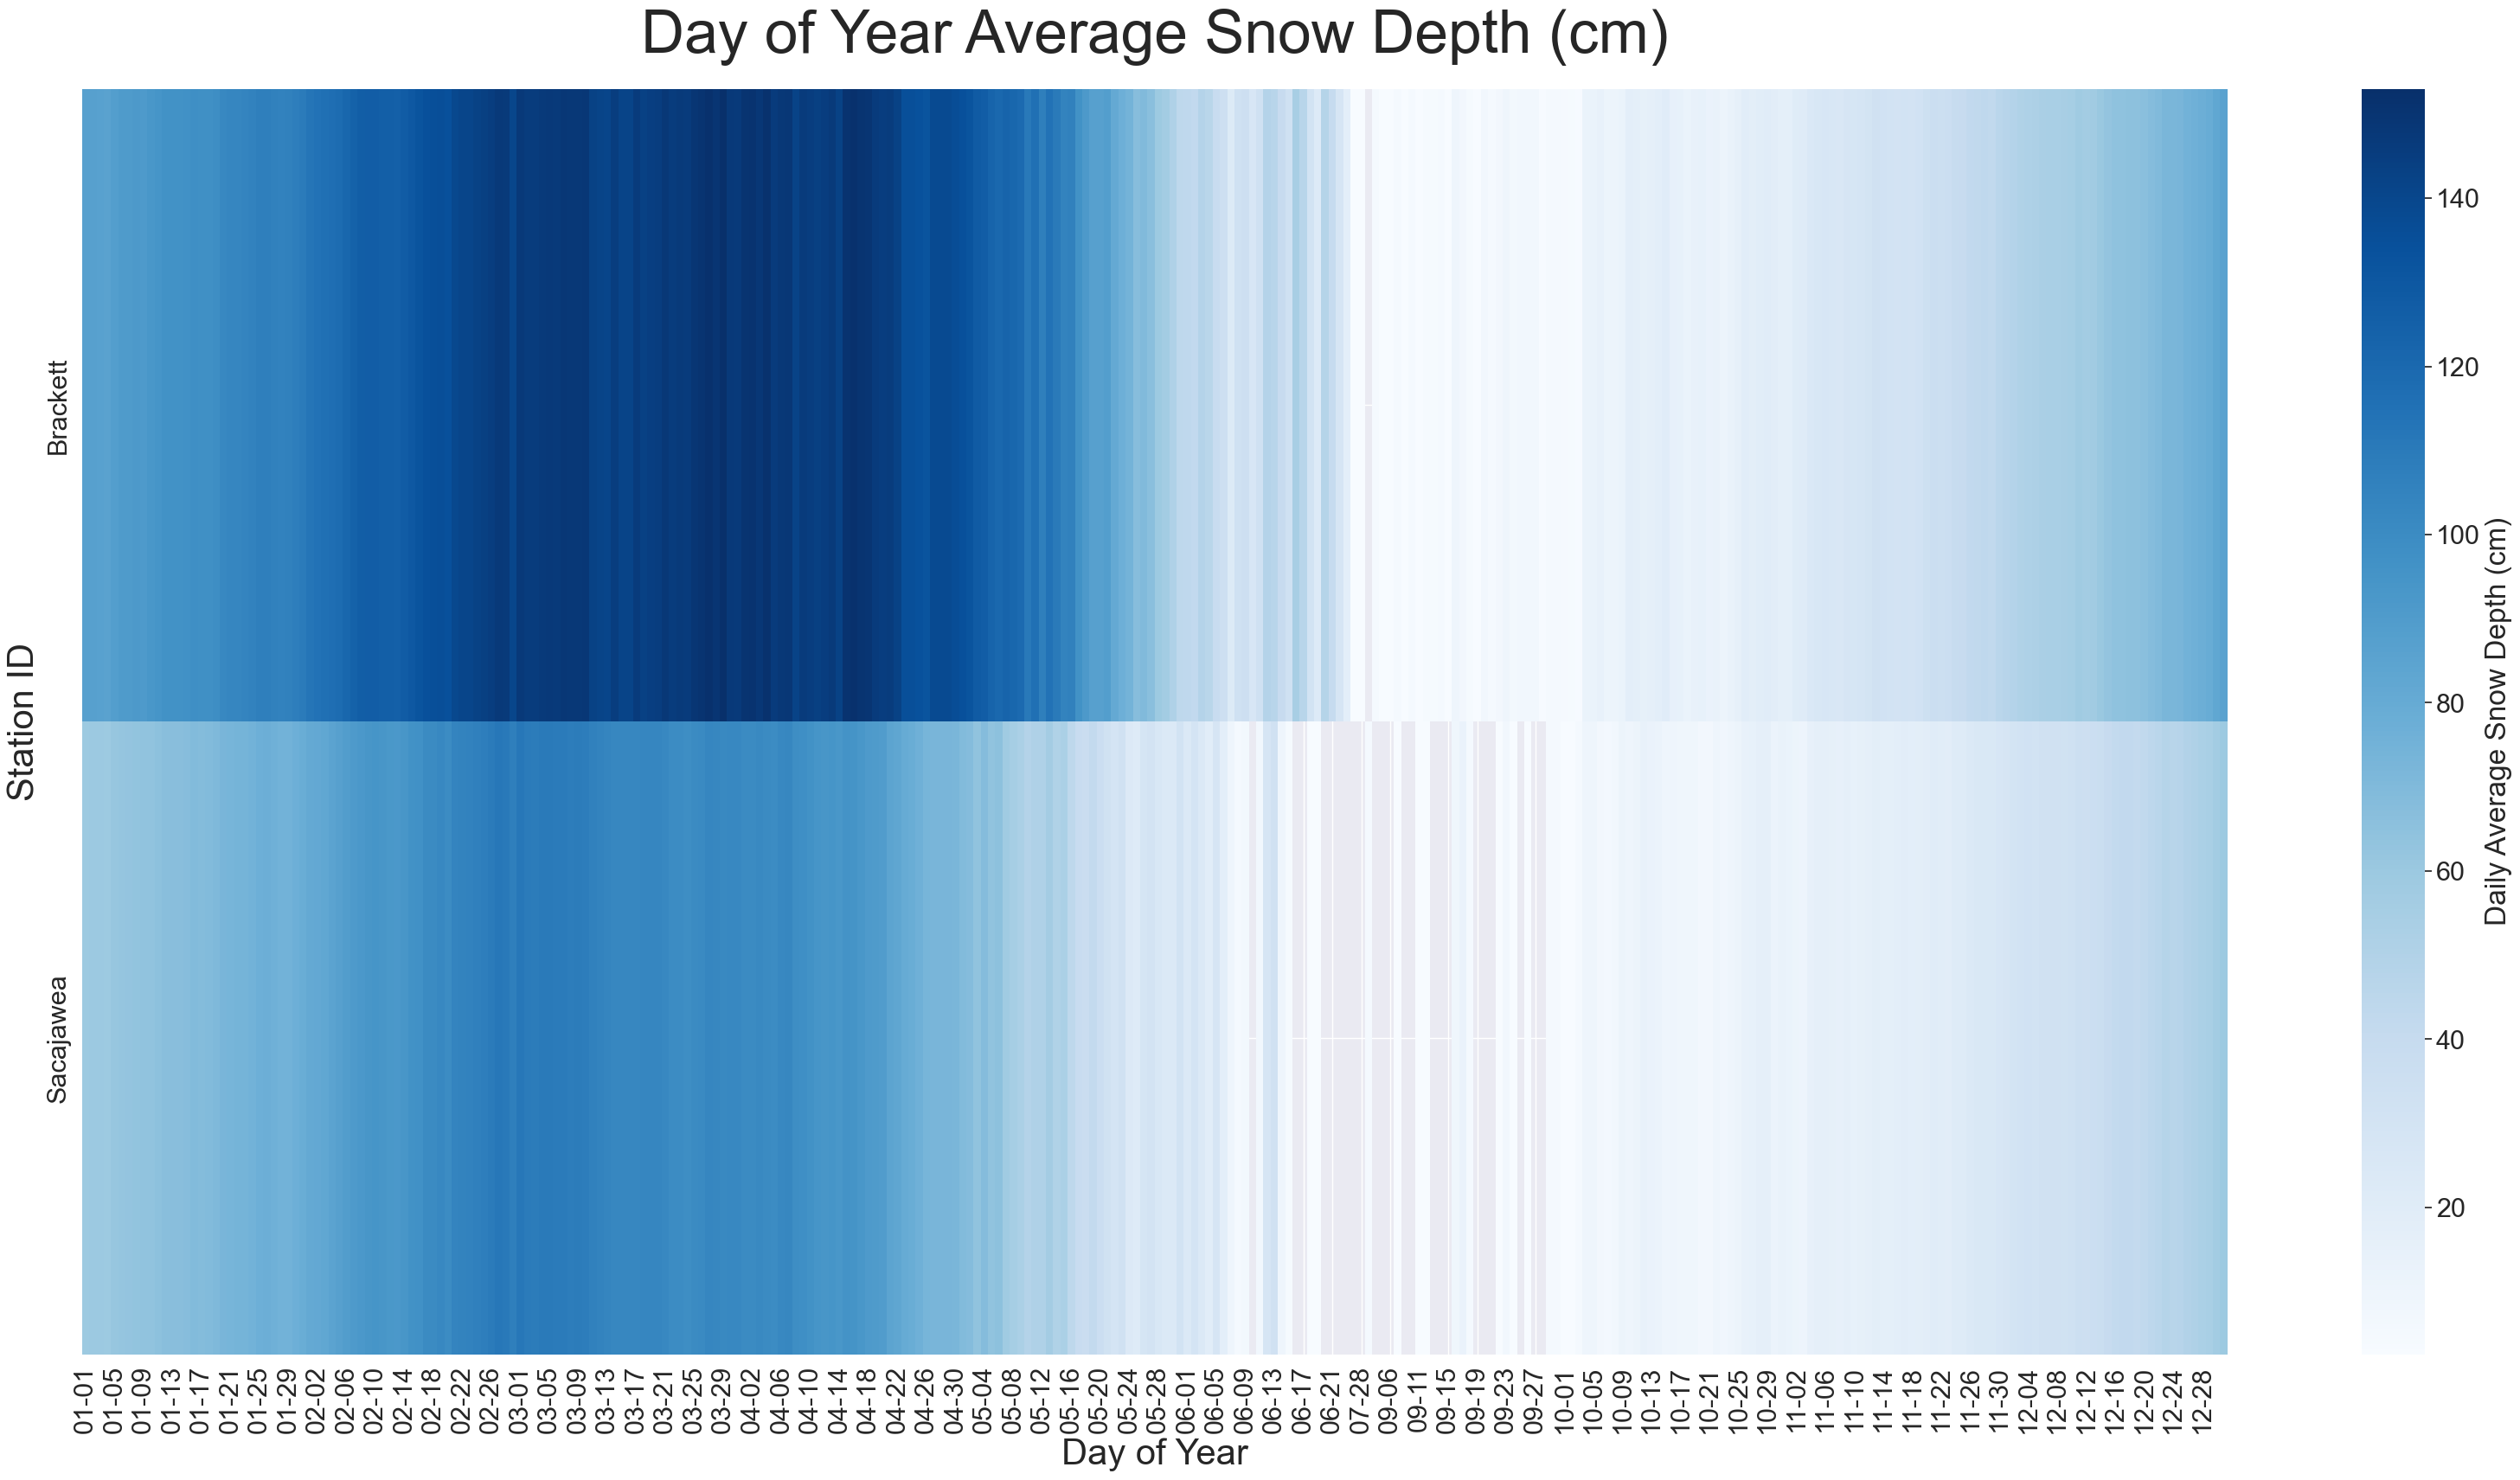

In [32]:
# Set image parameters
plt.figure(figsize = (40,19))
sns.set(font_scale=2)
# Set the plot title
plt.title('Day of Year Average Snow Depth (cm)', fontsize = 50, pad = 30)
avg_fSCA_heat = sns.heatmap(doy_snowDepth, annot=False, cmap='Blues', cbar_kws = {'label':'Daily Average Snow Depth (cm)'})

plt.ylabel('Station ID', fontsize = 30)
plt.xlabel('Day of Year', fontsize = 30)

# plt.savefig('/Users/f67f911/Desktop/Bridger_snotels/Figures/AvgSnowDepth_DOY.png', bbox_inches='tight')

In [33]:
# 6. Do the same as above but for SWE
# Create a new dataframe to hold the average DOY values for each station
avg_swe_snotel_daily = snotel_df.groupby(['DOY','station']).agg({'Daily Water Equivalent (cm)':['mean']})
avg_swe_snotel_daily.columns = ['avg_swe']
# Reset the index of the new dataframe
avg_swe_snotel_daily = avg_swe_snotel_daily.reset_index()
# Check to make sure the dataframe has been updated 
avg_swe_snotel_daily

DOY    station    avg_swe
0    01-01   Brackett  21.381357
1    01-01  Sacajawea  13.881652
2    01-02   Brackett  21.825857
3    01-02  Sacajawea  14.102522
4    01-03   Brackett  22.152429
..     ...        ...        ...
727  12-29  Sacajawea  12.644783
728  12-30   Brackett  20.265571
729  12-30  Sacajawea  13.064435
730  12-31   Brackett  20.909643
731  12-31  Sacajawea  13.583478

[732 rows x 3 columns]

In [34]:
doy_swe = pd.pivot_table(avg_swe_snotel_daily,
                          values='avg_swe',
                          index='station',
                          columns='DOY')
# Set the index by the station name
doy_swe = doy_swe.reindex(index = ['Brackett','Sacajawea'])
# Create a new column for the mean values across all years!
doy_swe

DOY            01-01      01-02      01-03      01-04      01-05      01-06   
station                                                                       
Brackett   21.381357  21.825857  22.152429  22.388286  22.787429  23.431500  \
Sacajawea  13.881652  14.102522  14.422783  14.577391  14.919739  15.228957   

DOY            01-07      01-08      01-09      01-10  ...      12-22   
station                                                ...              
Brackett   23.830643  24.384000  24.619857  25.127857  ...  17.535071  \
Sacajawea  15.449826  15.692783  15.847391  16.112435  ...  10.944087   

DOY            12-23      12-24     12-25      12-26      12-27      12-28   
station                                                                      
Brackett   17.925143  18.206357  18.47850  18.768786  19.086286  19.349357  \
Sacajawea  11.297478  11.485217  11.71713  11.949043  12.136783  12.390783   

DOY            12-29      12-30      12-31  
station                                     
Brackett   19.648714  20.265571  20.909643  
Sacajawea  12.644783  13.064435  13.583478  

[2 rows x 298 columns]

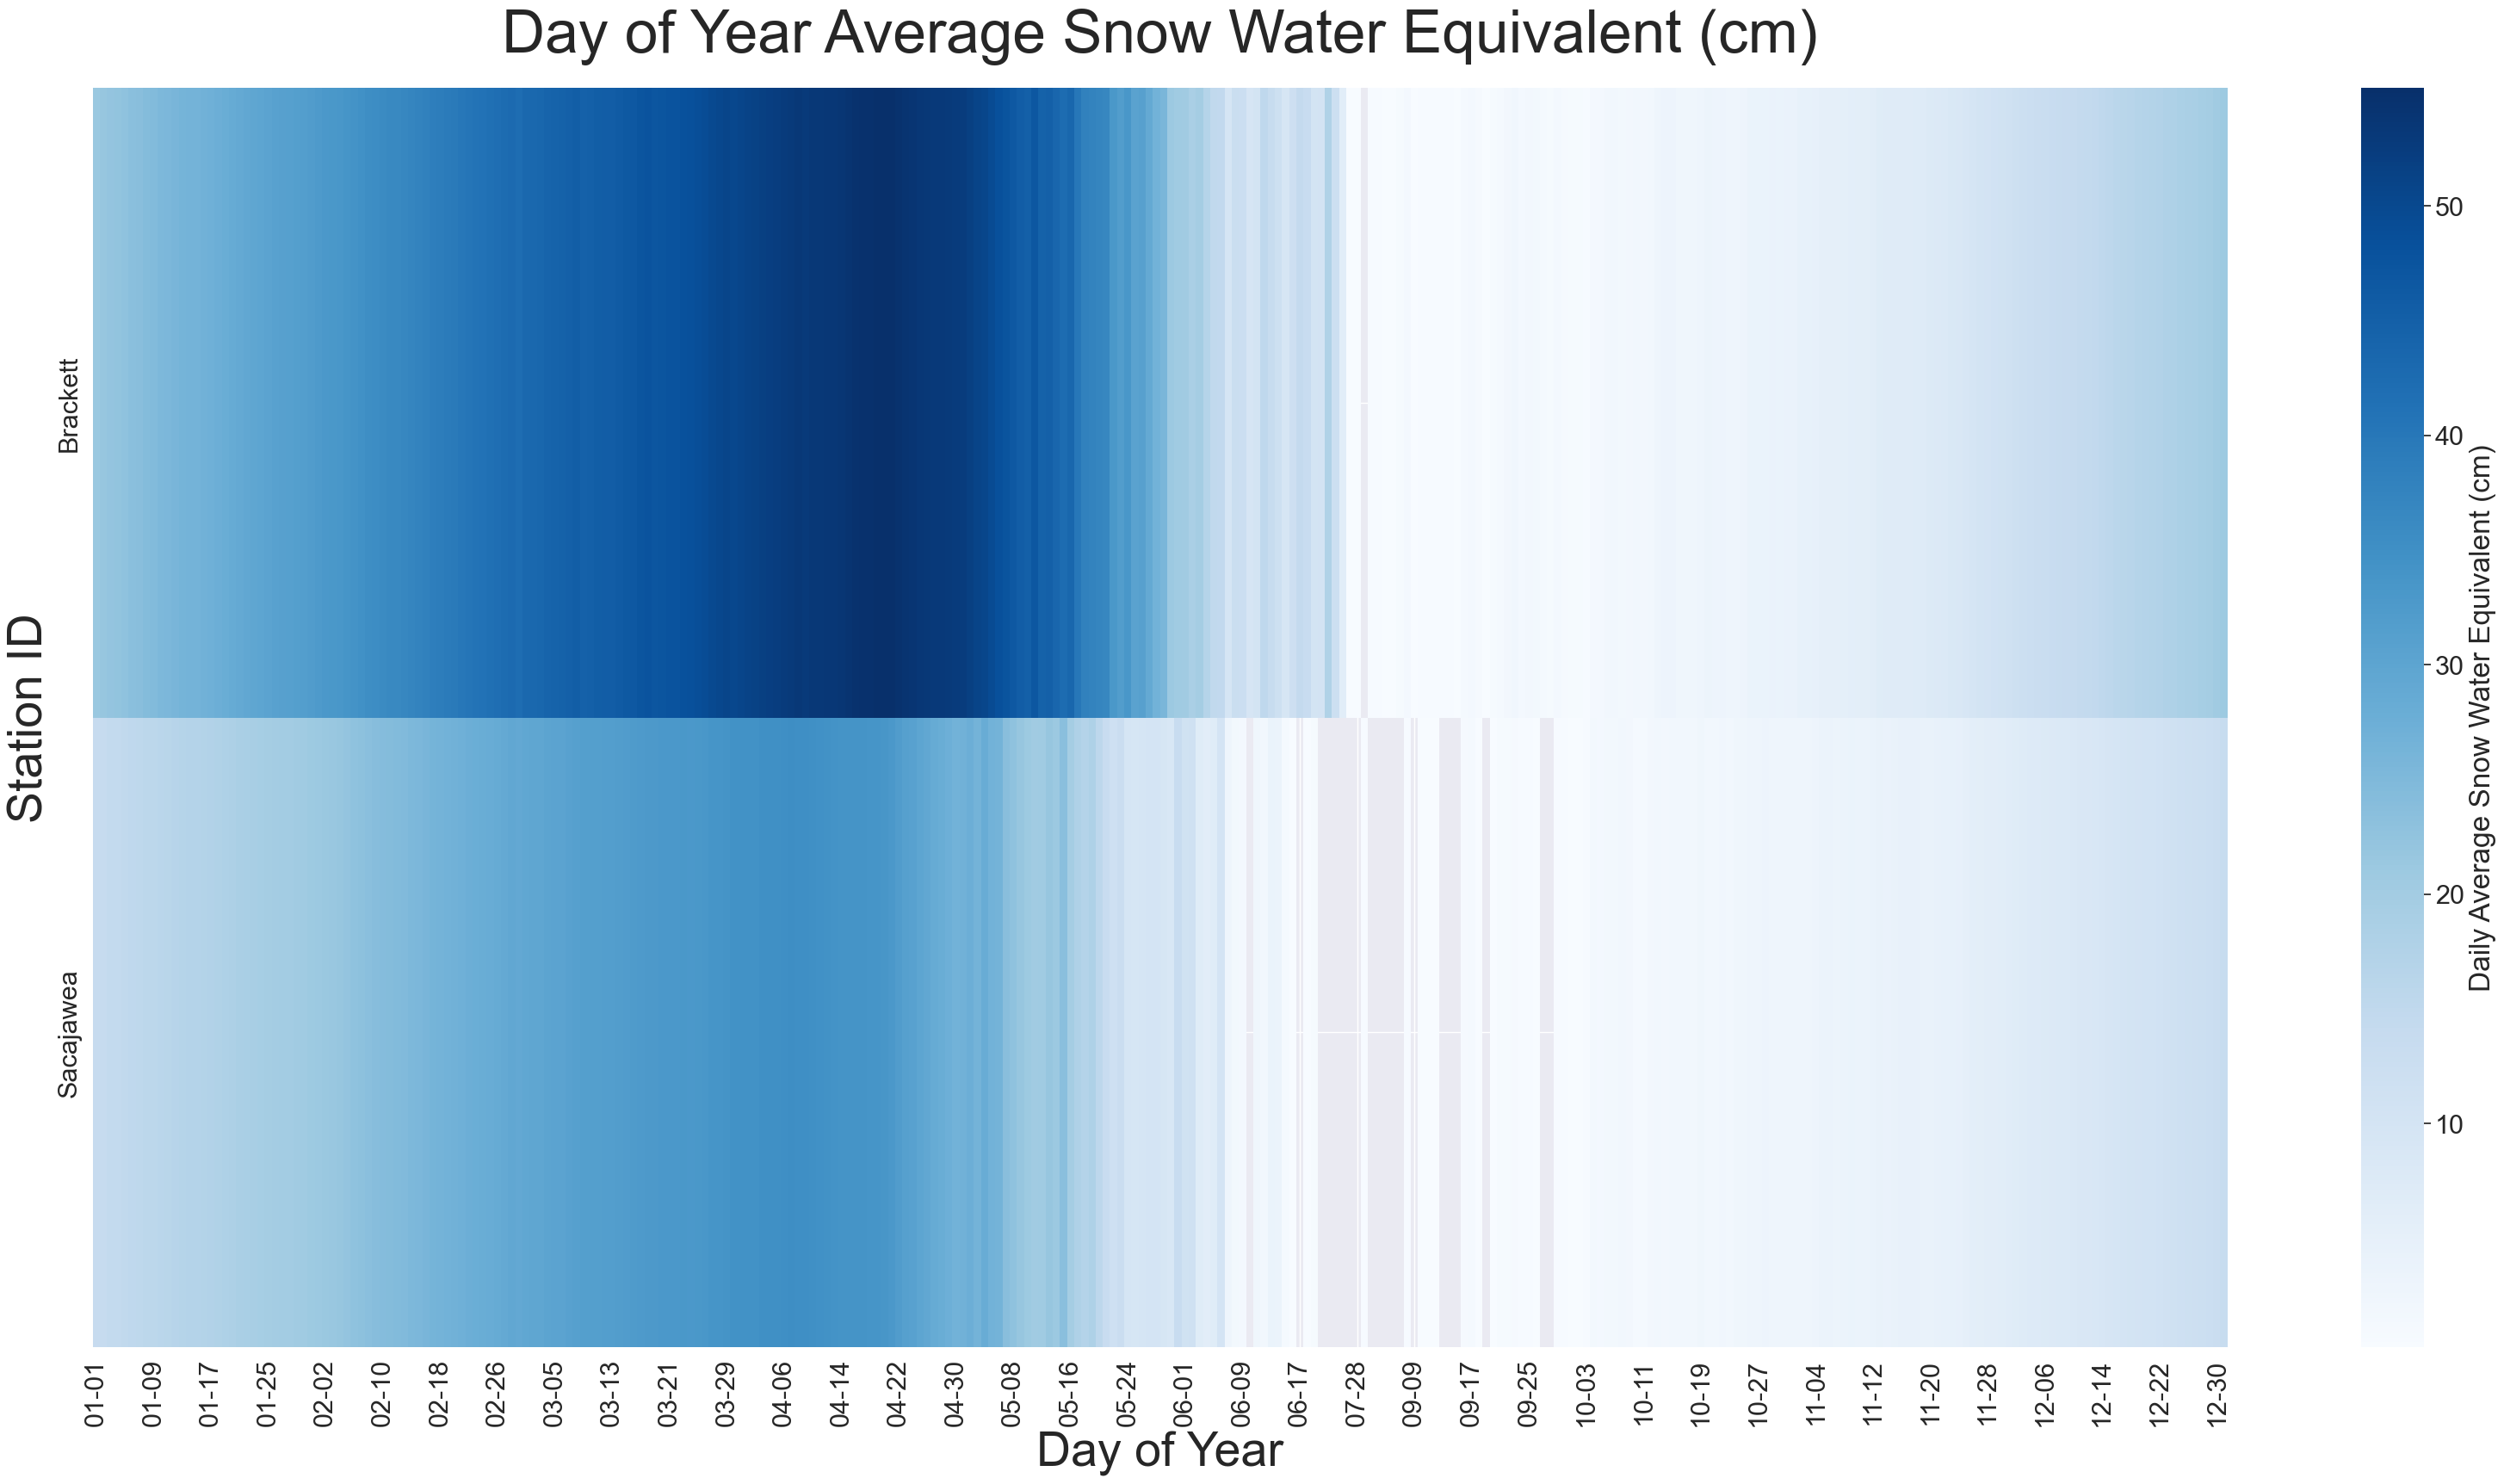

In [35]:
# Set image parameters
plt.figure(figsize = (40,19))
sns.set(font_scale=2)
# Set the plot title
plt.title('Day of Year Average Snow Water Equivalent (cm)', fontsize = 50, pad = 30)
ax = avg_fSCA_heat = sns.heatmap(doy_swe, annot=False, cmap='Blues', cbar_kws = {'label':'Daily Average Snow Water Equivalent (cm)'})

plt.ylabel('Station ID', fontsize = 40)
plt.xlabel('Day of Year', fontsize = 40)

ax.set_xticks(ax.get_xticks()[::2])
# plt.xlim(0,52)

# plt.savefig('/Users/f67f911/Desktop/Bridger_snotels/Figures/DOY_AverageSWE.png', bbox_inches='tight')

In [36]:
# 7. Do the same for air temperature 
# Create a new dataframe to hold the average DOY values for each station
avg_airtemp_snotel_daily = snotel_df.groupby(['DOY','station']).agg({'Daily Average Temp (C)':['mean']})
avg_airtemp_snotel_daily.columns = ['avg_temp']
# Reset the index of the new dataframe
avg_airtemp_snotel_daily = avg_airtemp_snotel_daily.reset_index()
# Check to make sure the dataframe has been updated 
avg_airtemp_snotel_daily

DOY    station  avg_temp
0    01-01   Brackett -5.371429
1    01-01  Sacajawea -5.739130
2    01-02   Brackett -3.764286
3    01-02  Sacajawea -2.952174
4    01-03   Brackett -4.014286
..     ...        ...       ...
727  12-29  Sacajawea -5.404348
728  12-30   Brackett -6.135714
729  12-30  Sacajawea -6.239130
730  12-31   Brackett -6.264286
731  12-31  Sacajawea -6.456522

[732 rows x 3 columns]

In [37]:
doy_temp = pd.pivot_table(avg_airtemp_snotel_daily,
                          values='avg_temp',
                          index='station',
                          columns='DOY')
# Set the index by the station name
doy_temp = doy_temp.reindex(index = ['Brackett','Sacajawea'])
# Create a new column for the mean values across all years!
doy_temp

DOY           01-01     01-02     01-03     01-04     01-05     01-06   
station                                                                 
Brackett  -5.371429 -3.764286 -4.014286 -5.153571 -5.764286 -4.196429  \
Sacajawea -5.739130 -2.952174 -2.908696 -3.443478 -4.413043 -2.665217   

DOY           01-07     01-08     01-09     01-10  ...     12-22     12-23   
station                                            ...                       
Brackett  -2.782143 -3.042857 -3.439286 -4.760714  ... -5.446429 -5.178571  \
Sacajawea -2.182609 -1.786957 -2.278261 -3.091304  ... -3.552174 -4.465217   

DOY           12-24     12-25     12-26     12-27     12-28     12-29   
station                                                                 
Brackett  -4.446429 -4.492857 -4.389286 -4.150000 -4.632143 -5.339286  \
Sacajawea -3.352174 -4.191304 -4.386957 -3.608696 -4.069565 -5.404348   

DOY           12-30     12-31  
station                        
Brackett  -6.135714 -6.264286  
Sacajawea -6.239130 -6.456522  

[2 rows x 366 columns]

Text(0.5, 162.24999999999997, 'Day of Year')

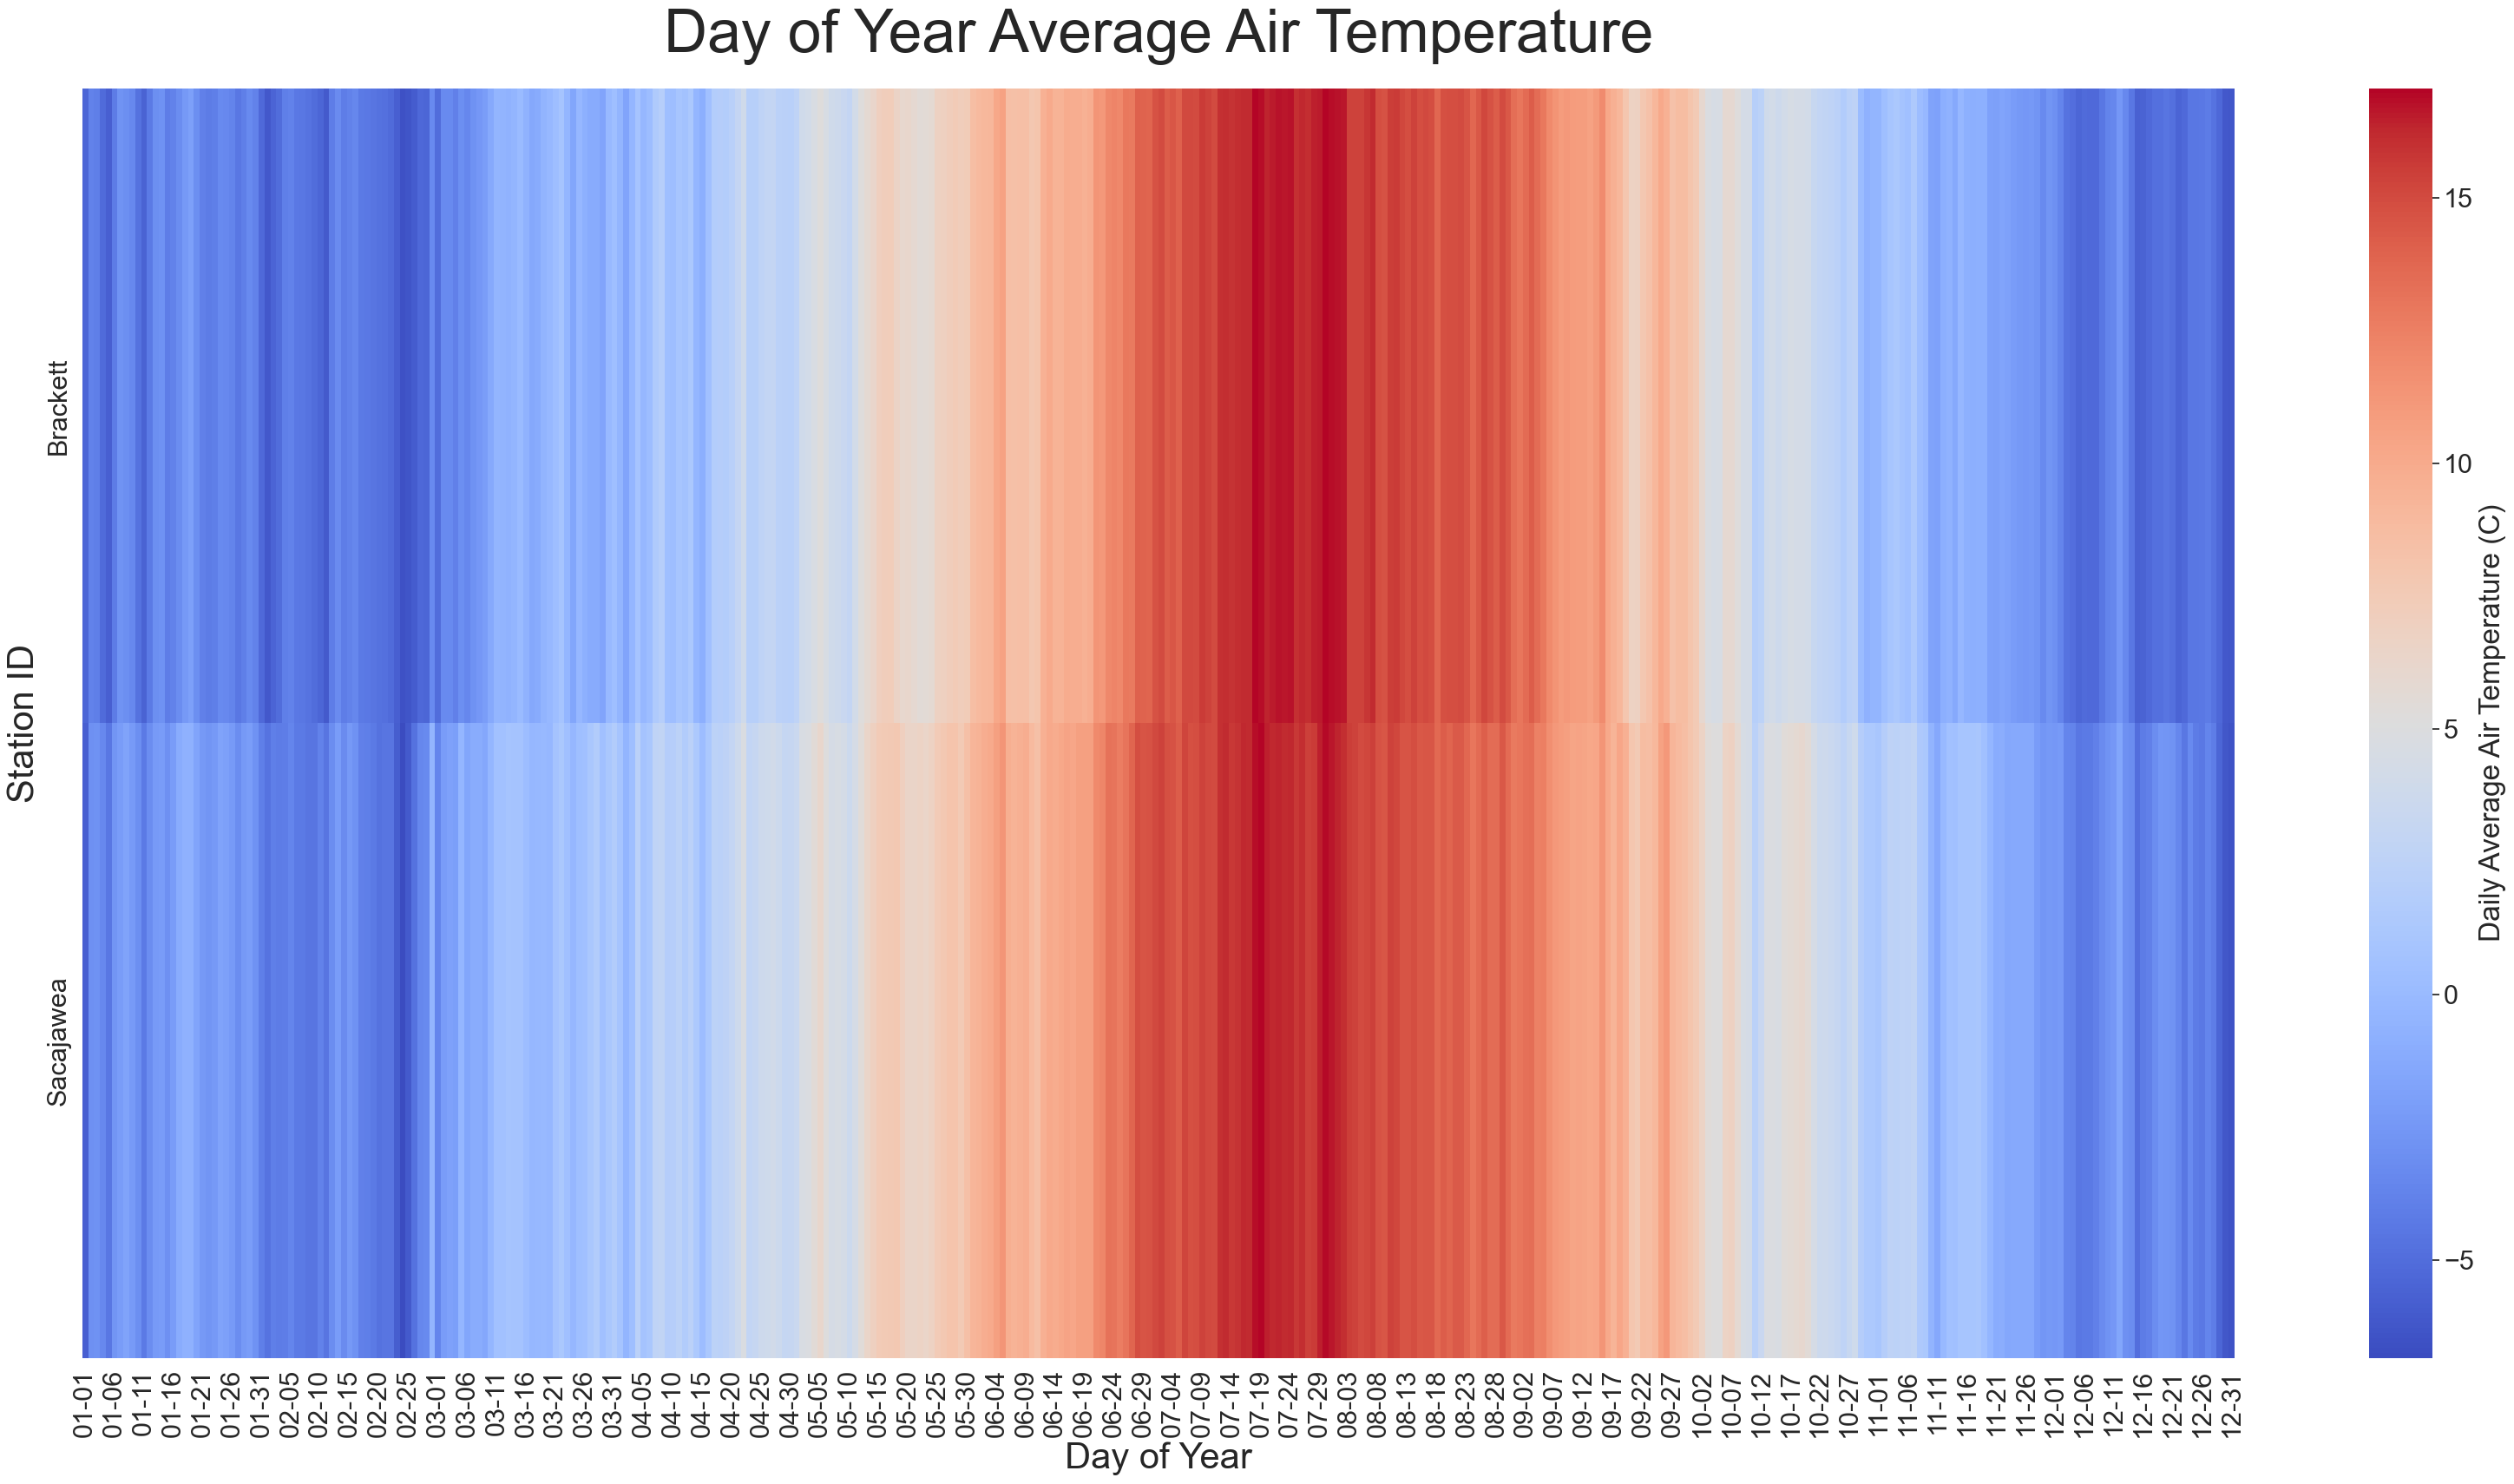

In [38]:
# Set image parameters
plt.figure(figsize = (40,19))
sns.set(font_scale=2)
# Set the plot title
plt.title('Day of Year Average Air Temperature', fontsize = 50, pad = 30)
avg_fSCA_heat = sns.heatmap(doy_temp, annot=False, cmap='coolwarm', cbar_kws = {'label':'Daily Average Air Temperature (C)'})

plt.ylabel('Station ID', fontsize = 30)
plt.xlabel('Day of Year', fontsize = 30)

# plt.savefig('/Users/f67f911/Desktop/Bridger_snotels/Figures/DOY_AvgAirTemp.png', bbox_inches='tight')

In [39]:
# 8. Lastly, let's look at precipitation trends for the two sites
# Create a new dataframe to hold the average DOY values for each station
avg_precip_snotel_daily = snotel_df.groupby(['DOY','station']).agg({'Daily Precipitation (cm)':['mean']})
avg_precip_snotel_daily.columns = ['avg_precip']
# Reset the index of the new dataframe
avg_precip_snotel_daily = avg_precip_snotel_daily.reset_index()
# Check to make sure the dataframe has been updated 
avg_precip_snotel_daily

DOY    station  avg_precip
0    01-01   Brackett    0.462643
1    01-01  Sacajawea    0.276087
2    01-02   Brackett    0.353786
3    01-02  Sacajawea    0.430696
4    01-03   Brackett    0.317500
..     ...        ...         ...
727  12-29  Sacajawea    0.552174
728  12-30   Brackett    0.689429
729  12-30  Sacajawea    0.695739
730  12-31   Brackett    0.553357
731  12-31  Sacajawea    0.353391

[732 rows x 3 columns]

In [40]:
doy_precip = pd.pivot_table(avg_precip_snotel_daily,
                          values='avg_precip',
                          index='station',
                          columns='DOY')
# Set the index by the station name
doy_precip = doy_precip.reindex(index = ['Brackett','Sacajawea'])
# Create a new column for the mean values across all years!
doy_precip

DOY           01-01     01-02     01-03     01-04     01-05     01-06   
station                                                                 
Brackett   0.462643  0.353786  0.317500  0.444500  0.698500  0.453571  \
Sacajawea  0.276087  0.430696  0.265043  0.353391  0.419652  0.331304   

DOY           01-07     01-08     01-09     01-10  ...     12-22     12-23   
station                                            ...                       
Brackett   0.553357  0.335643  0.517071  0.344714  ...  0.426357  0.308429  \
Sacajawea  0.287130  0.231913  0.386522  0.287130  ...  0.474870  0.276087   

DOY           12-24     12-25     12-26     12-27     12-28     12-29   
station                                                                 
Brackett   0.326571  0.317500  0.362857  0.362857  0.344714  0.644071  \
Sacajawea  0.320261  0.342348  0.220870  0.298174  0.375478  0.552174   

DOY           12-30     12-31  
station                        
Brackett   0.689429  0.553357  
Sacajawea  0.695739  0.353391  

[2 rows x 366 columns]

Text(0.5, 162.24999999999997, 'Day of Year')

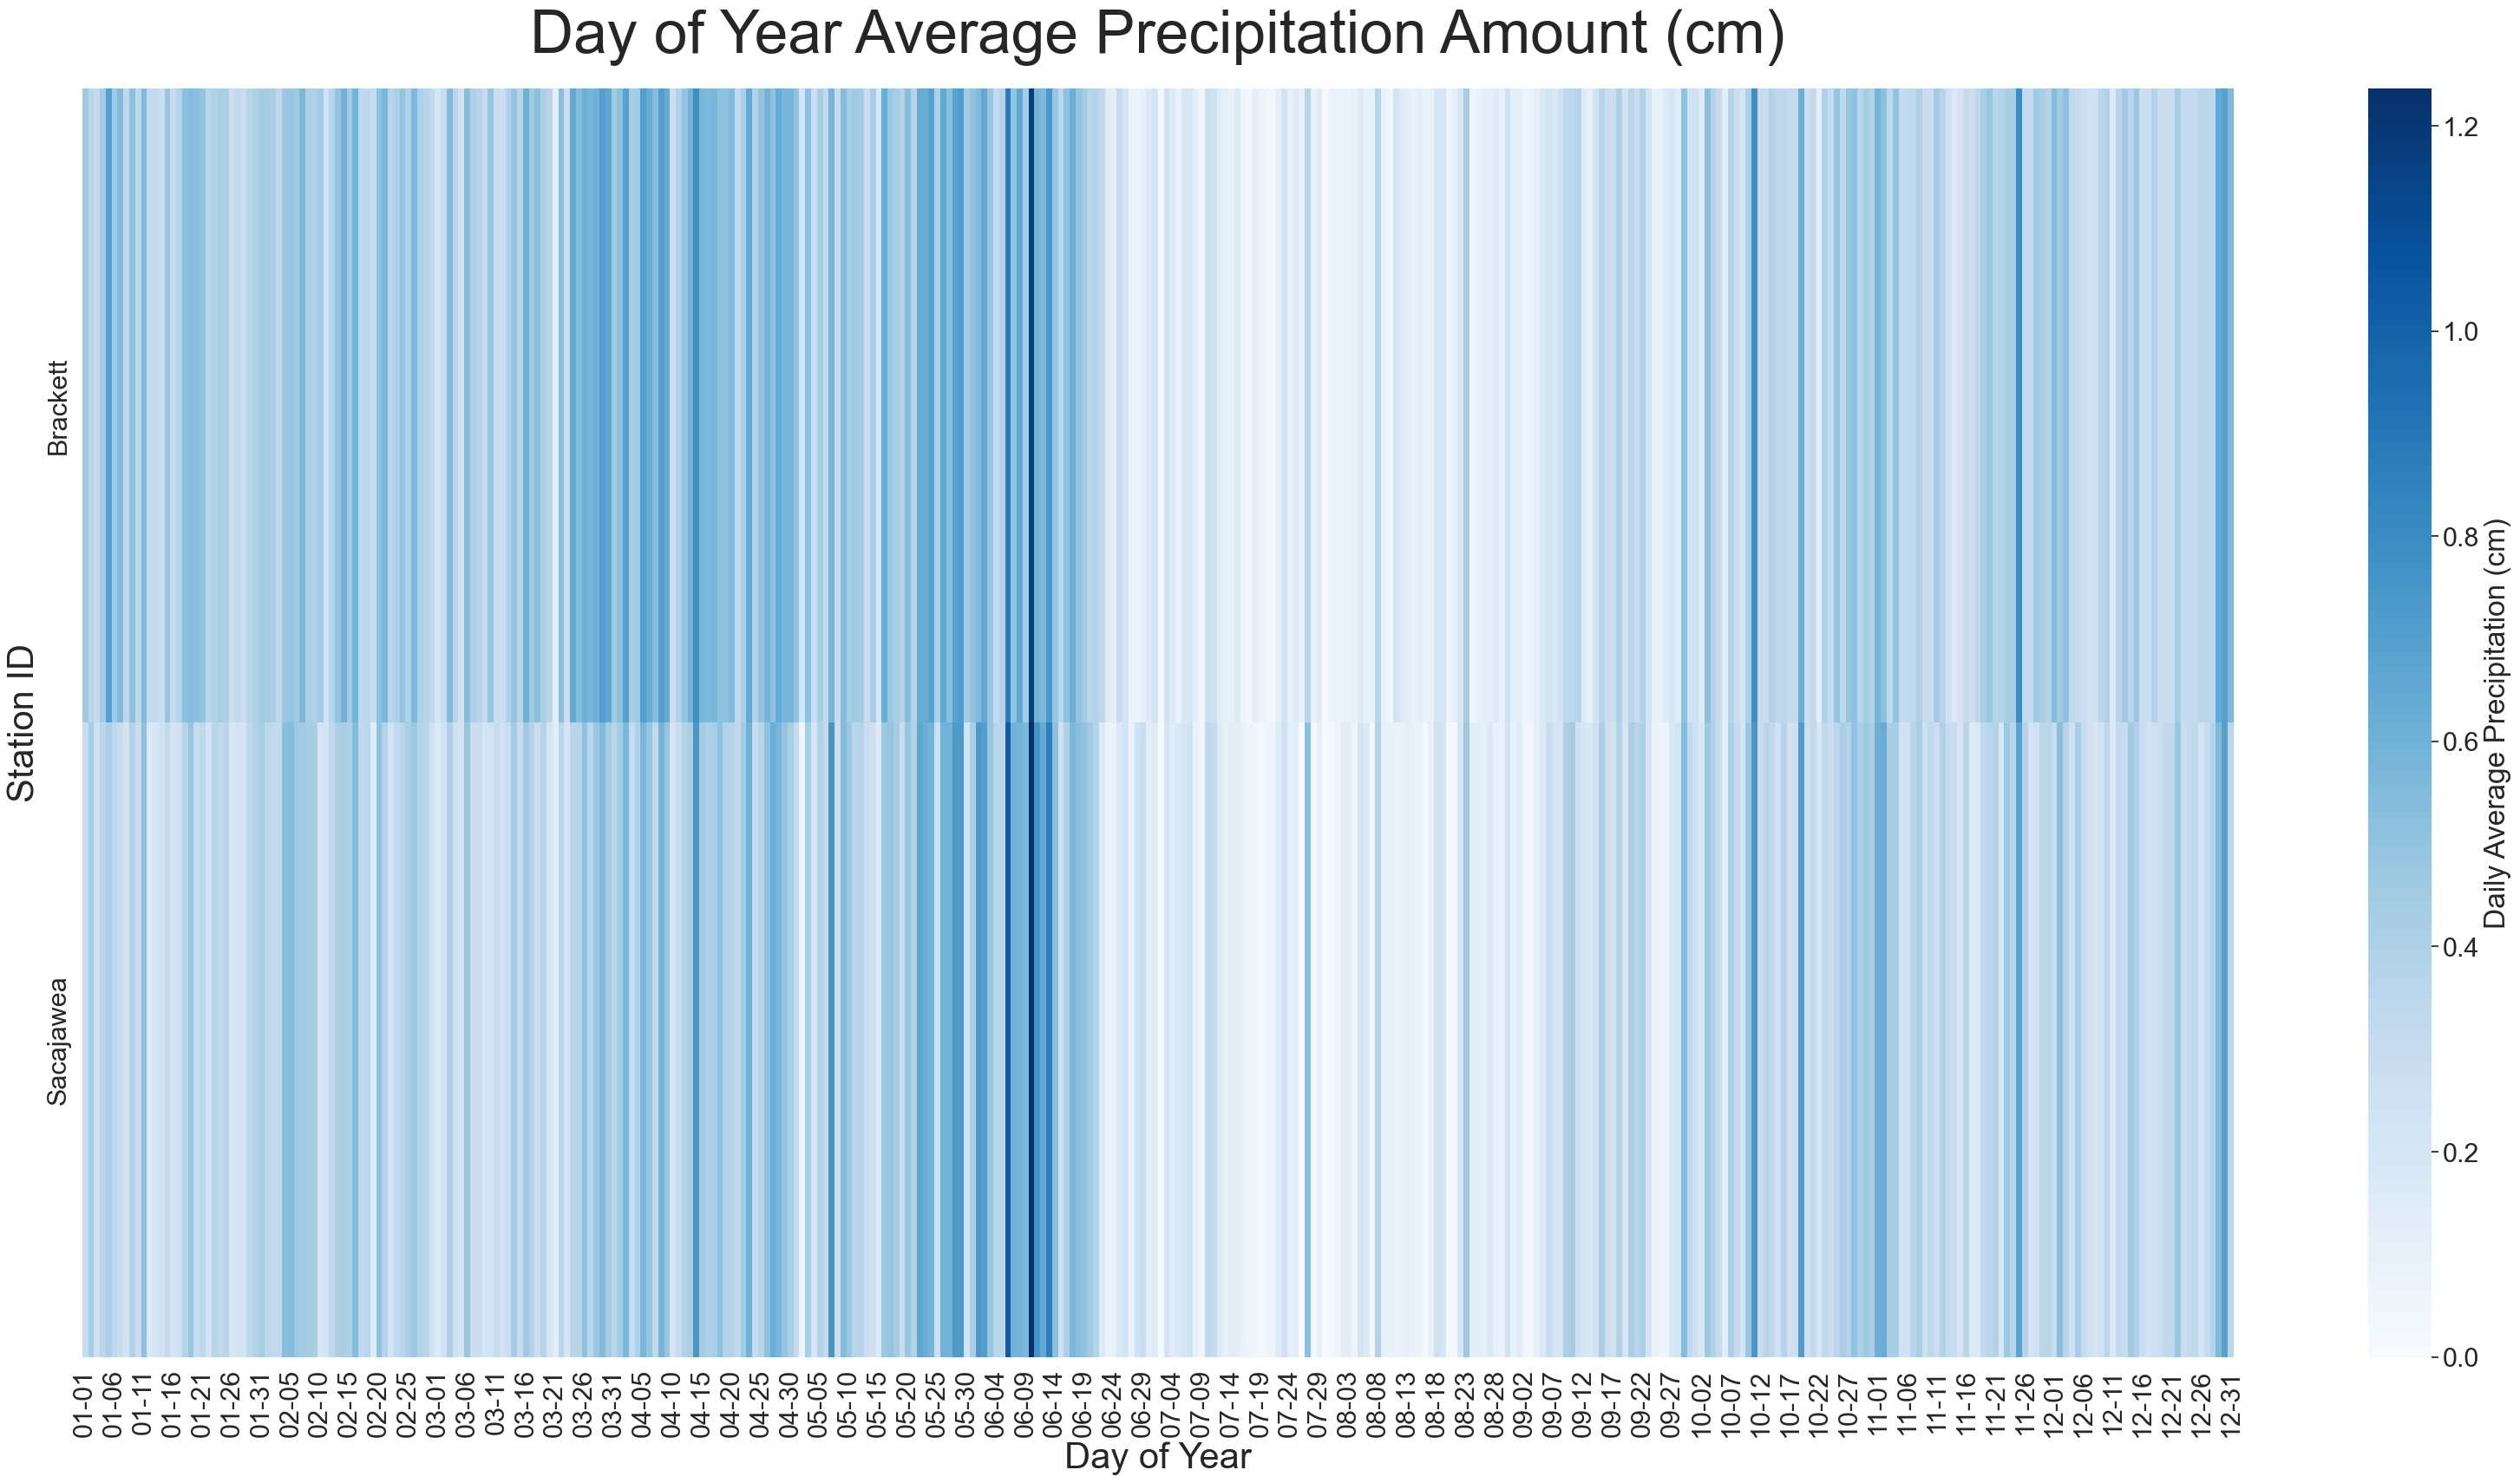

In [41]:
# Set image parameters
plt.figure(figsize = (40,19))
sns.set(font_scale=2)
# Set the plot title
plt.title('Day of Year Average Precipitation Amount (cm)', fontsize = 50, pad = 30)
avg_fSCA_heat = sns.heatmap(doy_precip, annot=False, cmap='Blues', cbar_kws = {'label':'Daily Average Precipitation (cm)'})

plt.ylabel('Station ID', fontsize = 30)
plt.xlabel('Day of Year', fontsize = 30)

# plt.savefig('/Users/f67f911/Desktop/Bridger_snotels/Figures/DOY_AvgPrecip.png', bbox_inches='tight')

In [14]:
snotel_df['Month_Name'] = pd.to_datetime(snotel_df['Month'], format='%m').dt.month_name().str.slice()
snotel_df.head()

datetime   station  Year  Month  Daily Precipitation (cm)   
0  1994-09-29  Brackett  1994      9                       NaN  \
1  1994-09-30  Brackett  1994      9                       NaN   
2  1994-10-01  Brackett  1994     10                     1.270   
3  1994-10-02  Brackett  1994     10                     0.000   
4  1994-10-03  Brackett  1994     10                     0.254   

   Daily Snow Depth (cm)  Daily Water Equivalent (cm)  Daily Average Temp (C)   
0                    NaN                          NaN                     8.5  \
1                    NaN                          NaN                     7.8   
2                    NaN                          NaN                     9.0   
3                    NaN                          NaN                    -2.3   
4                    NaN                          NaN                    -6.0   

   Density (%)  Density (kg/m3)    DOY Month_Name  
0          NaN              NaN  09-29  September  
1          NaN              NaN  09-30  September  
2          NaN              NaN  10-01    October  
3          NaN              NaN  10-02    October  
4          NaN              NaN  10-03    October

In [ ]:
density_df = 

In [15]:
# Set a color dictionary for the months of the year
color_dict = dict({'January':'#a6bddb',
                  'February':'#74a9cf',
                  'March':'#2b8cbe',
                  'April':'#045a8d',
                  'May':'#a8ddb5',
                  'June':'#ccebc5',
                  'July':'#f0f9e8',
                  'August':'#f1b6da',
                  'September':'#de77ae',
                  'October':'#ece7f2',
                  'November':'#d0d1e6',
                  'December':'#a6bddb'})

Text(0.5, 0, 'Daily Snow Depth (cm)')

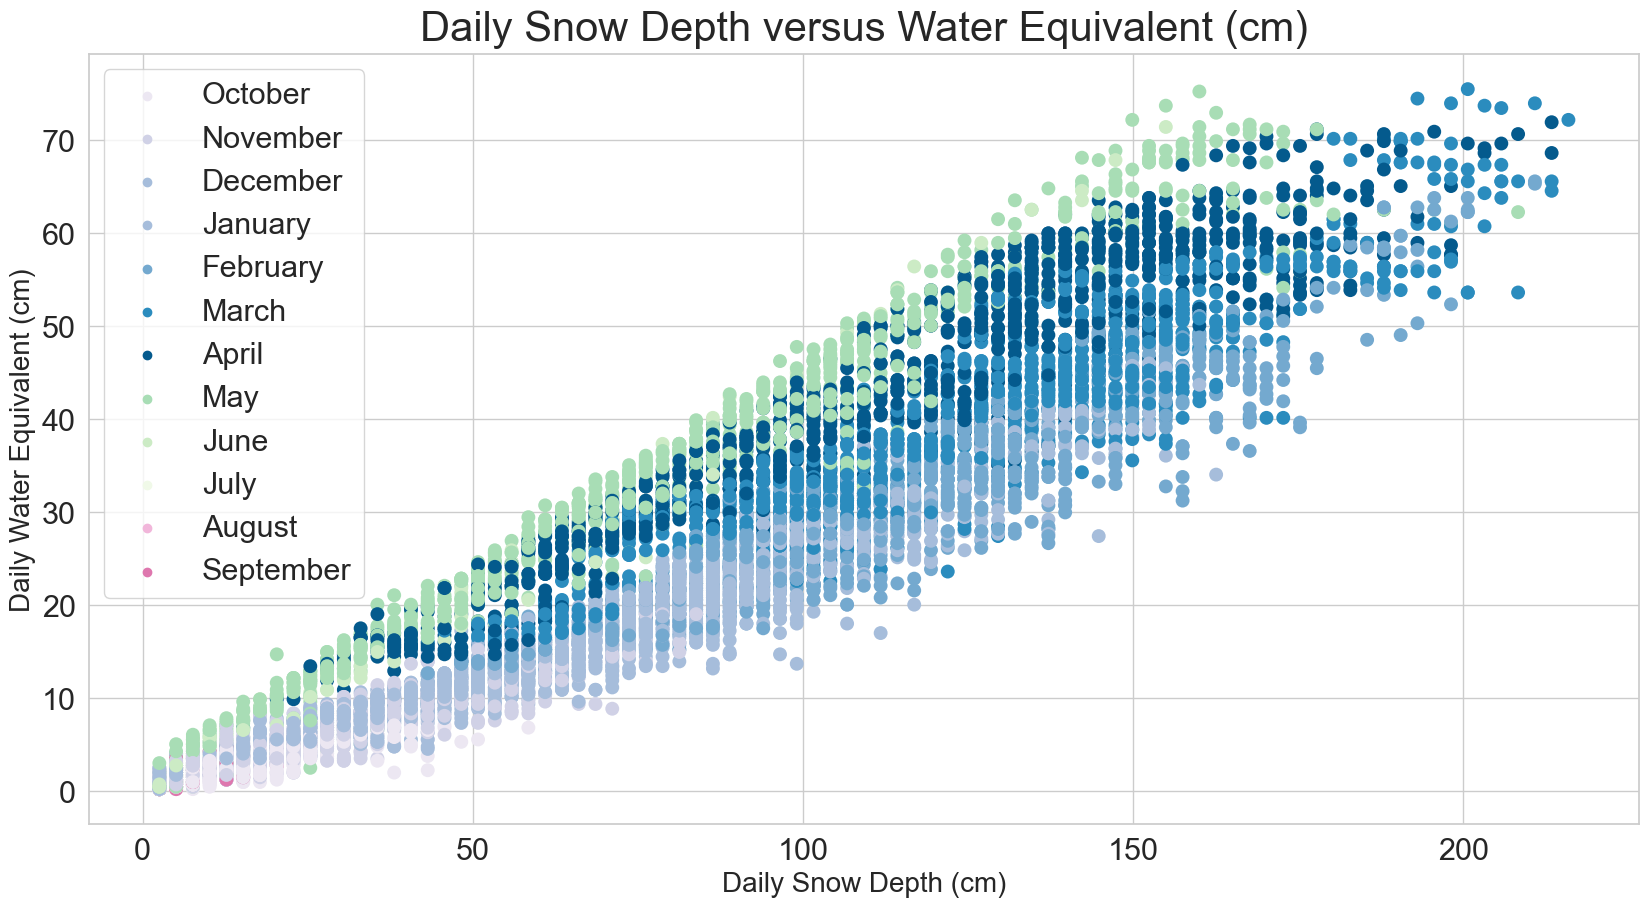

In [16]:
# Plot the relationship between snow depth and SWE for both SNOTEL Sites.
# View how SWE generally increases with increases in snow depth
# Note how snow water equivalent is highest proportionally in the spring and summer months because snow has become 
# isothermal and is extremely dense.
plt.figure(figsize = (20,10))
sns.set(font_scale=2)
sns.set_style("whitegrid")

# Set the plot title
plt.title('Daily Snow Depth versus Water Equivalent (cm)', fontsize = 30, pad = 10)
ax = sns.scatterplot(data= snotel_df, x = 'Daily Snow Depth (cm)', y = 'Daily Water Equivalent (cm)', hue = 'Month_Name',
               legend = 'full', palette = color_dict, s = 100, linewidth = 0.0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,3,4,5,6,7,8,9,10,11,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.ylabel('Daily Water Equivalent (cm)', fontsize = 20)
plt.xlabel('Daily Snow Depth (cm)', fontsize = 20)
# plt.savefig('/Users/f67f911/Desktop/Bridger_snotels/Figures/SDepthvsSWE.png', bbox_inches='tight')


In [17]:
# Subset the data so that there are data frames for both stations
brackett_df = snotel_df[snotel_df['station'] == 'Brackett'] 
sac_df = snotel_df[snotel_df['station'] == 'Sacajawea'] 

Text(0.5, 0, 'Daily Snow Depth (cm)')

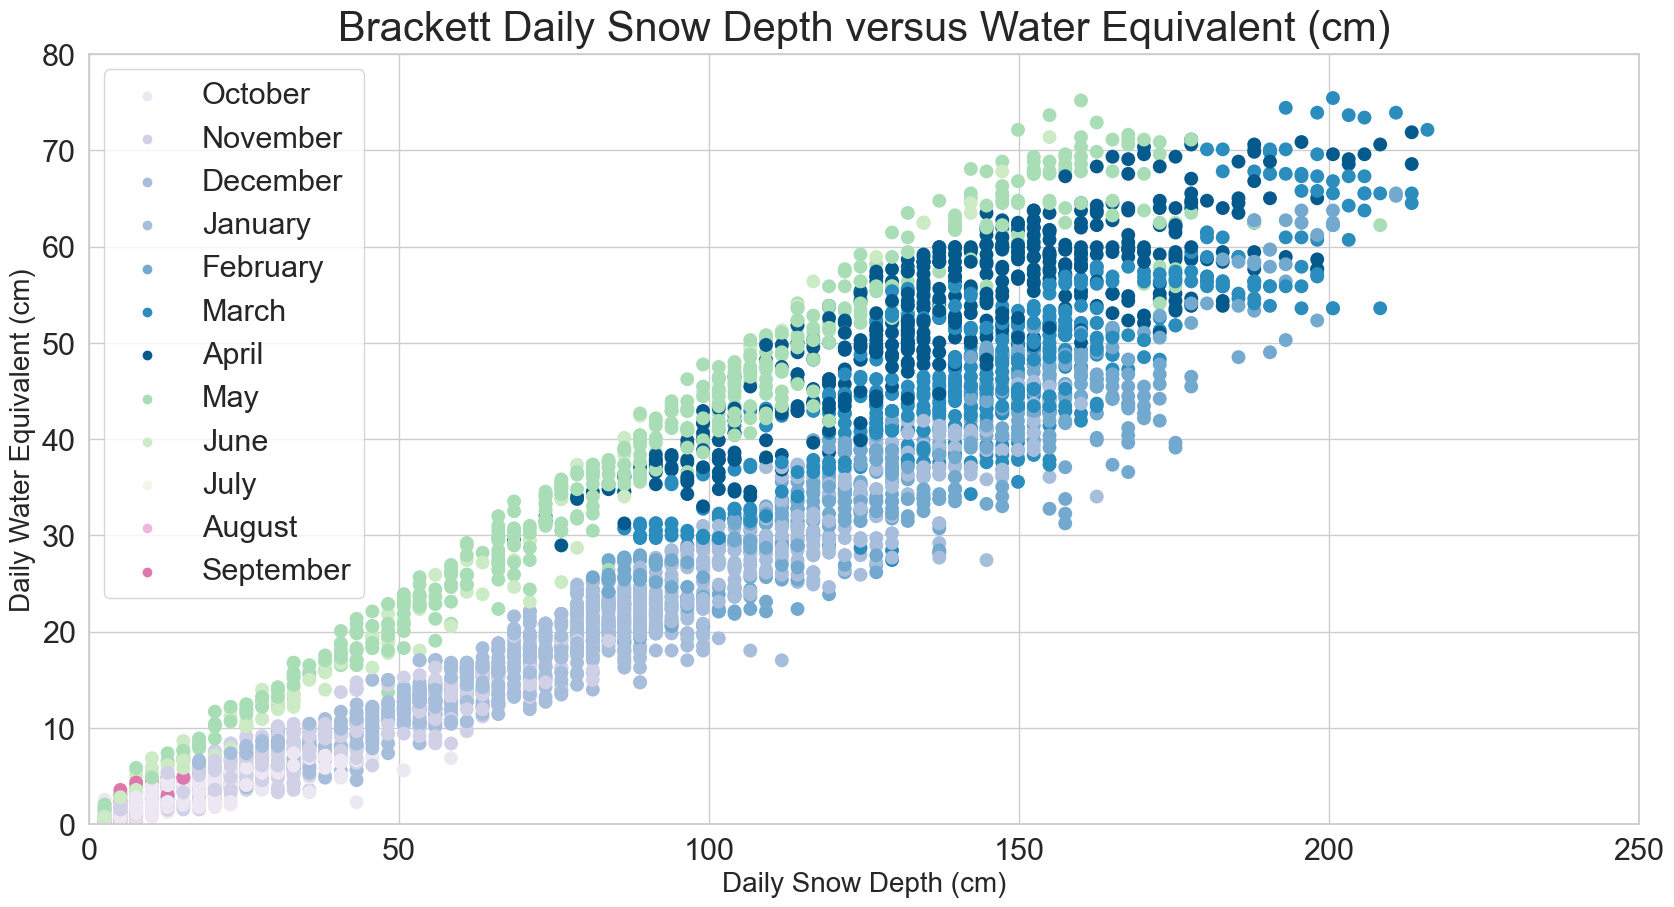

In [18]:
# Plot the snow depth and SWE relationship for the Brackett Creek SNOTEL
plt.figure(figsize = (20,10))
sns.set(font_scale=2)
sns.set_style("whitegrid")

# Set the plot title
plt.title('Brackett Daily Snow Depth versus Water Equivalent (cm)', fontsize = 30, pad = 10)
ax = sns.scatterplot(data= brackett_df, x = 'Daily Snow Depth (cm)', y = 'Daily Water Equivalent (cm)', hue = 'Month_Name',
               legend = 'full', palette = color_dict, s = 100, linewidth = 0.0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.xlim([0, 250])
plt.ylim([0,80])

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,3,4,5,6,7,8,9,10,11,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.ylabel('Daily Water Equivalent (cm)', fontsize = 20)
plt.xlabel('Daily Snow Depth (cm)', fontsize = 20)

Text(0.5, 0, 'Daily Snow Depth (cm)')

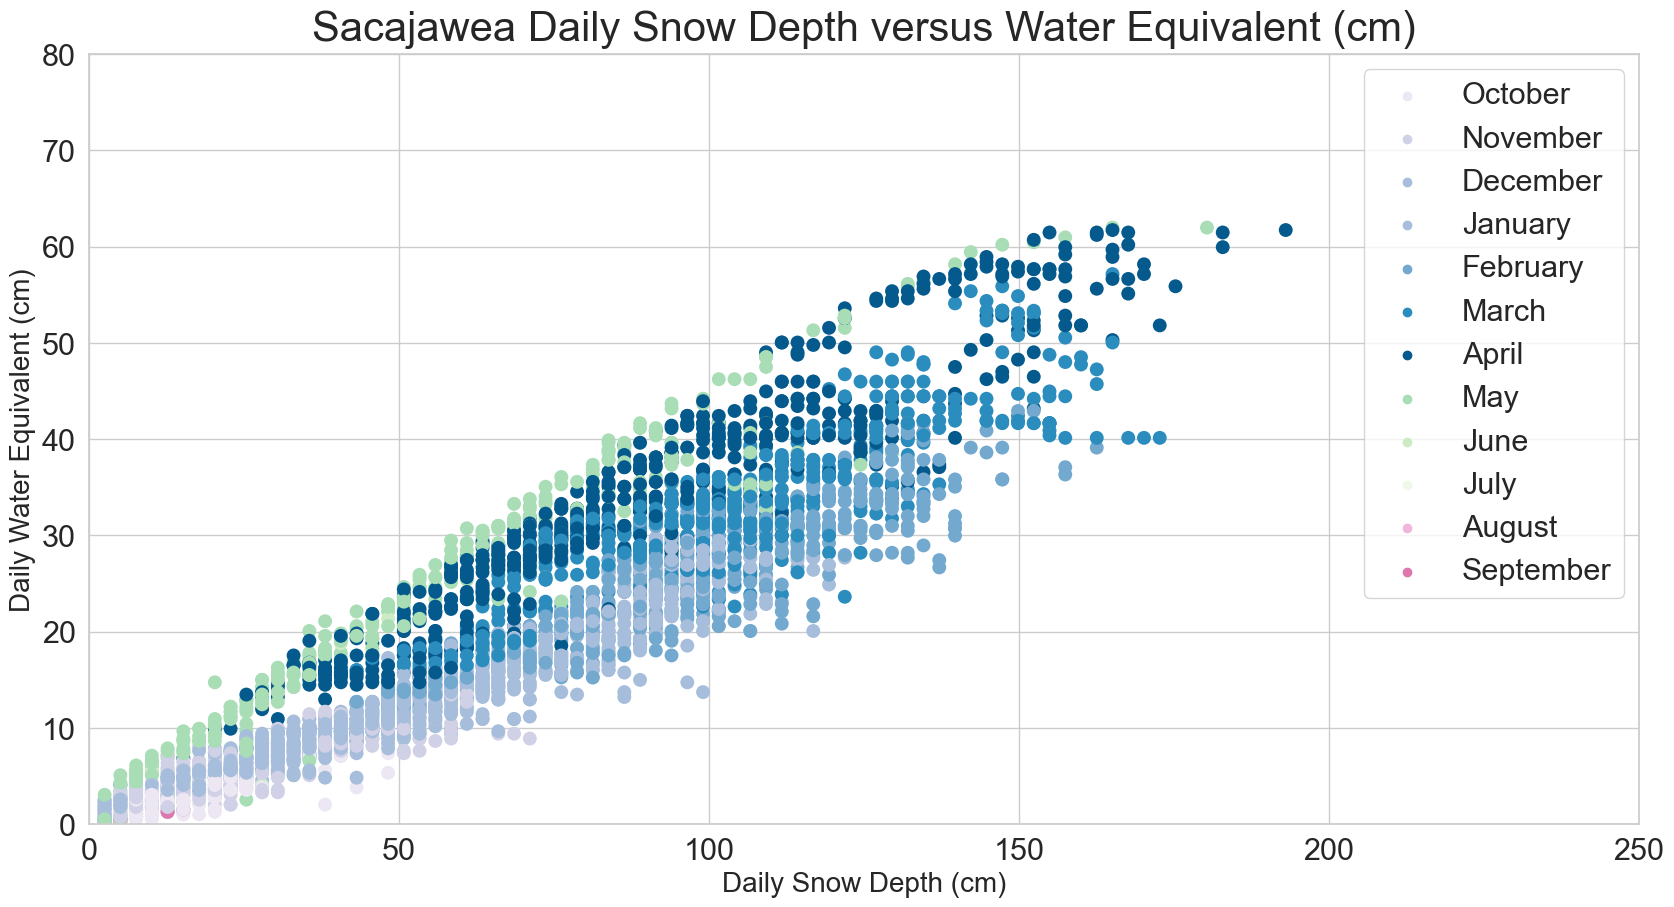

In [19]:
# Plot the same relationship for the Sacajawea SNOTEL
plt.figure(figsize = (20,10))
sns.set(font_scale=2)
sns.set_style("whitegrid")

# Set the plot title
plt.title('Sacajawea Daily Snow Depth versus Water Equivalent (cm)', fontsize = 30, pad = 10)
ax = sns.scatterplot(data= sac_df, x = 'Daily Snow Depth (cm)', y = 'Daily Water Equivalent (cm)', hue = 'Month_Name',
               legend = 'full', palette = color_dict, s = 100, linewidth = 0.0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.xlim([0, 250])
plt.ylim([0,80])

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,3,4,5,6,7,8,9,10,11,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.ylabel('Daily Water Equivalent (cm)', fontsize = 20)
plt.xlabel('Daily Snow Depth (cm)', fontsize = 20)

In [20]:
# Create a merged dataset for further plotting.
# There is likely a better way to do this, but this approach allows you to plot multiple relationships for each station
merged_df = sac_df.merge(brackett_df,how='inner',on='datetime')
merged_df.head()
#in merged data frame, x is added to columns from the 'left' dataset (sac_df) and y is added to the
#'right' dataset (brackett_df)

datetime  station_x  Year_x  Month_x  Daily Precipitation (cm)_x   
0  1999-09-30  Sacajawea    1999        9                         NaN  \
1  1999-10-01  Sacajawea    1999       10                         0.0   
2  1999-10-02  Sacajawea    1999       10                         0.0   
3  1999-10-03  Sacajawea    1999       10                         0.0   
4  1999-10-04  Sacajawea    1999       10                         0.0   

   Daily Snow Depth (cm)_x  Daily Water Equivalent (cm)_x   
0                      NaN                            NaN  \
1                      NaN                            NaN   
2                      NaN                            NaN   
3                      NaN                            NaN   
4                      NaN                            NaN   

   Daily Average Temp (C)_x  Density (%)_x  Density (kg/m3)_x  ... Year_y   
0                       3.2            NaN                NaN  ...   1999  \
1                       2.0            NaN                NaN  ...   1999   
2                      -2.0            NaN                NaN  ...   1999   
3                       5.3            NaN                NaN  ...   1999   
4                      10.3            NaN                NaN  ...   1999   

  Month_y Daily Precipitation (cm)_y  Daily Snow Depth (cm)_y   
0       9                        0.0                      NaN  \
1      10                        0.0                      NaN   
2      10                        0.0                      NaN   
3      10                        0.0                      NaN   
4      10                        0.0                      NaN   

   Daily Water Equivalent (cm)_y  Daily Average Temp (C)_y  Density (%)_y   
0                            NaN                       2.3            NaN  \
1                            NaN                       0.7            NaN   
2                            NaN                      -3.1            NaN   
3                            NaN                       4.4            NaN   
4                            NaN                      10.2            NaN   

   Density (kg/m3)_y  DOY_y  Month_Name_y  
0                NaN  09-30     September  
1                NaN  10-01       October  
2                NaN  10-02       October  
3                NaN  10-03       October  
4                NaN  10-04       October  

[5 rows x 23 columns]

In [21]:
# Create variables for the x and y axis. This first one looks at the relationship for SWE at the two sites over time
varx = merged_df['Daily Water Equivalent (cm)_x']
vary = merged_df['Daily Water Equivalent (cm)_y']

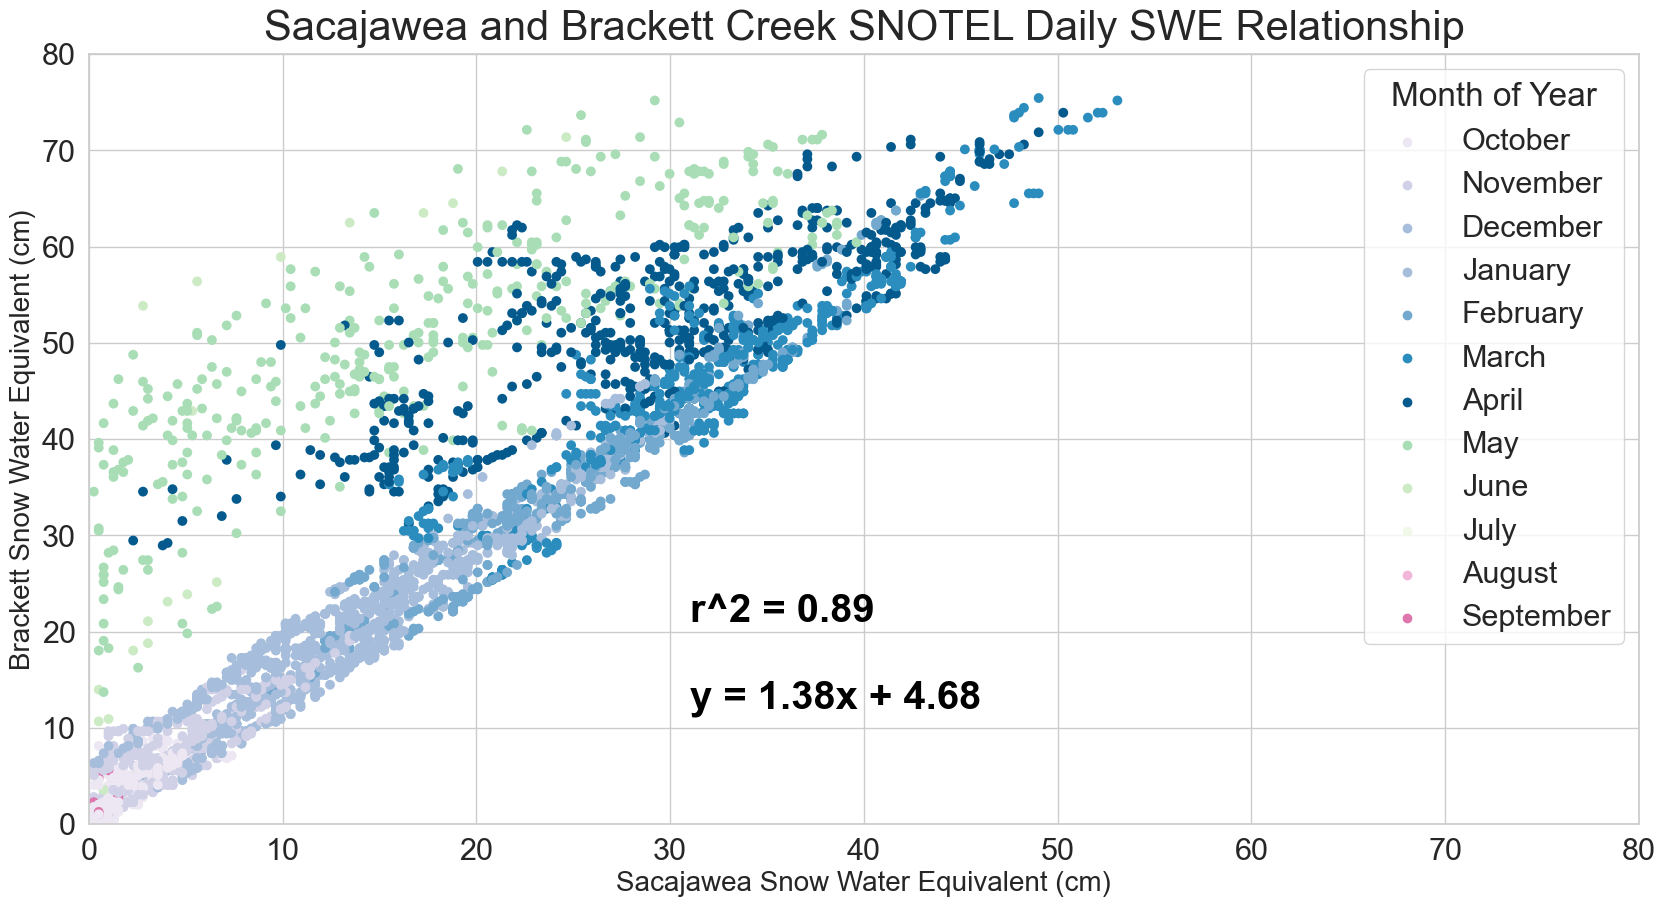

In [22]:
# I like this graph, it shows the relationship and spread between SWE for the Brackett and the Sacajawea SNOTEL
# I think this is a beneficial graphic for my project. I think it shows why it may be beneficial to create a
# different linear relationship between 
plt.figure(figsize = (20,10))
sns.set(font_scale=2)
sns.set_style("whitegrid")

mask = ~np.isnan(varx) & ~np.isnan(vary)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(varx[mask], vary[mask])

plt.title('Sacajawea and Brackett Creek SNOTEL Daily SWE Relationship', fontsize = 30, pad = 10)
sns.scatterplot( x = merged_df['Daily Water Equivalent (cm)_x'], y = merged_df['Daily Water Equivalent (cm)_y'],
                hue = merged_df['Month_Name_x'],
               legend = 'full', palette = color_dict, s = 50, linewidth = 0.0)

plt.xlim([0, 80])
plt.ylim([0,80])

plt.ylabel('Brackett Snow Water Equivalent (cm)', fontsize = 20)
plt.xlabel('Sacajawea Snow Water Equivalent (cm)', fontsize = 20)

plt.text(31, 21, "r^2 = 0.89", horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(31, 12, "y = 1.38x + 4.68", horizontalalignment='left', size='large', color='black', weight='semibold')

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,3,4,5,6,7,8,9,10,11,0]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title = 'Month of Year')

In [23]:
# Get the values for the var x and var y to add the linear equation and r2 value to plot
mask = ~np.isnan(varx) & ~np.isnan(vary)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(varx[mask], vary[mask])

In [24]:
# Create new x and y variables for the snow density over time
denx = merged_df['Density (%)_x']
deny = merged_df['Density (%)_y']

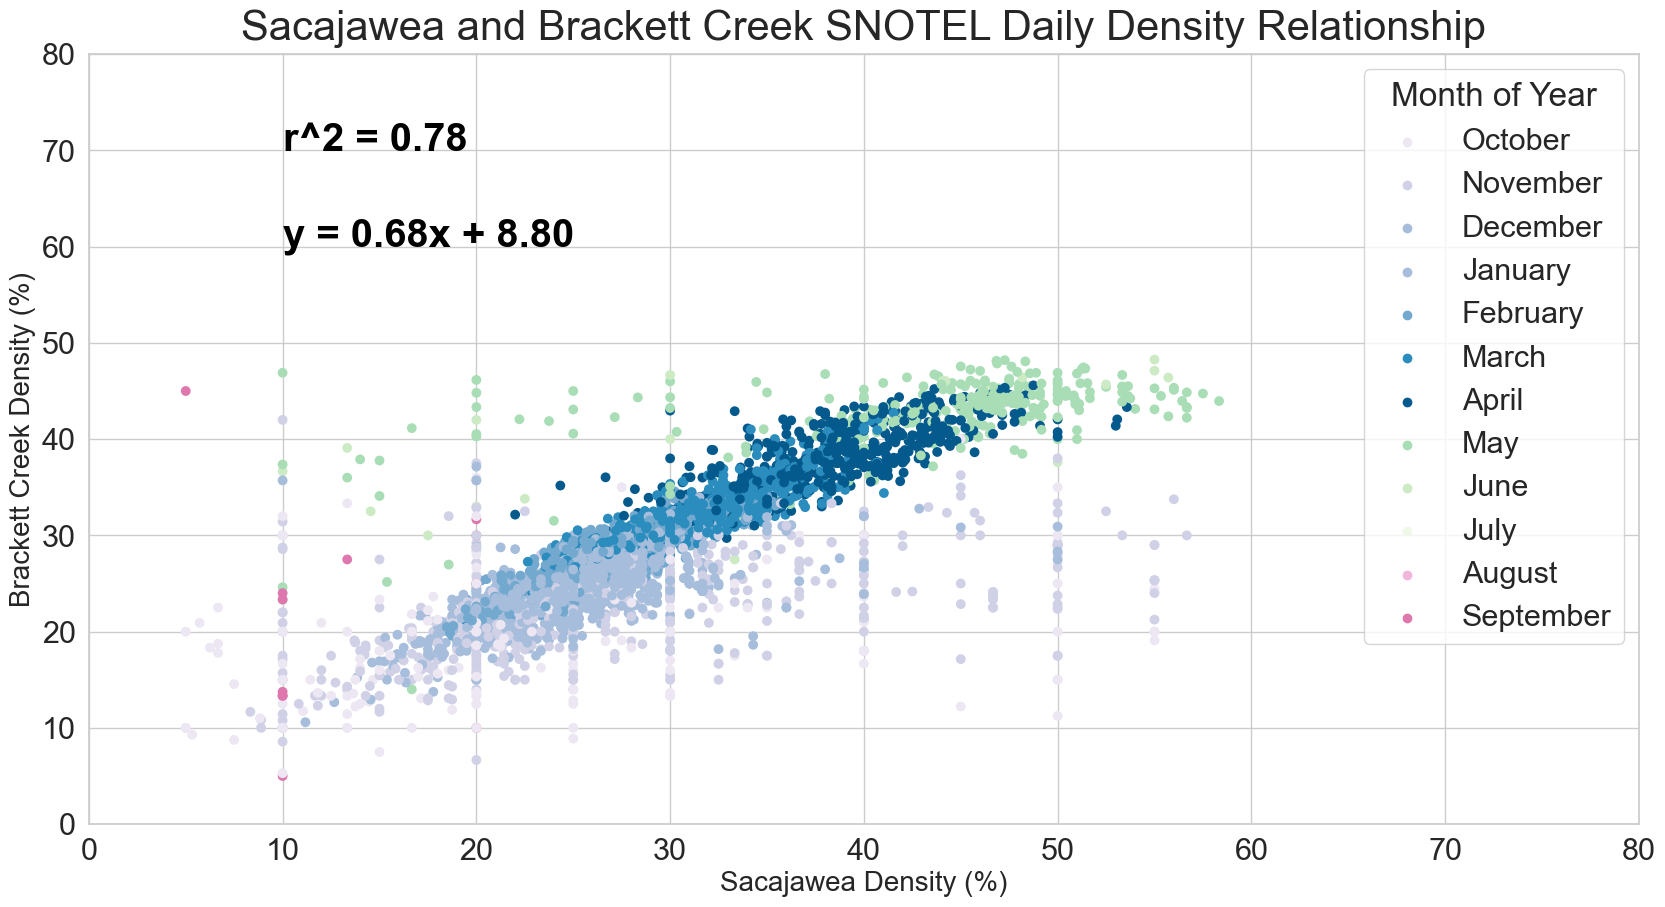

In [25]:
# I like this graph, it shows the relationship and spread between SWE for the Brackett and the Sacajawea SNOTEL
# I think this is a beneficial graphic for my project. I think it shows why it may be beneficial to create a
# different linear relationship between 
plt.figure(figsize = (20,10))
sns.set(font_scale=2)
sns.set_style("whitegrid")

mask = ~np.isnan(varx) & ~np.isnan(vary)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(varx[mask], vary[mask])

plt.title('Sacajawea and Brackett Creek SNOTEL Daily Density Relationship', fontsize = 30, pad = 10)
sns.scatterplot( x = merged_df['Density (%)_x'], y = merged_df['Density (%)_y'],
                hue = merged_df['Month_Name_x'],
               legend = 'full', palette = color_dict, s = 50, linewidth = 0.0)

plt.xlim([0, 80])
plt.ylim([0,80])

plt.ylabel('Brackett Creek Density (%)', fontsize = 20)
plt.xlabel('Sacajawea Density (%)', fontsize = 20)

plt.text(10, 70, "r^2 = 0.78", horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(10, 60, "y = 0.68x + 8.80", horizontalalignment='left', size='large', color='black', weight='semibold')

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,3,4,5,6,7,8,9,10,11,0]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title = 'Month of Year')

# plt.savefig('/Users/f67f911/Desktop/Bridger_snotels/Figures/SacvsBrac_Den.png', bbox_inches='tight')

In [27]:
merged_df.head()

datetime  station_x  Year_x  Month_x  Daily Precipitation (cm)_x   
0  1999-09-30  Sacajawea    1999        9                         NaN  \
1  1999-10-01  Sacajawea    1999       10                         0.0   
2  1999-10-02  Sacajawea    1999       10                         0.0   
3  1999-10-03  Sacajawea    1999       10                         0.0   
4  1999-10-04  Sacajawea    1999       10                         0.0   

   Daily Snow Depth (cm)_x  Daily Water Equivalent (cm)_x   
0                      NaN                            NaN  \
1                      NaN                            NaN   
2                      NaN                            NaN   
3                      NaN                            NaN   
4                      NaN                            NaN   

   Daily Average Temp (C)_x  Density (%)_x  Density (kg/m3)_x  ... Year_y   
0                       3.2            NaN                NaN  ...   1999  \
1                       2.0            NaN                NaN  ...   1999   
2                      -2.0            NaN                NaN  ...   1999   
3                       5.3            NaN                NaN  ...   1999   
4                      10.3            NaN                NaN  ...   1999   

  Month_y Daily Precipitation (cm)_y  Daily Snow Depth (cm)_y   
0       9                        0.0                      NaN  \
1      10                        0.0                      NaN   
2      10                        0.0                      NaN   
3      10                        0.0                      NaN   
4      10                        0.0                      NaN   

   Daily Water Equivalent (cm)_y  Daily Average Temp (C)_y  Density (%)_y   
0                            NaN                       2.3            NaN  \
1                            NaN                       0.7            NaN   
2                            NaN                      -3.1            NaN   
3                            NaN                       4.4            NaN   
4                            NaN                      10.2            NaN   

   Density (kg/m3)_y  DOY_y  Month_Name_y  
0                NaN  09-30     September  
1                NaN  10-01       October  
2                NaN  10-02       October  
3                NaN  10-03       October  
4                NaN  10-04       October  

[5 rows x 23 columns]

In [41]:
density_df = merged_df[['DOY_x','Density (%)_x','Density (%)_y', 'Month_Name_x']]
density_df['relationship'] = density_df['Density (%)_x']/density_df['Density (%)_y']
density_df

/var/folders/1h/qds9mkm123b7fhmghg50vg6w62xq56/T/ipykernel_41281/3096601126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  density_df['relationship'] = density_df['Density (%)_x']/density_df['Density (%)_y']


DOY_x  Density (%)_x  Density (%)_y Month_Name_x  relationship
0     09-30            NaN            NaN    September           NaN
1     10-01            NaN            NaN      October           NaN
2     10-02            NaN            NaN      October           NaN
3     10-03            NaN            NaN      October           NaN
4     10-04            NaN            NaN      October           NaN
...     ...            ...            ...          ...           ...
8393  09-22            NaN            NaN    September           NaN
8394  09-23            NaN            NaN    September           NaN
8395  09-24            NaN            NaN    September           NaN
8396  09-25            NaN            NaN    September           NaN
8397  09-26            NaN            NaN    September           NaN

[8398 rows x 5 columns]

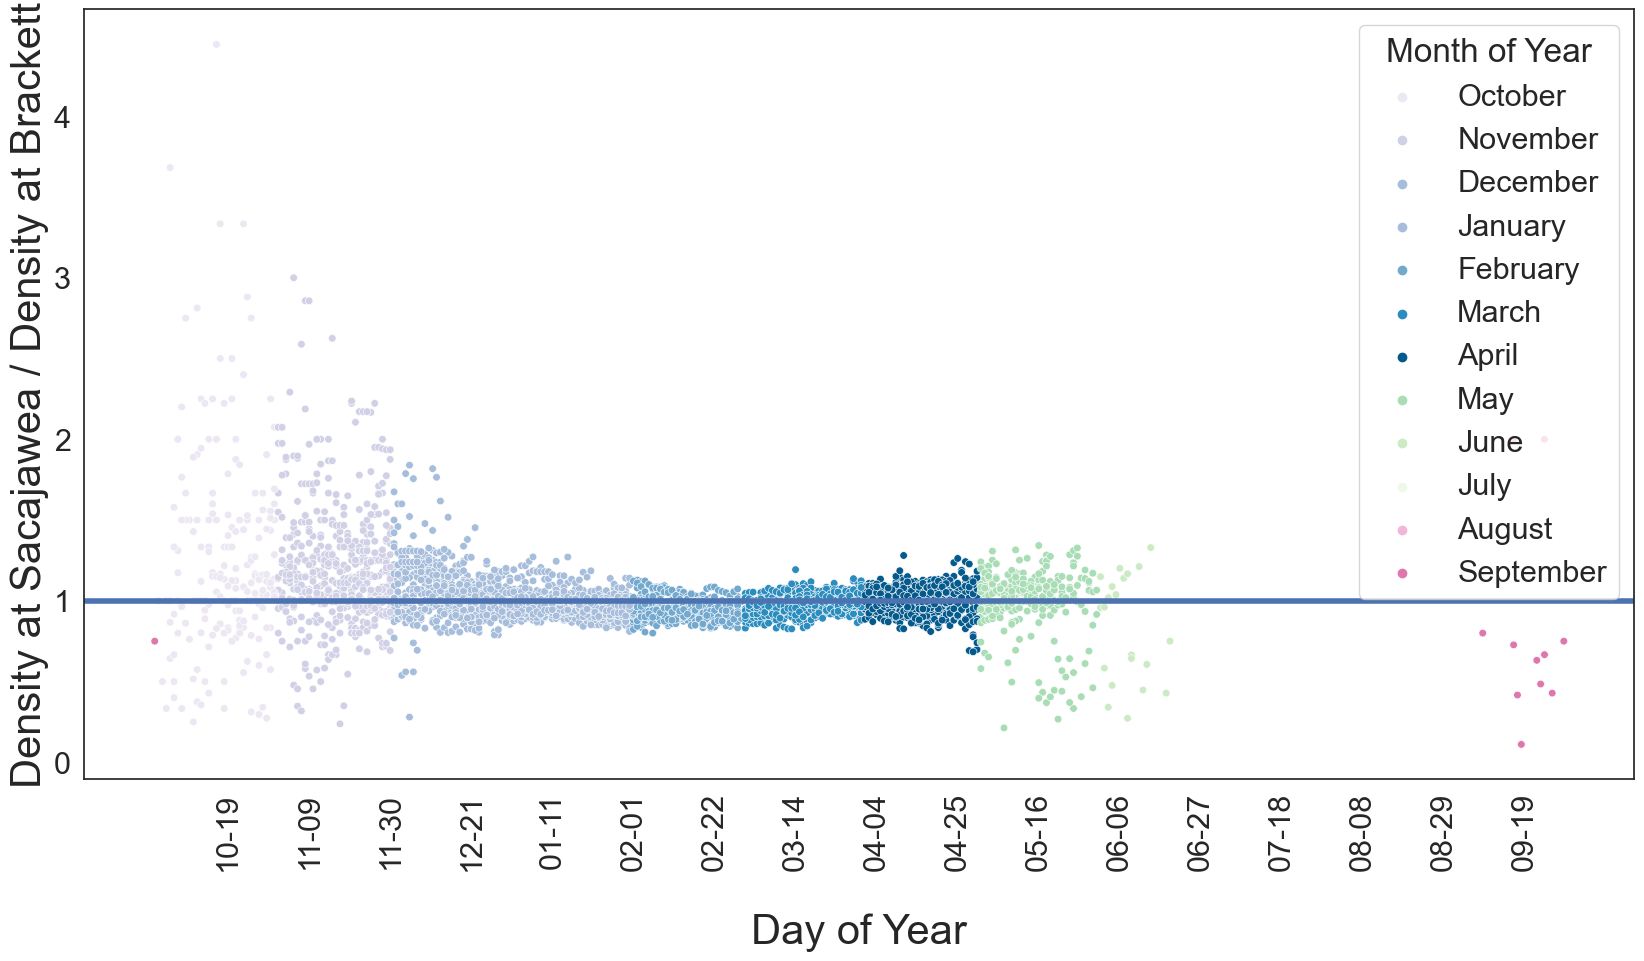

In [84]:
# I like this graph, it shows the relationship and spread between SWE for the Brackett and the Sacajawea SNOTEL
# I think this is a beneficial graphic for my project. I think it shows why it may be beneficial to create a
# different linear relationship between 
plt.figure(figsize = (20,10))
sns.set(font_scale=2)
sns.set_style("white")
# plt.title('Sacajawea and Brackett Creek SNOTEL Daily Density Relationship', fontsize = 30, pad = 10)
rel = sns.scatterplot(data = density_df, x = 'DOY_x', y = 'relationship',
                hue = 'Month_Name_x',
               palette = color_dict, s = 30)
rel.xaxis.set_major_locator(mdates.WeekdayLocator(interval=3))
plt.axhline(y = 1, linewidth = '4')

plt.xlabel('Day of Year', fontsize = 30, labelpad = 30)
plt.ylabel('Density at Sacajawea / Density at Brackett', fontsize = 30)

plt.xticks(rotation = 90)
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,3,4,5,6,7,8,9,10,11,0]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title = 'Month of Year')

plt.savefig('/Users/f67f911/Desktop/Bridger_snotels/Figures/DailyRel.svg', bbox_inches='tight')

Text(0.5, 0, 'Sacajawea Snow Water Equivalent')

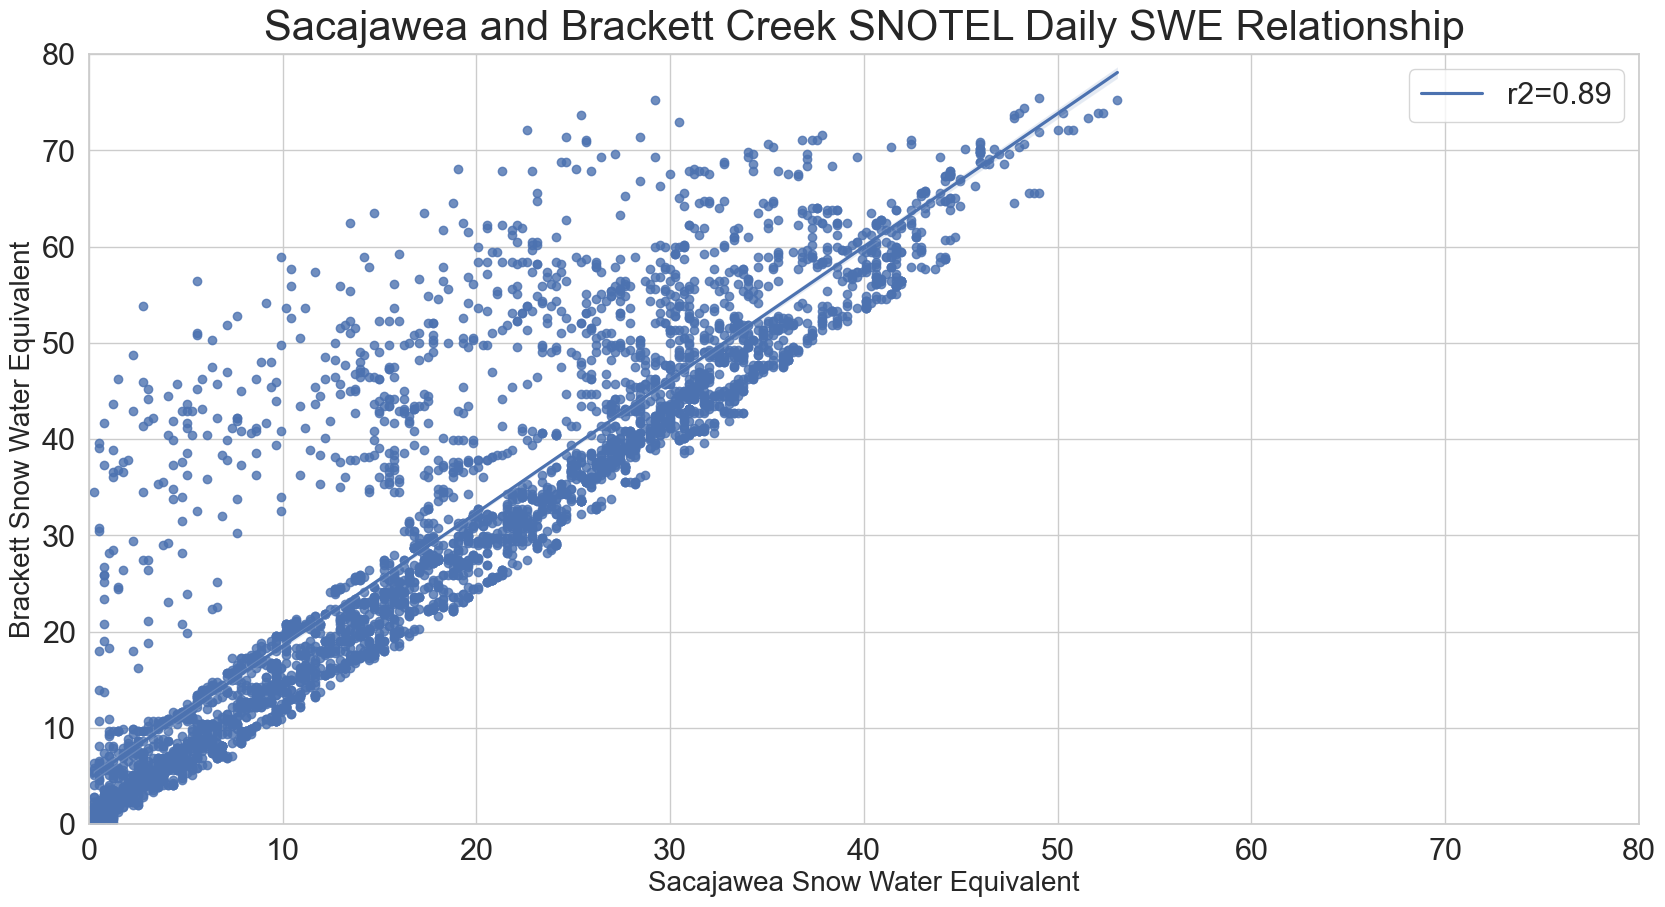

In [68]:
# Create just a scatterplot with a line representing the best fit line for snow water equivalent for the two sites
plt.figure(figsize = (20,10))
sns.set(font_scale=2)
sns.set_style("whitegrid")

plt.title('Sacajawea and Brackett Creek SNOTEL Daily SWE Relationship', fontsize = 30, pad = 10)

mask = ~np.isnan(varx) & ~np.isnan(vary)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(varx[mask], vary[mask])

ax = sns.regplot(x = varx, y = vary,
           line_kws={"label":"r2={0:.2f}".format(r_value)})

# plot legend
ax.legend()

plt.xlim([0, 80])
plt.ylim([0,80])
plt.ylabel('Brackett Snow Water Equivalent', fontsize = 20)
plt.xlabel('Sacajawea Snow Water Equivalent', fontsize = 20)

Text(0.5, 0, 'Sacajawea Snow Water Equivalent')

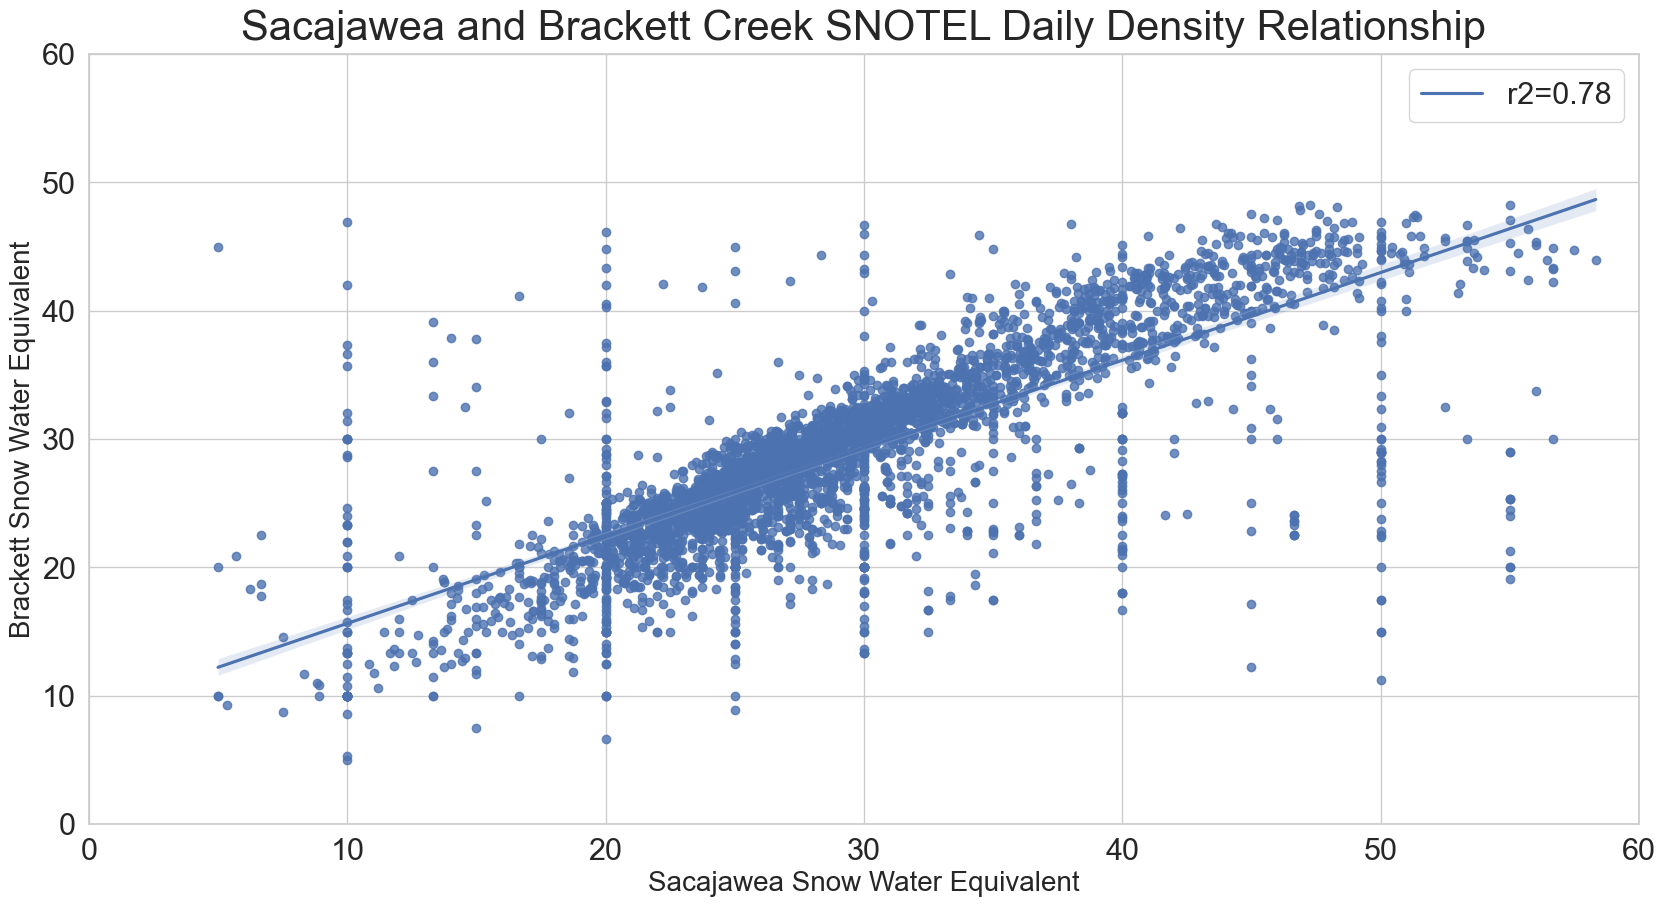

In [70]:
# This plot fits a line to the data for density across the two sites. However, I think that a non-linear relationship
# May be more appropriate. I am not sure how to fit that in my analysis....
plt.figure(figsize = (20,10))
sns.set(font_scale=2)
sns.set_style("whitegrid")

plt.title('Sacajawea and Brackett Creek SNOTEL Daily Density Relationship', fontsize = 30, pad = 10)

mask = ~np.isnan(denx) & ~np.isnan(deny)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(denx[mask], deny[mask])

ax = sns.regplot(x = denx, y = deny,
           line_kws={"label":"r2={0:.2f}".format(r_value)})

# plot legend
ax.legend()

plt.xlim([0, 60])
plt.ylim([0,60])
plt.ylabel('Brackett Snow Water Equivalent', fontsize = 20)
plt.xlabel('Sacajawea Snow Water Equivalent', fontsize = 20)

In [83]:
# Get the parameters for the density relationship
mask_dens = ~np.isnan(denx) & ~np.isnan(deny)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(denx[mask_dens], deny[mask_dens])

In [88]:
r_value

0.8923366453307451

In [85]:
slope

0.6835187187794719

In [86]:
intercept

8.8022623719473